# Predicting Employee Attrition - Starter Notebook

This notebook contains starter code to load data, run initial EDA and cleaning, and save a cleaned dataset. All code cells are commented to explain each step.

In [8]:
# Import common libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set project paths
PROJECT_ROOT = Path('..').resolve()  # project root (one level up from notebooks/)
# Full path to the CSV you provided on your machine
RAW_FILE = Path(r'C:\Users\mathe\Downloads\HR_Attrition_Dataset.csv')
# Keep data/clean folder for outputs
DATA_CLEAN = PROJECT_ROOT / 'data' / 'clean'
DATA_CLEAN.mkdir(parents=True, exist_ok=True)

# Remembered columns: define a Python list so the notebook 'memorizes' the dataset columns
COLUMNS = [
    'Age',
    'Attrition',
    'BusinessTravel',
    'DailyRate',
    'Department',
    'DistanceFromHome',
    'Education',
    'EducationField',
    'EmployeeCount',
    'EmployeeNumber',
    'EnvironmentSatisfaction',
    'Gender',
    'HourlyRate',
    'JobInvolvement',
    'JobLevel',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'Over18',
    'OverTime',
    'PercentSalaryHike',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StandardHours',
    'StockOptionLevel',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Also include a commented snippet listing the columns for quick reference (commented so it doesn't execute)
# Columns: Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education,
# EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate,
# JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate,
# NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction,
# StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,
# YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

# Helper to load the provided CSV file. If RAW_FILE exists, we load it. Otherwise we provide a helper to load from data/raw
def load_data_from_provided():
    # Try the full path first (the file you mentioned).
    if RAW_FILE.exists():
        print(f'Loading data from {RAW_FILE}')
        return pd.read_csv(RAW_FILE)
    # Fallback: look for common filenames in data/raw/
    raw_dir = PROJECT_ROOT / 'data' / 'raw'
    candidates = ['HR_Attrition_Dataset.csv', 'employee_attrition.csv', 'attrition.csv']
    for name in candidates:
        p = raw_dir / name
        if p.exists():
            print(f'Loading data from {p}')
            return pd.read_csv(p)
    print('Dataset not found. Place your CSV at: ' + str(RAW_FILE) + ' or in data/raw/')
    return None

# Example usage: df = load_data_from_provided()
# If df is not None: df.head()


In [9]:
# Load the CSV into a dataframe using the helper defined above
df = load_data_from_provided()
if df is None:
    print('No dataset found. Please place the CSV at the path in RAW_FILE or in data/raw/')
else:
    print('Loaded dataframe with shape:', df.shape)
    display(df.head())

Loading data from C:\Users\mathe\Downloads\HR_Attrition_Dataset.csv
Loaded dataframe with shape: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Univariate Analysis

This section performs univariate analysis: each important aspect is a separate cell with a brief comment explaining what's being done. Run the CSV loading cell above before executing these cells.

## Initial Summaries

Shape: 1470 rows x 35 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 

> **What this means:** Quick overview of dataset size and column types helps spot obvious issues (e.g., unexpected object dtype for numeric data) and plan cleaning steps. `info()` also reveals memory use and missingness at a glance.

### Dtypes

dtype
Age                        int64
Attrition                 object
BusinessTravel            object
DailyRate                  int64
Department                object
DistanceFromHome           int64
Education                  int64
EducationField            object
EmployeeCount              int64
EmployeeNumber             int64
EnvironmentSatisfaction    int64
Gender                    object
HourlyRate                 int64
JobInvolvement             int64
JobLevel                   int64
JobRole                   object
JobSatisfaction            int64
MaritalStatus             object
MonthlyIncome              int64
MonthlyRate                int64
NumCompaniesWorked         int64
Over18                    object
OverTime                  object
PercentSalaryHike          int64
PerformanceRating          int64
RelationshipSatisfaction   int64
StandardHours              int64
StockOptionLevel           int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
WorkLifeBalance            int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64

> **How to use:** Identify **numeric vs. categorical** features to choose appropriate plots and models. Flags for constants (only one unique value) or IDs (e.g., `EmployeeNumber`) help decide drops.

### Missing by column

missing_count  missing_pct
Age                                   0          0.0
StandardHours                         0          0.0
NumCompaniesWorked                    0          0.0
Over18                                0          0.0
OverTime                              0          0.0
PercentSalaryHike                     0          0.0
PerformanceRating                     0          0.0
RelationshipSatisfaction              0          0.0
StockOptionLevel                      0          0.0
MonthlyIncome                         0          0.0
TotalWorkingYears                     0          0.0
TrainingTimesLastYear                 0          0.0
WorkLifeBalance                       0          0.0
YearsAtCompany                        0          0.0
YearsInCurrentRole                    0          0.0
YearsSinceLastPromotion               0          0.0
MonthlyRate                           0          0.0
MaritalStatus                         0          0.0
Attrition                             0          0.0
EmployeeCount                         0          0.0
BusinessTravel                        0          0.0
DailyRate                             0          0.0
Department                            0          0.0
DistanceFromHome                      0          0.0
Education                             0          0.0
EducationField                        0          0.0
EmployeeNumber                        0          0.0
JobSatisfaction                       0          0.0
EnvironmentSatisfaction               0          0.0
Gender                                0          0.0
HourlyRate                            0          0.0
JobInvolvement                        0          0.0
JobLevel                              0          0.0
JobRole                               0          0.0
YearsWithCurrManager                  0          0.0

> **What to look for:** High missing % suggests imputation or feature removal. Consider whether missingness is **MCAR/MAR/MNAR**; correlated missingness across columns may indicate **systematic data issues** or **shared business logic** driving gaps.

### Descriptive statistics (include='all')

count unique                     top  freq  \
Age                       1470.0    NaN                     NaN   NaN   
Attrition                   1470      2                      No  1233   
BusinessTravel              1470      3           Travel_Rarely  1043   
DailyRate                 1470.0    NaN                     NaN   NaN   
Department                  1470      3  Research & Development   961   
DistanceFromHome          1470.0    NaN                     NaN   NaN   
Education                 1470.0    NaN                     NaN   NaN   
EducationField              1470      6           Life Sciences   606   
EmployeeCount             1470.0    NaN                     NaN   NaN   
EmployeeNumber            1470.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   1470.0    NaN                     NaN   NaN   
Gender                      1470      2                    Male   882   
HourlyRate                1470.0    NaN                     NaN   NaN   
JobInvolvement            1470.0    NaN                     NaN   NaN   
JobLevel                  1470.0    NaN                     NaN   NaN   
JobRole                     1470      9         Sales Executive   326   
JobSatisfaction           1470.0    NaN                     NaN   NaN   
MaritalStatus               1470      3                 Married   673   
MonthlyIncome             1470.0    NaN                     NaN   NaN   
MonthlyRate               1470.0    NaN                     NaN   NaN   
NumCompaniesWorked        1470.0    NaN                     NaN   NaN   
Over18                      1470      1                       Y  1470   
OverTime                    1470      2                      No  1054   
PercentSalaryHike         1470.0    NaN                     NaN   NaN   
PerformanceRating         1470.0    NaN                     NaN   NaN   
RelationshipSatisfaction  1470.0    NaN                     NaN   NaN   
StandardHours             1470.0    NaN                     NaN   NaN   
StockOptionLevel          1470.0    NaN                     NaN   NaN   
TotalWorkingYears         1470.0    NaN                     NaN   NaN   
TrainingTimesLastYear     1470.0    NaN                     NaN   NaN   
WorkLifeBalance           1470.0    NaN                     NaN   NaN   
YearsAtCompany            1470.0    NaN                     NaN   NaN   
YearsInCurrentRole        1470.0    NaN                     NaN   NaN   
YearsSinceLastPromotion   1470.0    NaN                     NaN   NaN   
YearsWithCurrManager      1470.0    NaN                     NaN   NaN   

                                  mean          std     min     25%      50%  \
Age                           36.92381     9.135373    18.0    30.0     36.0   
Attrition                          NaN          NaN     NaN     NaN      NaN   
BusinessTravel                     NaN          NaN     NaN     NaN      NaN   
DailyRate                   802.485714     403.5091   102.0   465.0    802.0   
Department                         NaN          NaN     NaN     NaN      NaN   
DistanceFromHome              9.192517     8.106864     1.0     2.0      7.0   
Education                     2.912925     1.024165     1.0     2.0      3.0   
EducationField                     NaN          NaN     NaN     NaN      NaN   
EmployeeCount                      1.0          0.0     1.0     1.0      1.0   
EmployeeNumber             1024.865306   602.024335     1.0  491.25   1020.5   
EnvironmentSatisfaction       2.721769     1.093082     1.0     2.0      3.0   
Gender                             NaN          NaN     NaN     NaN      NaN   
HourlyRate                   65.891156    20.329428    30.0    48.0     66.0   
JobInvolvement                2.729932     0.711561     1.0     2.0      3.0   
JobLevel                      2.063946      1.10694     1.0     1.0      2.0   
JobRole                            NaN          NaN     NaN     NaN      NaN   
JobSatisfaction               2.728571

> **Reading this:** For numerics, check **mean/median** (skew), **std** (spread), and **min/max** (range/outliers). For categoricals, `unique` gives cardinality—**very high cardinality** may require grouping or target encoding.

## Univariate EDA

#### Column: **Age**

value
count  1470.000000
mean     36.923810
std       9.135373
min      18.000000
25%      30.000000
50%      36.000000
75%      43.000000
max      60.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

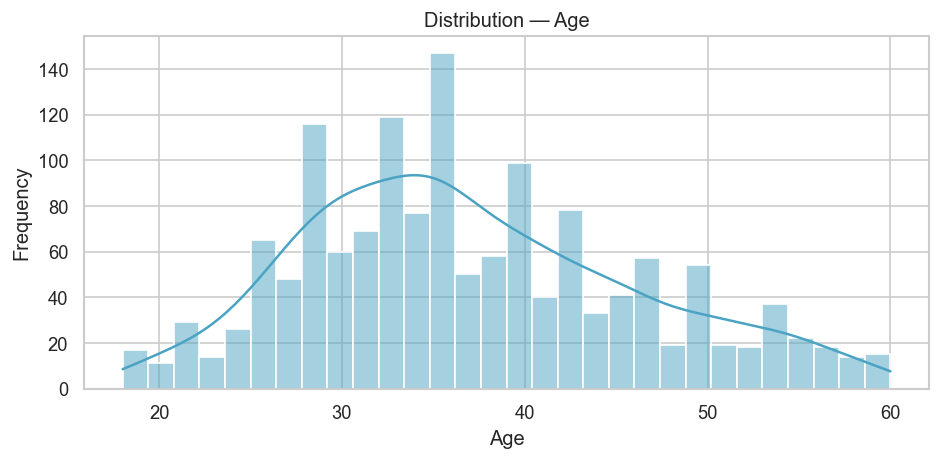

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **Attrition**

count    pct
Attrition              
No          1233  83.88
Yes          237  16.12

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


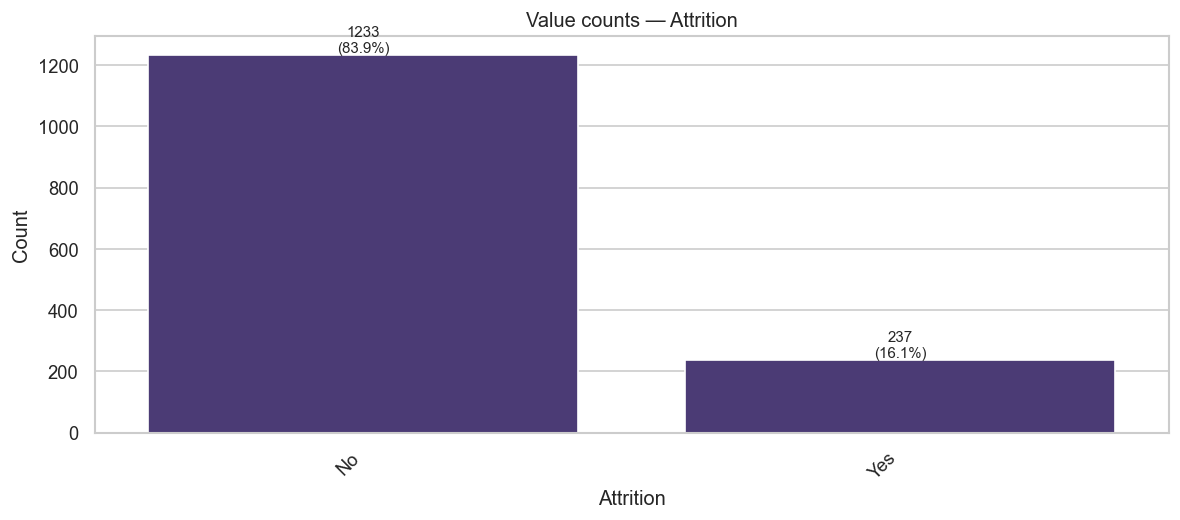

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **BusinessTravel**

count    pct
BusinessTravel                 
Travel_Rarely       1043  70.95
Travel_Frequently    277  18.84
Non-Travel           150  10.20

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


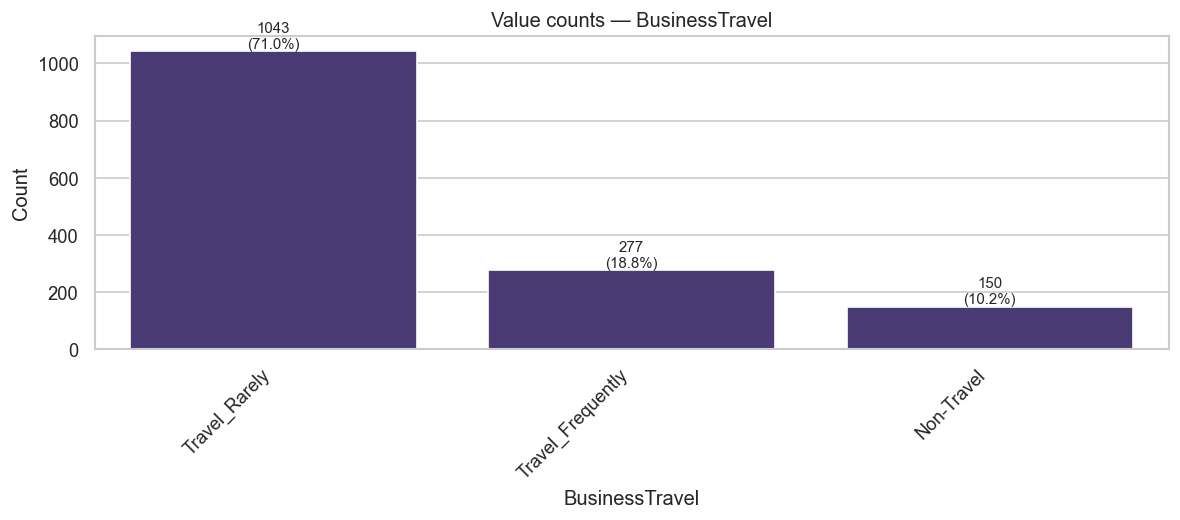

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **DailyRate**

value
count  1470.000000
mean    802.485714
std     403.509100
min     102.000000
25%     465.000000
50%     802.000000
75%    1157.000000
max    1499.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

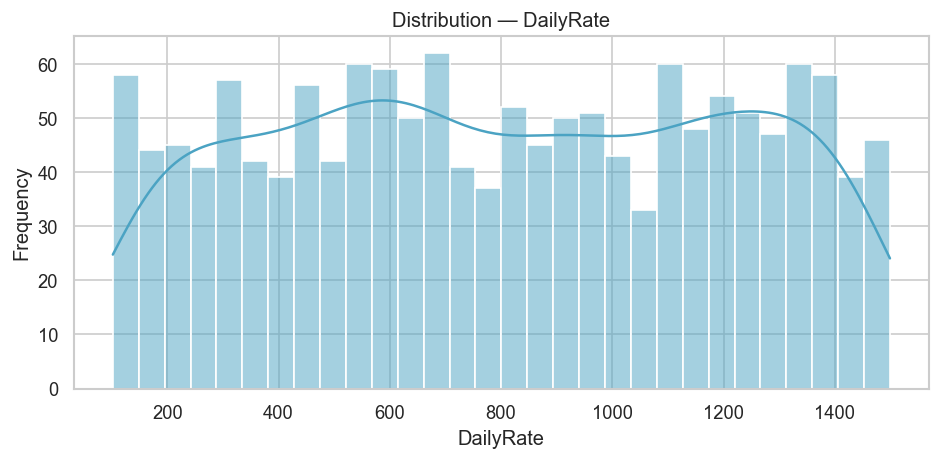

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **Department**

count    pct
Department                          
Research & Development    961  65.37
Sales                     446  30.34
Human Resources            63   4.29

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


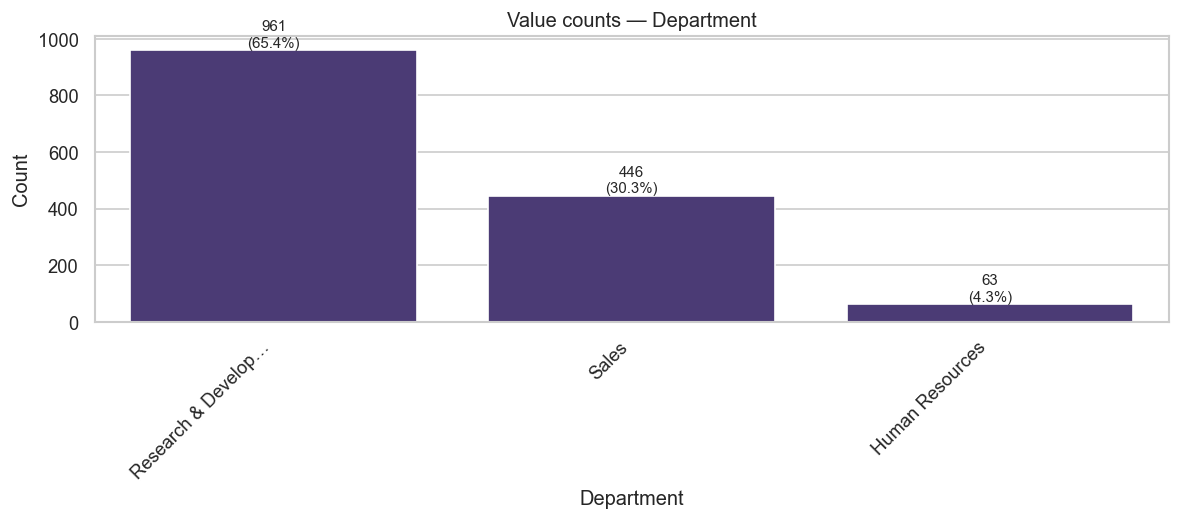

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **DistanceFromHome**

value
count  1470.000000
mean      9.192517
std       8.106864
min       1.000000
25%       2.000000
50%       7.000000
75%      14.000000
max      29.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

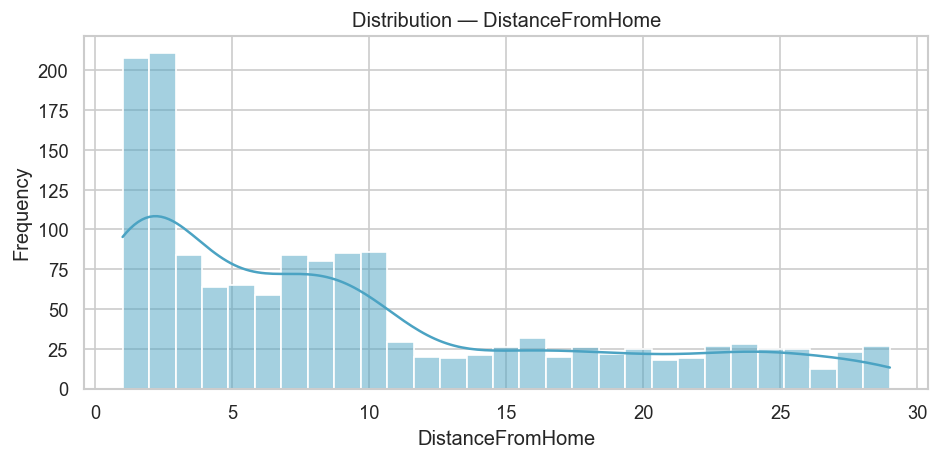

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **Education**

count    pct
Education              
3            572  38.91
4            398  27.07
2            282  19.18
1            170  11.56
5             48   3.27

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


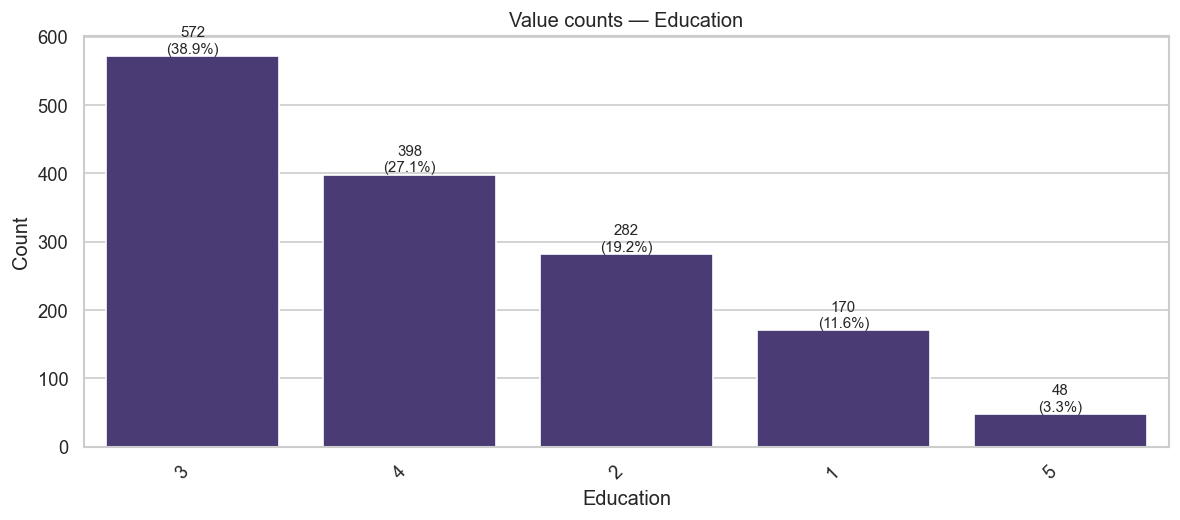

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **EducationField**

count    pct
EducationField                
Life Sciences       606  41.22
Medical             464  31.56
Marketing           159  10.82
Technical Degree    132   8.98
Other                82   5.58
Human Resources      27   1.84

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


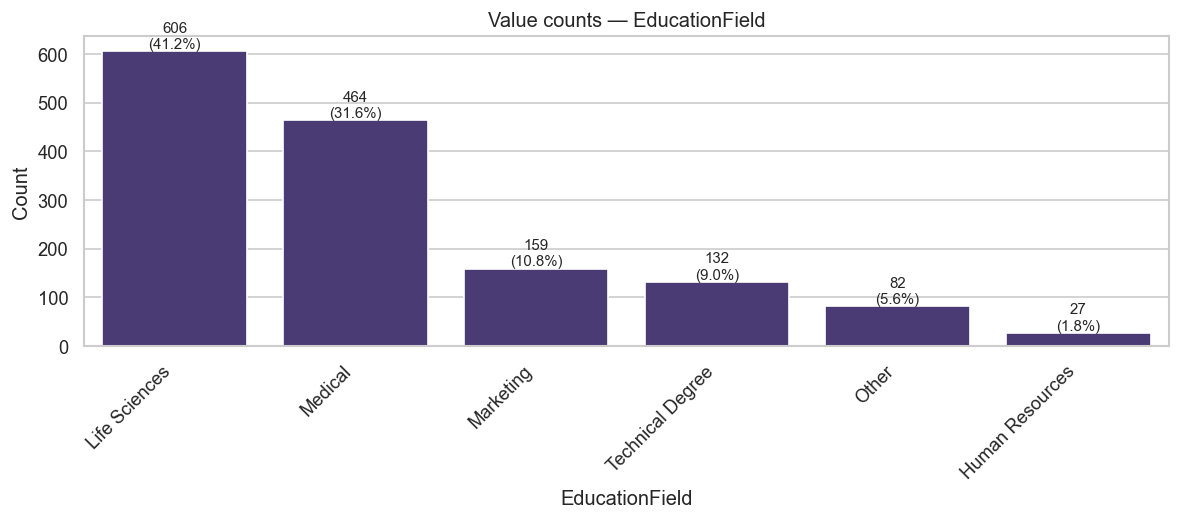

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **EmployeeCount**

count    pct
EmployeeCount              
1               1470  100.0

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


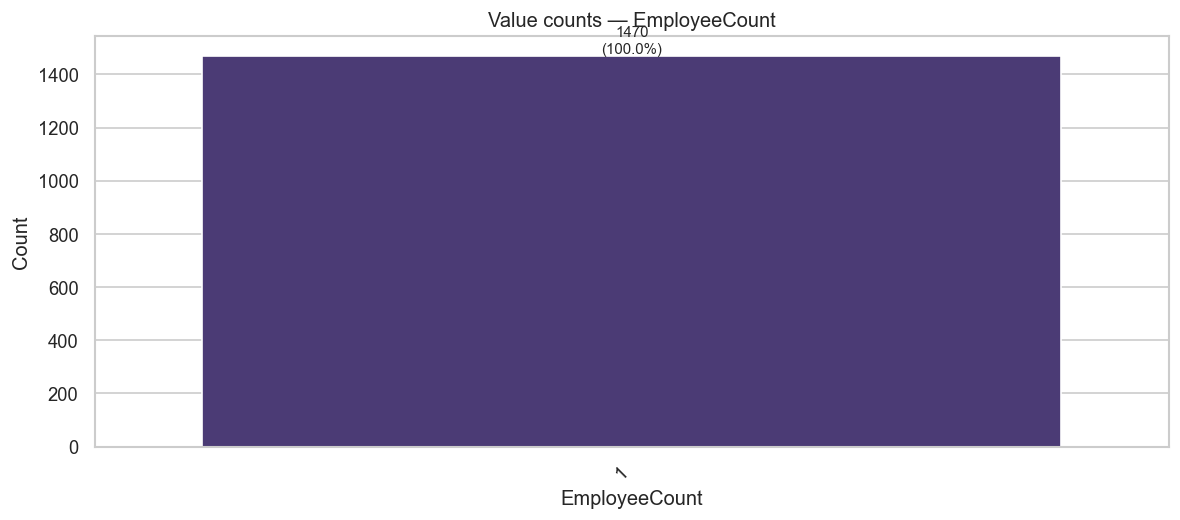

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **EmployeeNumber**

value
count  1470.000000
mean   1024.865306
std     602.024335
min       1.000000
25%     491.250000
50%    1020.500000
75%    1555.750000
max    2068.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

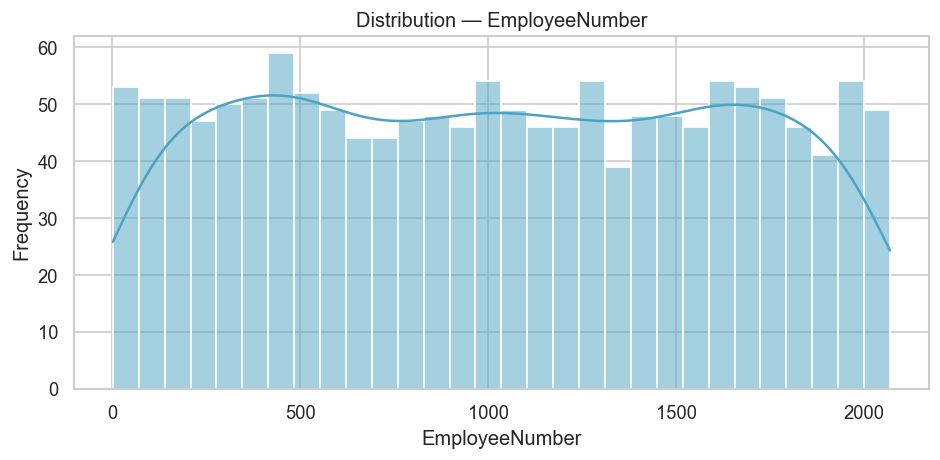

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **EnvironmentSatisfaction**

count    pct
EnvironmentSatisfaction              
3                          453  30.82
4                          446  30.34
2                          287  19.52
1                          284  19.32

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


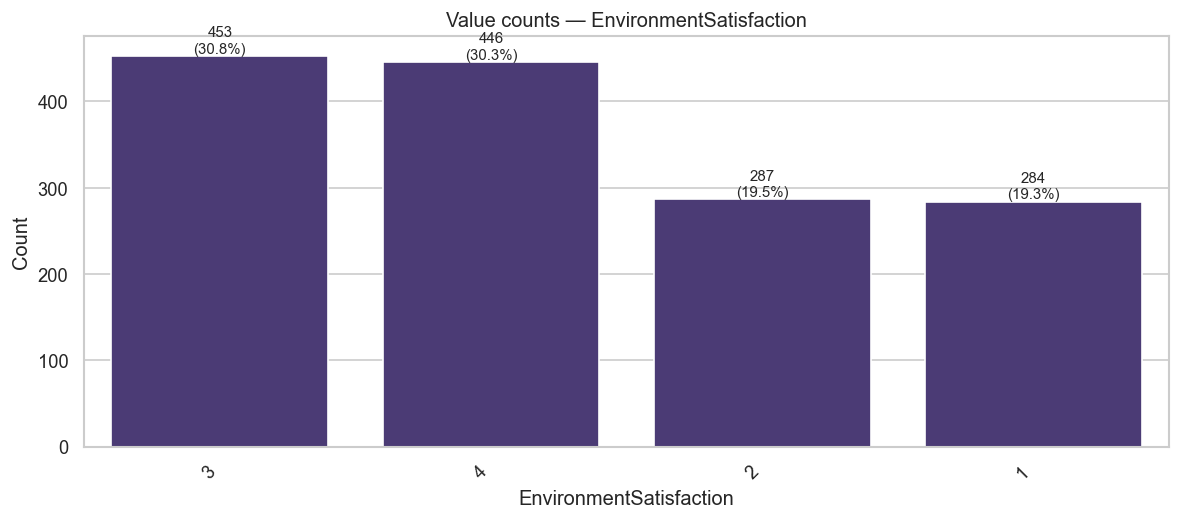

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **Gender**

count   pct
Gender             
Male      882  60.0
Female    588  40.0

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


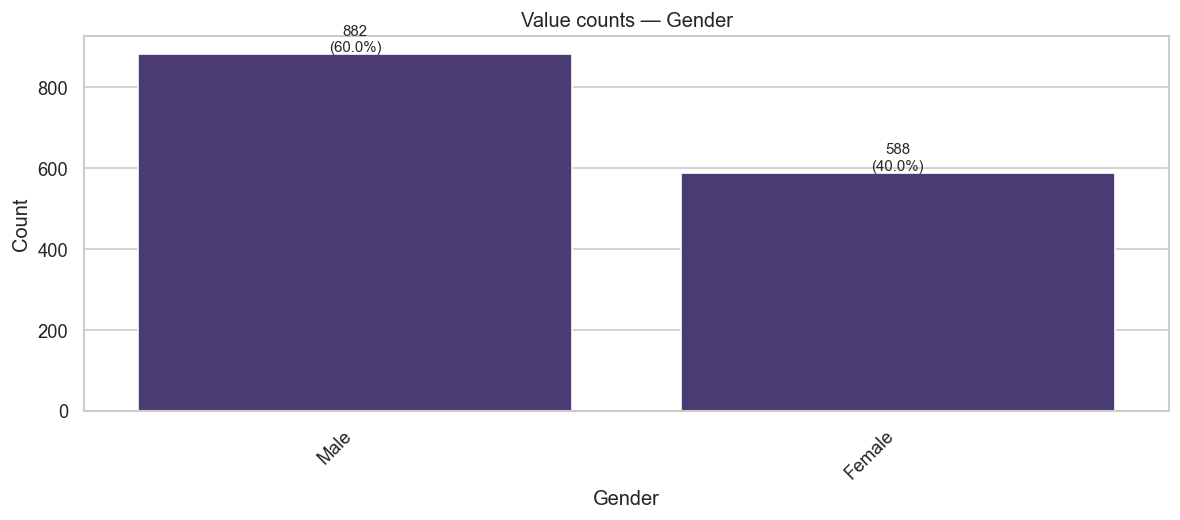

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **HourlyRate**

value
count  1470.000000
mean     65.891156
std      20.329428
min      30.000000
25%      48.000000
50%      66.000000
75%      83.750000
max     100.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

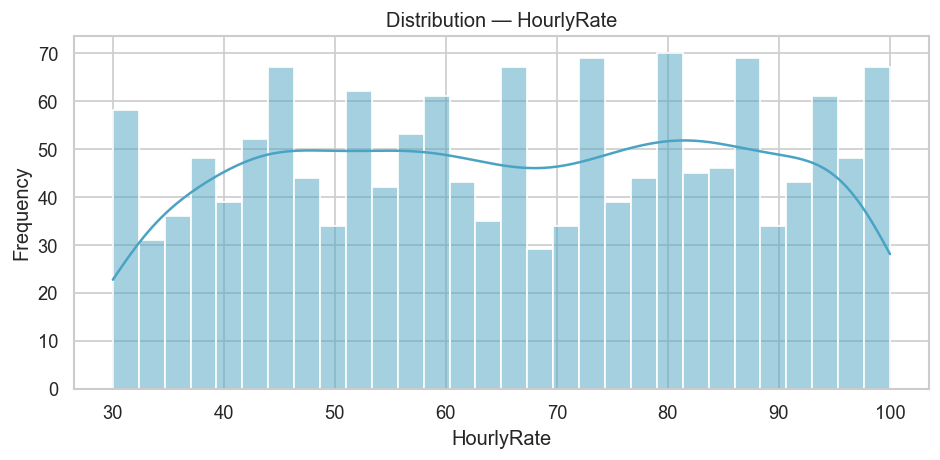

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **JobInvolvement**

count    pct
JobInvolvement              
3                 868  59.05
2                 375  25.51
4                 144   9.80
1                  83   5.65

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


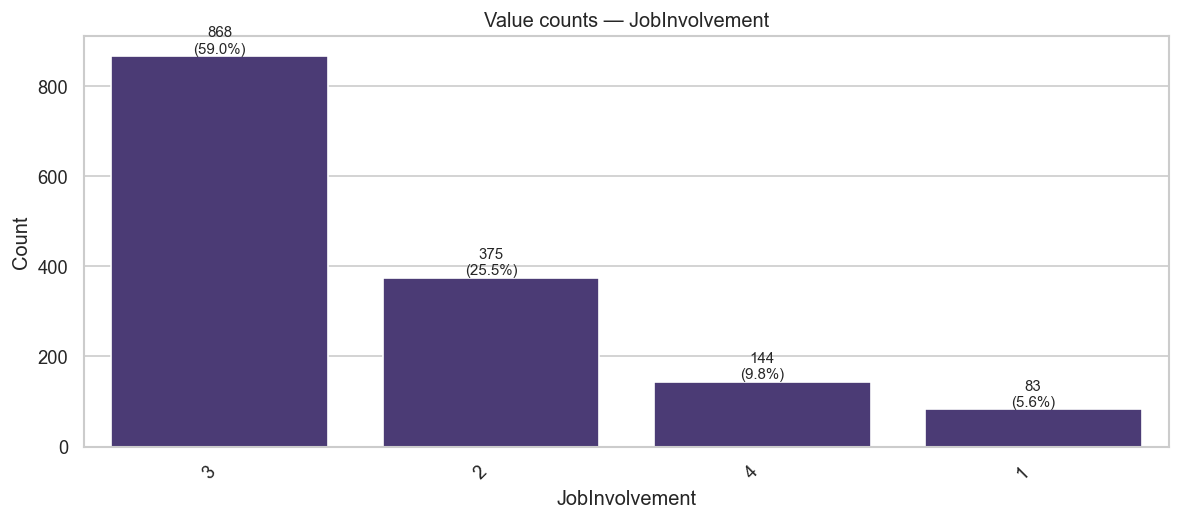

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **JobLevel**

count    pct
JobLevel              
1           543  36.94
2           534  36.33
3           218  14.83
4           106   7.21
5            69   4.69

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


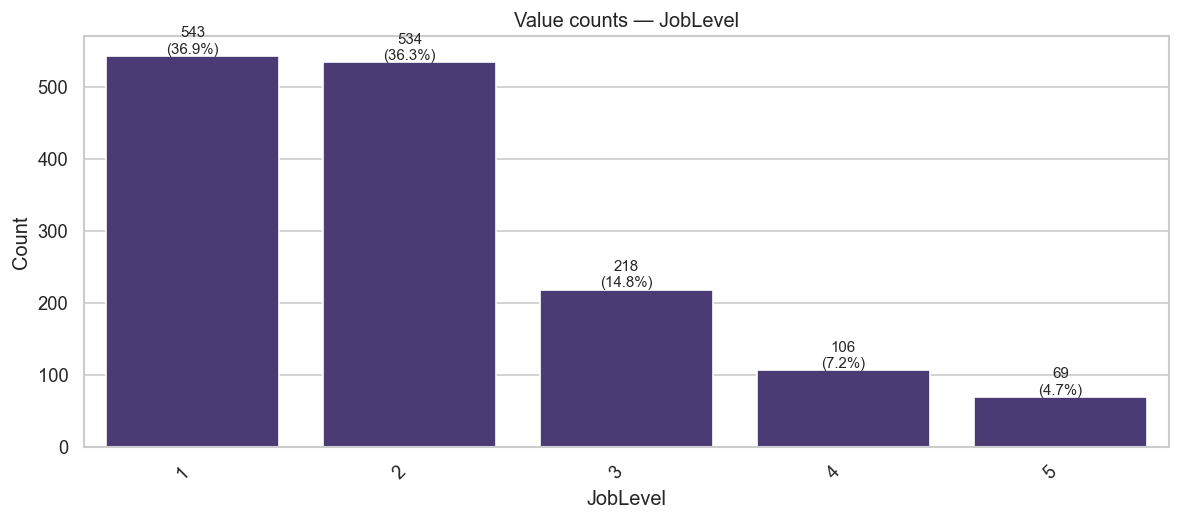

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **JobRole**

count    pct
JobRole                                
Sales Executive              326  22.18
Research Scientist           292  19.86
Laboratory Technician        259  17.62
Manufacturing Director       145   9.86
Healthcare Representative    131   8.91
Manager                      102   6.94
Sales Representative          83   5.65
Research Director             80   5.44
Human Resources               52   3.54

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


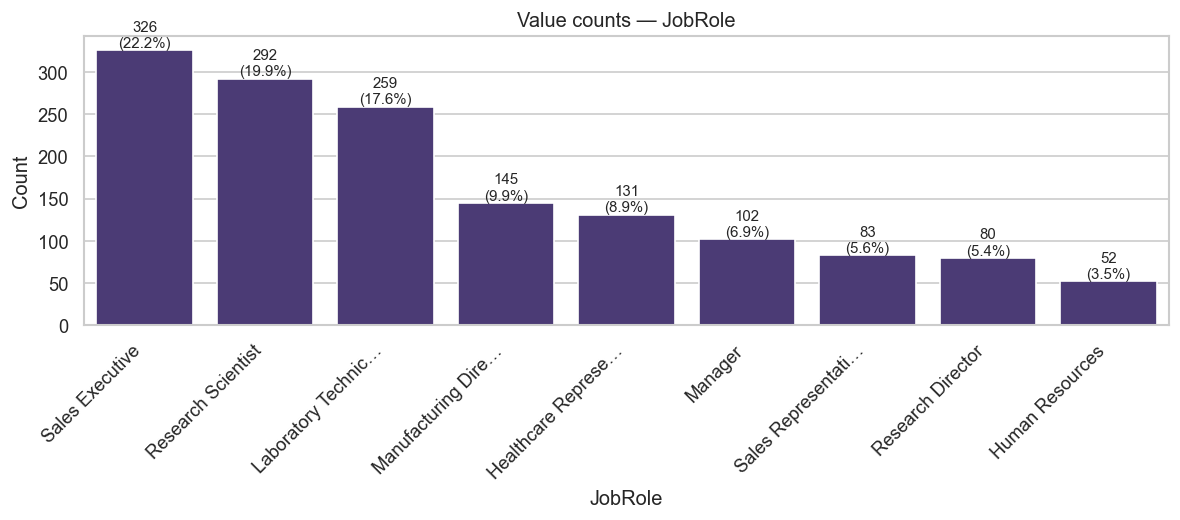

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **JobSatisfaction**

count    pct
JobSatisfaction              
4                  459  31.22
3                  442  30.07
1                  289  19.66
2                  280  19.05

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


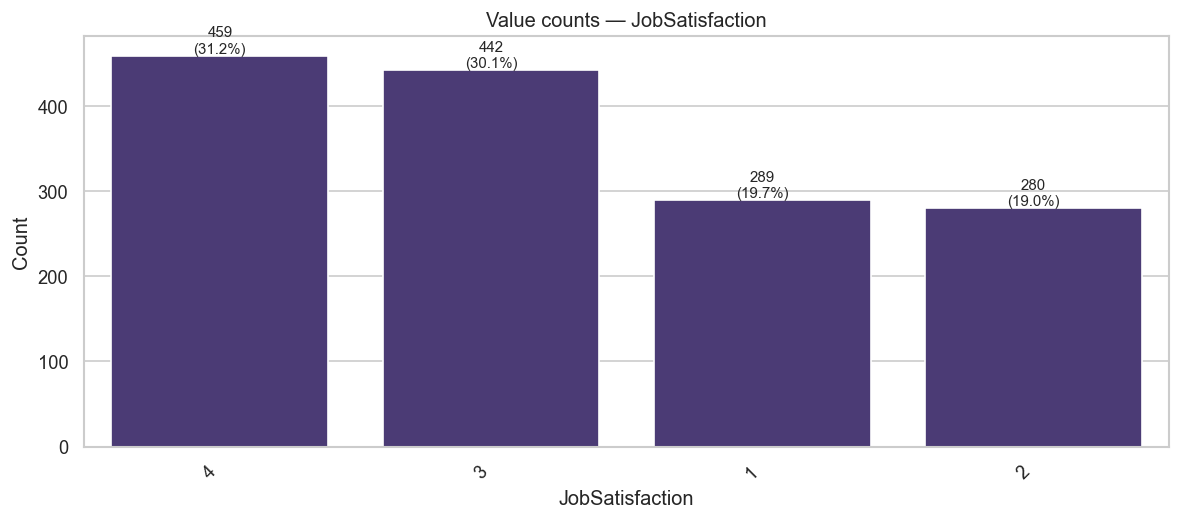

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **MaritalStatus**

count    pct
MaritalStatus              
Married          673  45.78
Single           470  31.97
Divorced         327  22.24

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


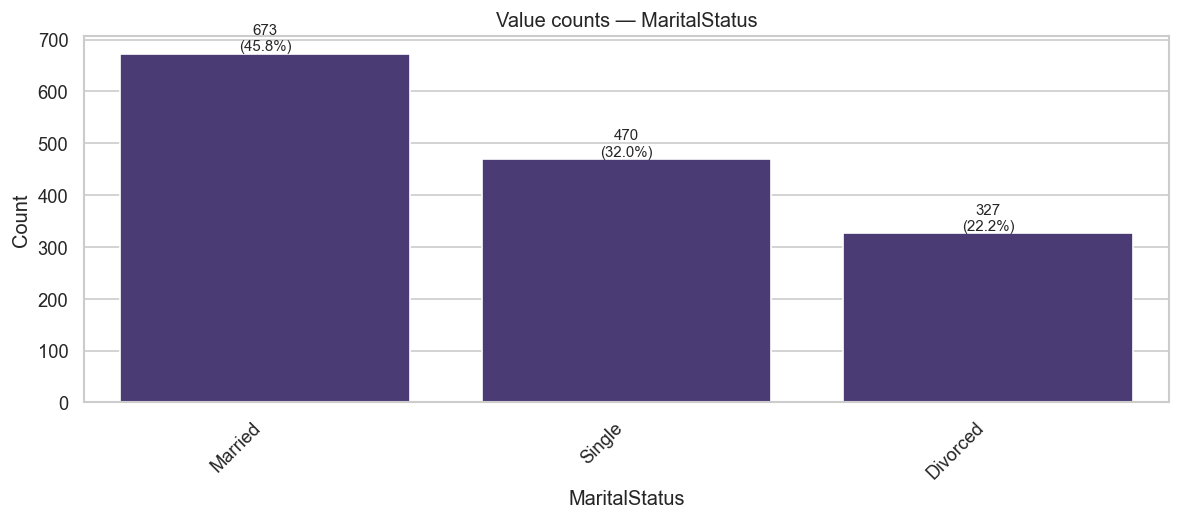

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **MonthlyIncome**

value
count   1470.000000
mean    6502.931293
std     4707.956783
min     1009.000000
25%     2911.000000
50%     4919.000000
75%     8379.000000
max    19999.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

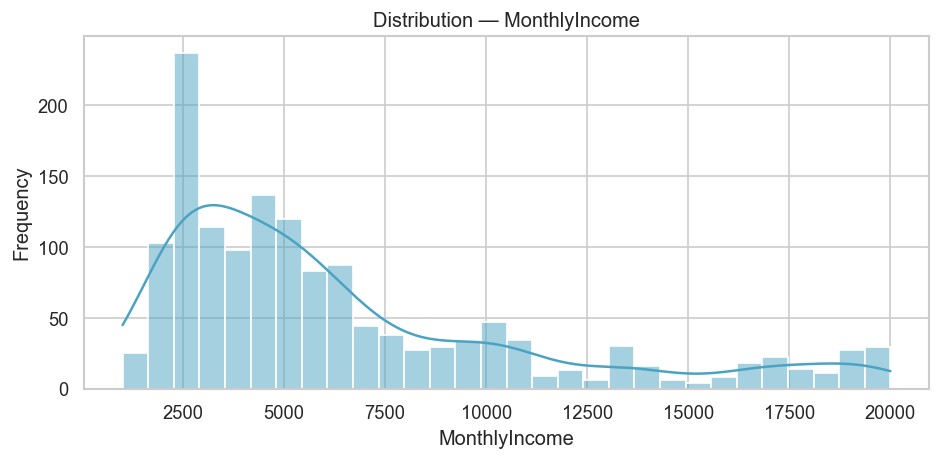

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **MonthlyRate**

value
count   1470.000000
mean   14313.103401
std     7117.786044
min     2094.000000
25%     8047.000000
50%    14235.500000
75%    20461.500000
max    26999.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

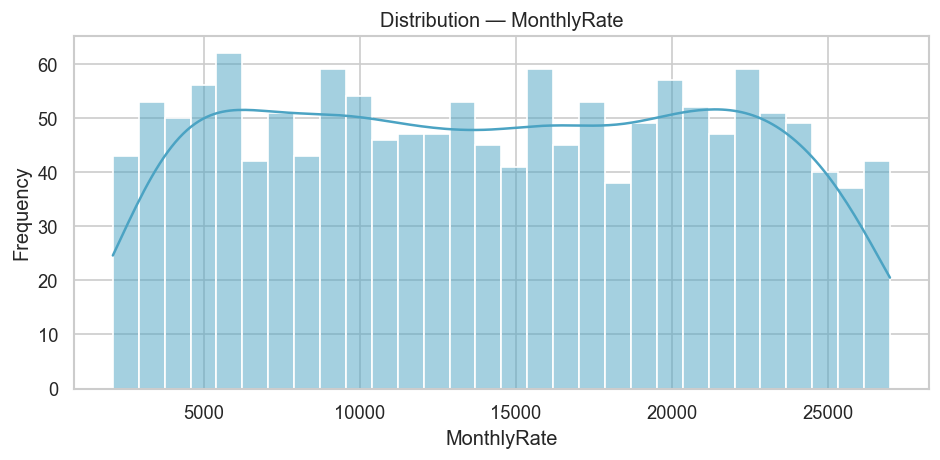

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **NumCompaniesWorked**

value
count  1470.000000
mean      2.693197
std       2.498009
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       9.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

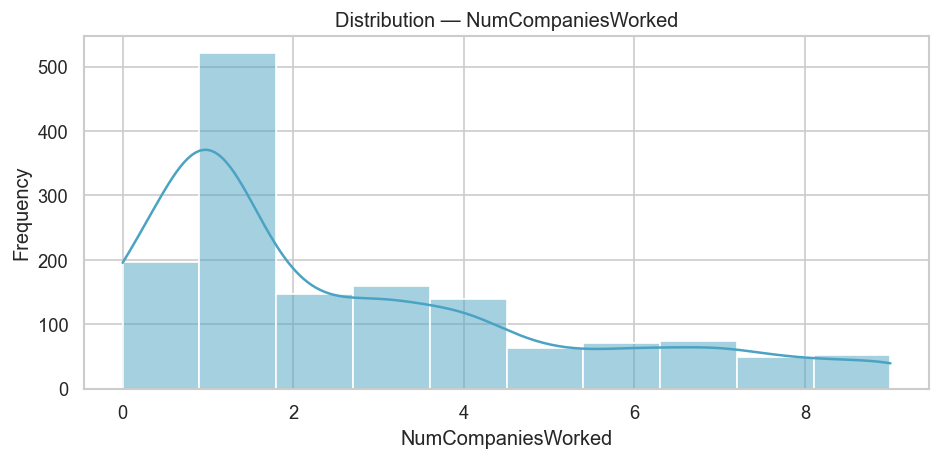

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **Over18**

count    pct
Over18              
Y        1470  100.0

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


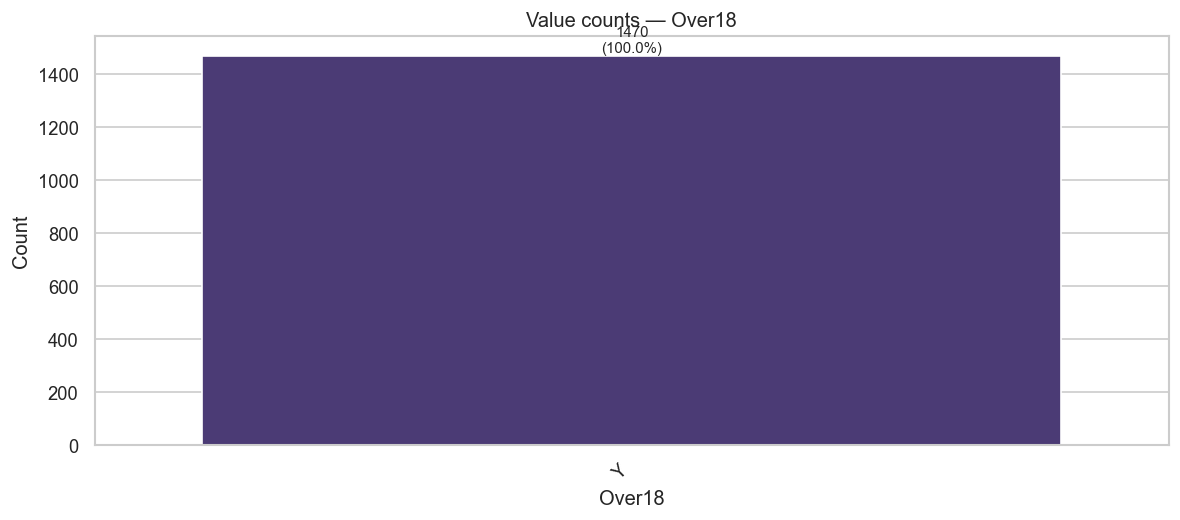

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **OverTime**

count   pct
OverTime             
No         1054  71.7
Yes         416  28.3

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


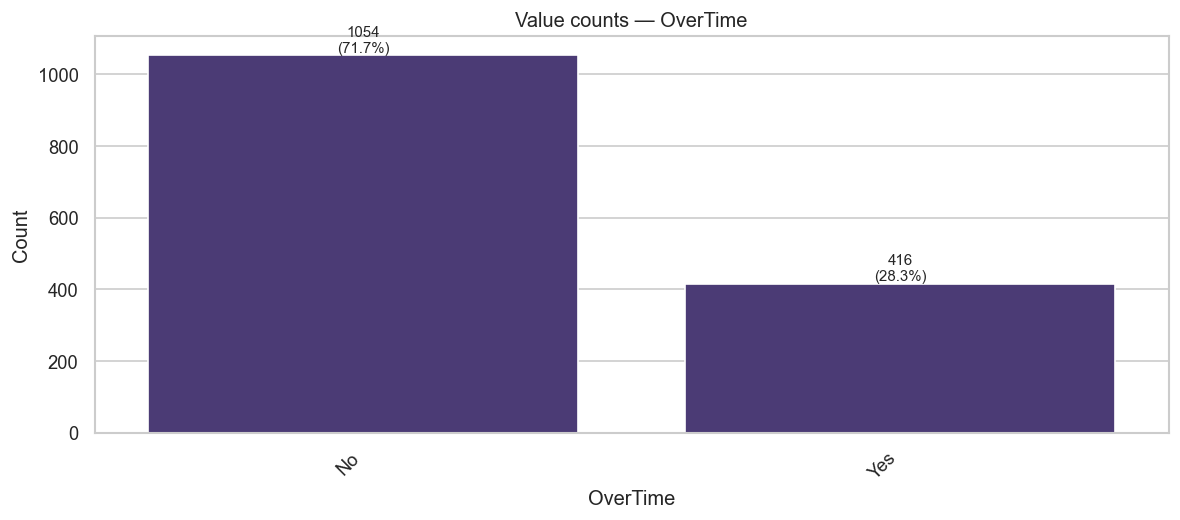

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **PercentSalaryHike**

value
count  1470.000000
mean     15.209524
std       3.659938
min      11.000000
25%      12.000000
50%      14.000000
75%      18.000000
max      25.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

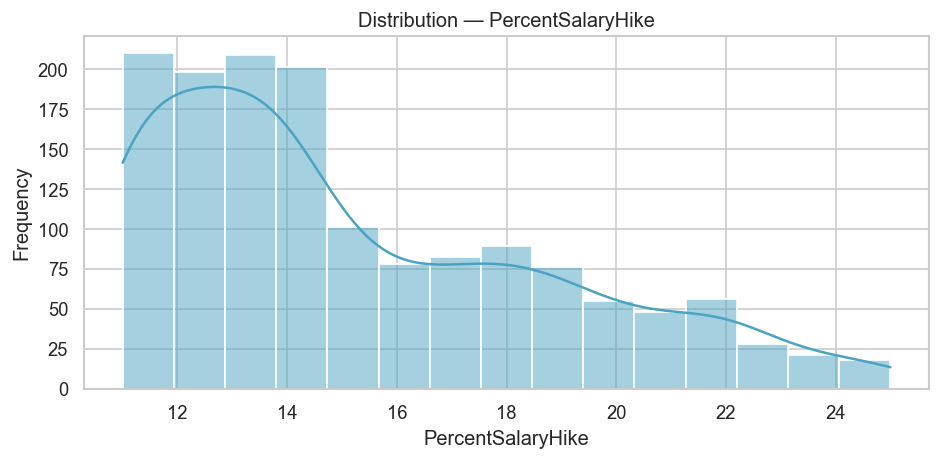

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **PerformanceRating**

count    pct
PerformanceRating              
3                   1244  84.63
4                    226  15.37

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


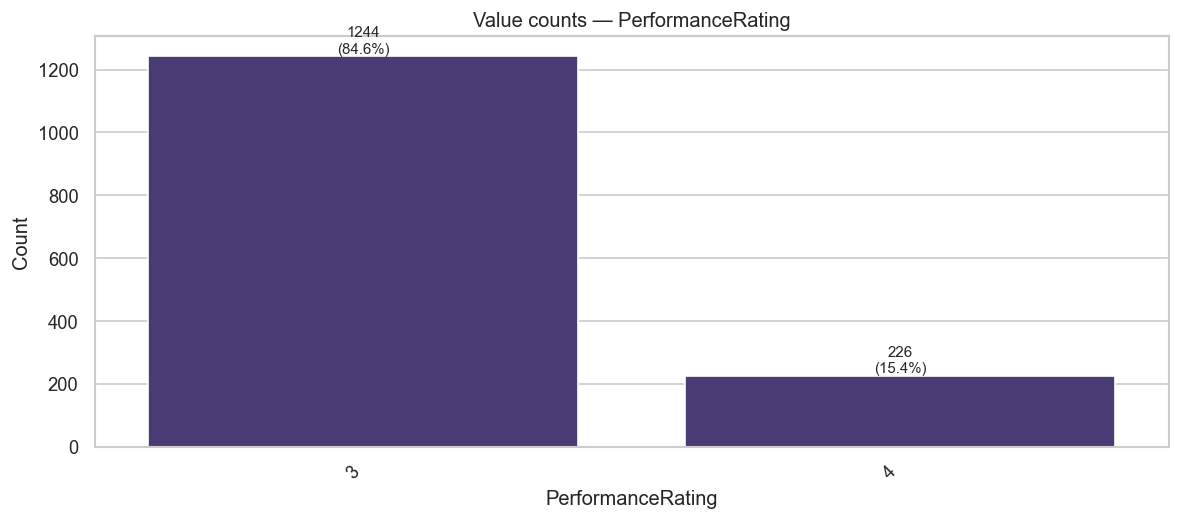

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **RelationshipSatisfaction**

count    pct
RelationshipSatisfaction              
3                           459  31.22
4                           432  29.39
2                           303  20.61
1                           276  18.78

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


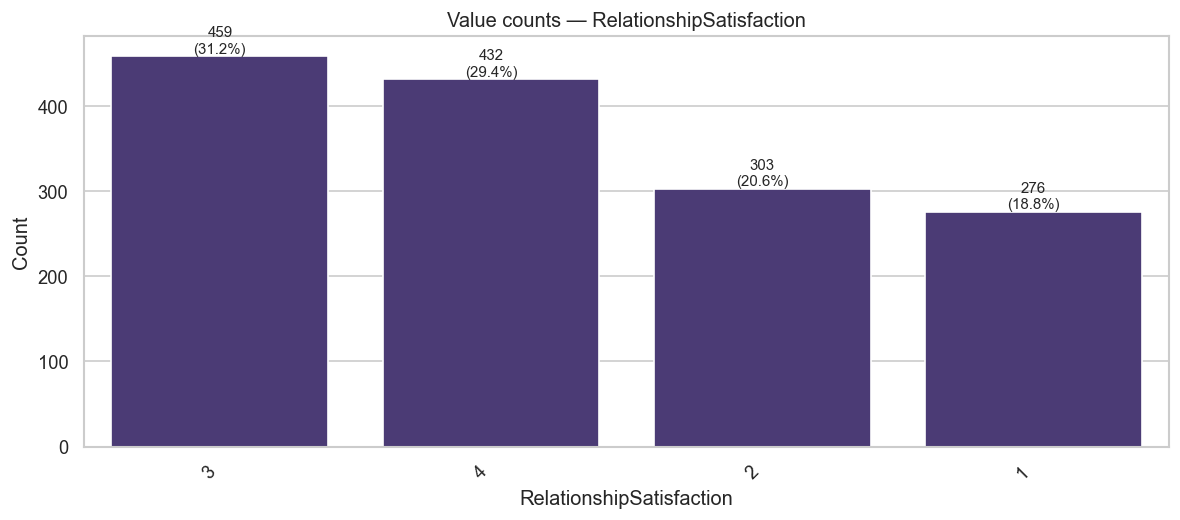

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **StandardHours**

count    pct
StandardHours              
80              1470  100.0

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


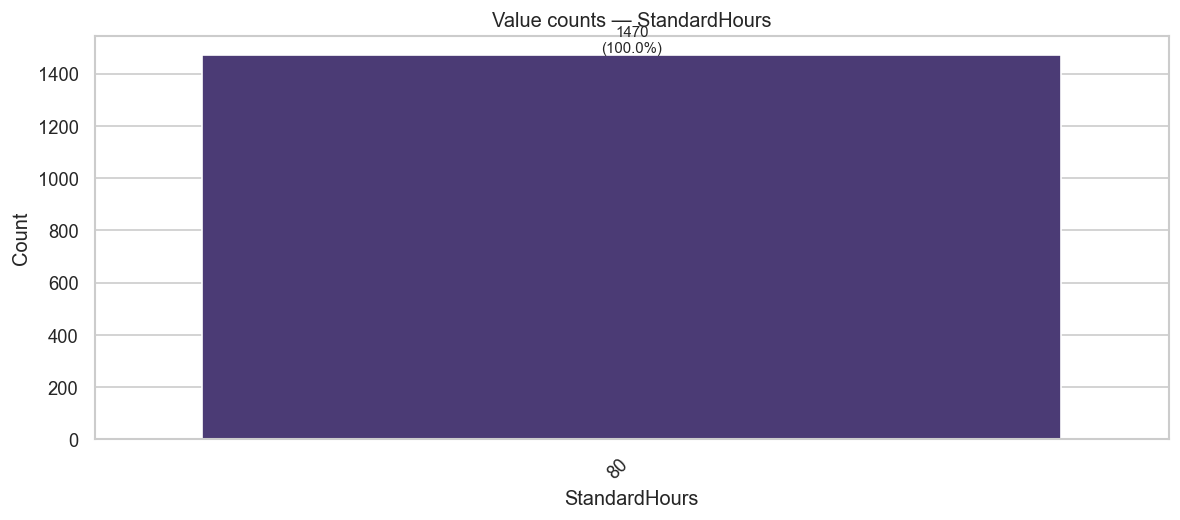

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **StockOptionLevel**

count    pct
StockOptionLevel              
0                   631  42.93
1                   596  40.54
2                   158  10.75
3                    85   5.78

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


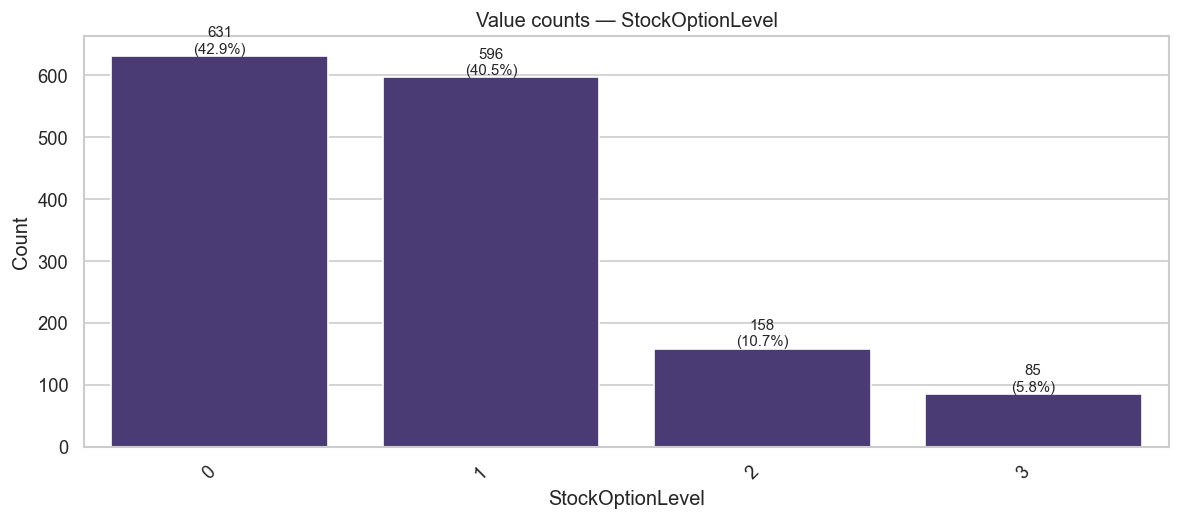

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **TotalWorkingYears**

value
count  1470.000000
mean     11.279592
std       7.780782
min       0.000000
25%       6.000000
50%      10.000000
75%      15.000000
max      40.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

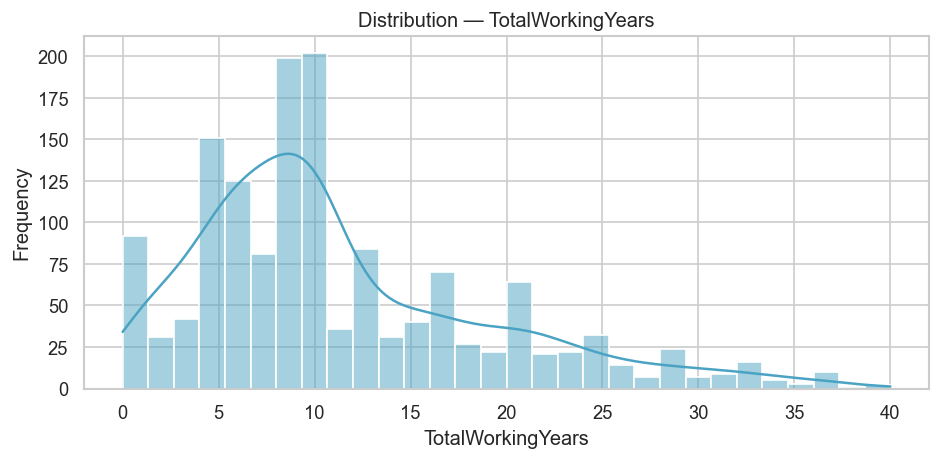

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **TrainingTimesLastYear**

count    pct
TrainingTimesLastYear              
2                        547  37.21
3                        491  33.40
4                        123   8.37
5                        119   8.10
1                         71   4.83
6                         65   4.42
0                         54   3.67

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


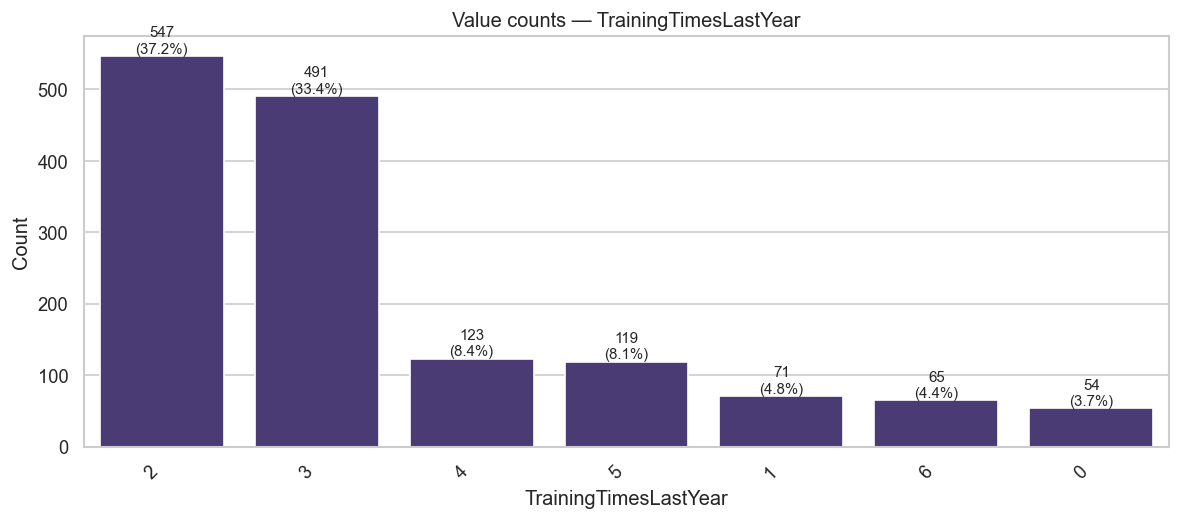

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **WorkLifeBalance**

count    pct
WorkLifeBalance              
3                  893  60.75
2                  344  23.40
4                  153  10.41
1                   80   5.44

> **What this table shows:** **Counts and percentages** per category. 
> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:185: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


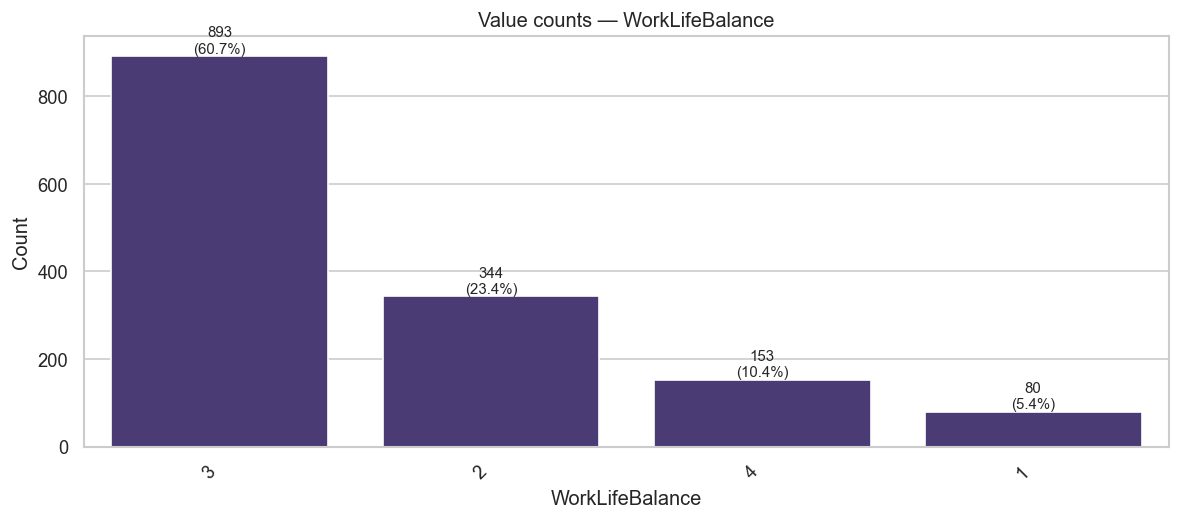

> **How to read this plot:** Category height = **frequency**. 
> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.

#### Column: **YearsAtCompany**

value
count  1470.000000
mean      7.008163
std       6.126525
min       0.000000
25%       3.000000
50%       5.000000
75%       9.000000
max      40.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

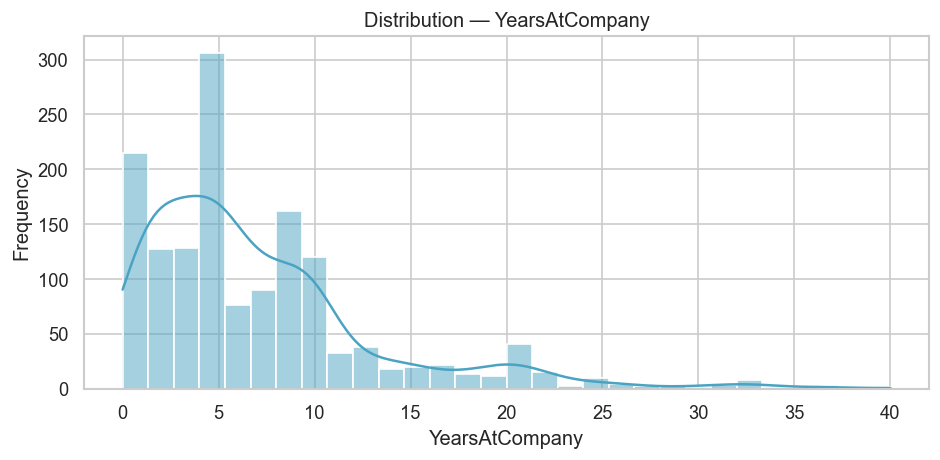

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **YearsInCurrentRole**

value
count  1470.000000
mean      4.229252
std       3.623137
min       0.000000
25%       2.000000
50%       3.000000
75%       7.000000
max      18.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

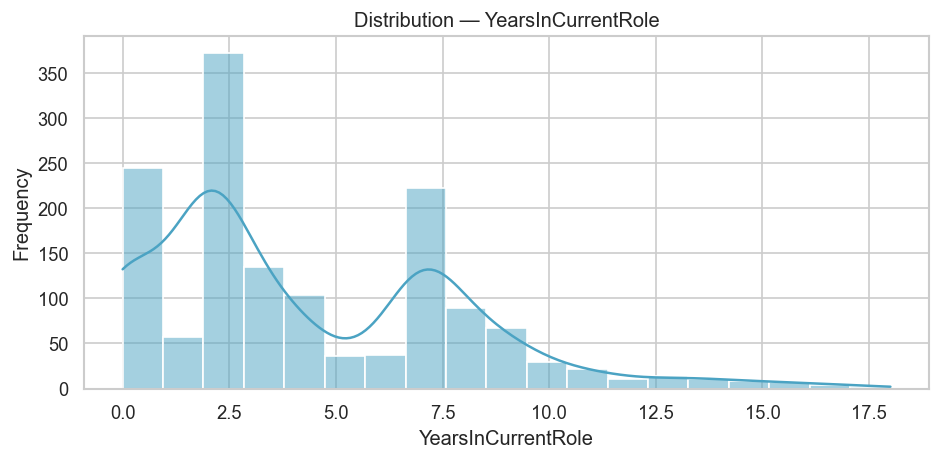

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **YearsSinceLastPromotion**

value
count  1470.000000
mean      2.187755
std       3.222430
min       0.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      15.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

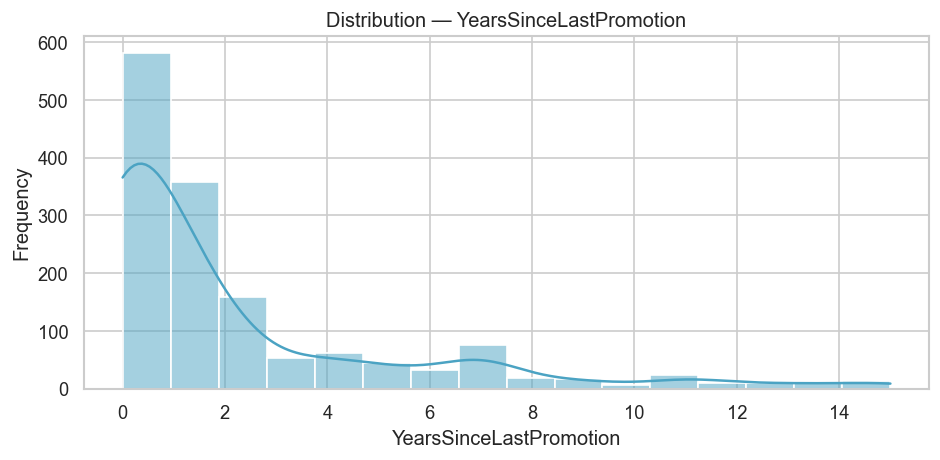

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

#### Column: **YearsWithCurrManager**

value
count  1470.000000
mean      4.123129
std       3.568136
min       0.000000
25%       2.000000
50%       3.000000
75%       7.000000
max      17.000000

> **What this table shows:** Central tendency and spread for a **single variable**. 
> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).

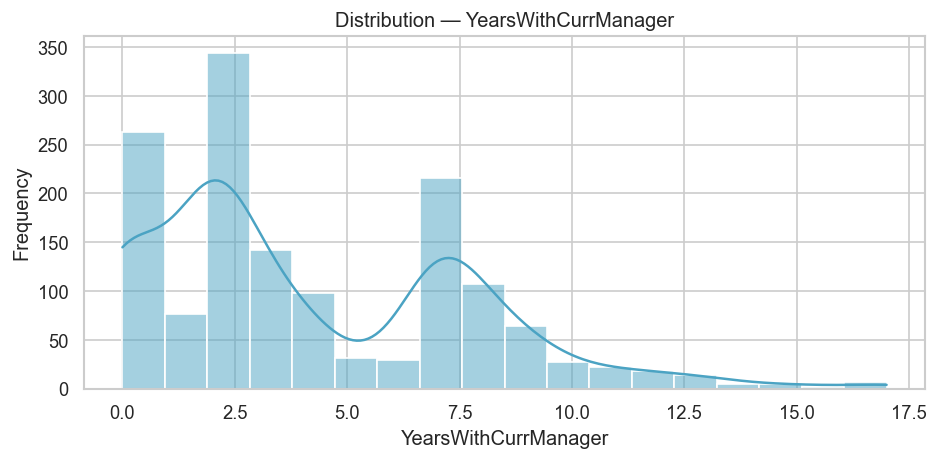

> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. 
> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.

### Outlier scan (IQR & Z-score)

column  outliers_IQR  outliers_Zgt3     n  \
20     TrainingTimesLastYear           238              0  1470   
15         PerformanceRating           226              0  1470   
11             MonthlyIncome           114              0  1470   
24   YearsSinceLastPromotion           107             42  1470   
22            YearsAtCompany           104             25  1470   
18          StockOptionLevel            85              0  1470   
19         TotalWorkingYears            63             16  1470   
13        NumCompaniesWorked            52              0  1470   
23        YearsInCurrentRole            21             13  1470   
25      YearsWithCurrManager            14             14  1470   
10           JobSatisfaction             0              0  1470   
9                   JobLevel             0              0  1470   
12               MonthlyRate             0              0  1470   
1                  DailyRate             0              0  1470   
14         PercentSalaryHike             0              0  1470   
8             JobInvolvement             0              0  1470   
16  RelationshipSatisfaction             0              0  1470   
17             StandardHours             0              0  1470   
7                 HourlyRate             0              0  1470   
6    EnvironmentSatisfaction             0              0  1470   
5             EmployeeNumber             0              0  1470   
21           WorkLifeBalance             0              0  1470   
4              EmployeeCount             0              0  1470   
3                  Education             0              0  1470   
2           DistanceFromHome             0              0  1470   
0                        Age             0              0  1470   

    IQR_outlier_rate_%  Z_outlier_rate_%  
20               16.19              0.00  
15               15.37              0.00  
11                7.76              0.00  
24                7.28              2.86  
22                7.07              1.70  
18                5.78              0.00  
19                4.29              1.09  
13                3.54              0.00  
23                1.43              0.88  
25                0.95              0.95  
10                0.00              0.00  
9                 0.00              0.00  
12                0.00              0.00  
1                 0.00              0.00  
14                0.00              0.00  
8                 0.00              0.00  
16                0.00              0.00  
17                0.00              0.00  
7                 0.00              0.00  
6                 0.00              0.00  
5                 0.00              0.00  
21                0.00              0.00  
4                 0.00              0.00  
3                 0.00              0.00  
2                 0.00              0.00  
0                 0.00              0.00

> **How to interpret:** 
> • **IQR method** flags values beyond Q1−1.5×IQR or Q3+1.5×IQR (robust to skew). 
> • **Z‑score > 3** flags extreme standard deviations (assumes ~normality). 
> **Use cases:** Investigate data quality vs. legitimate extremes; consider **winsorization**, **capping**, or **robust models**.

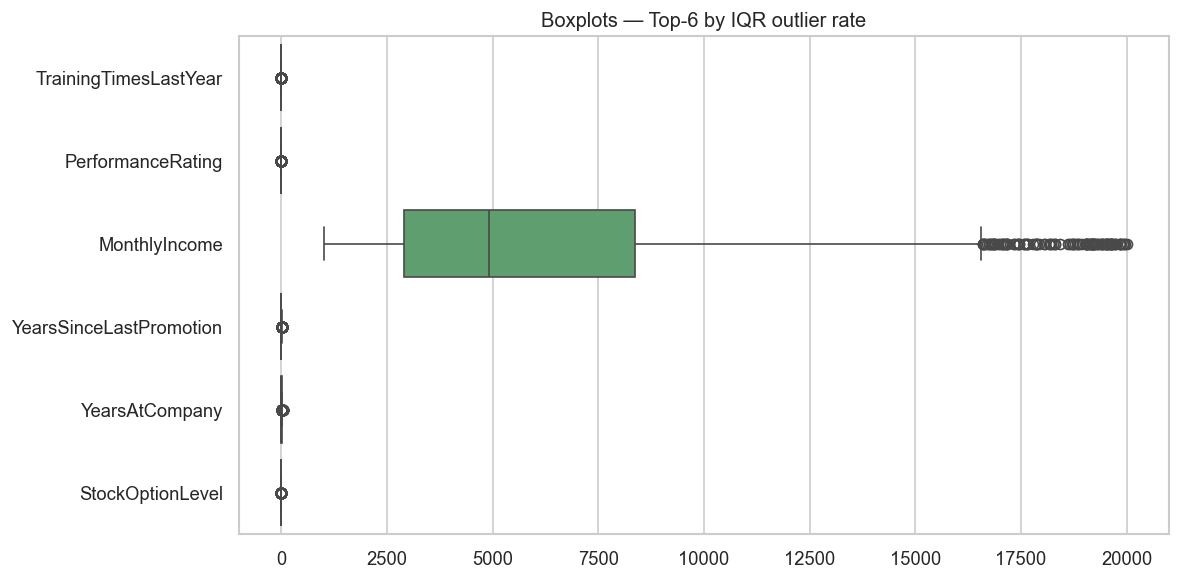

> **Reading boxplots:** Fliers beyond whiskers are candidate outliers. Compare **spread** and **median** shifts across variables.

### Missingness visualizations

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:255: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


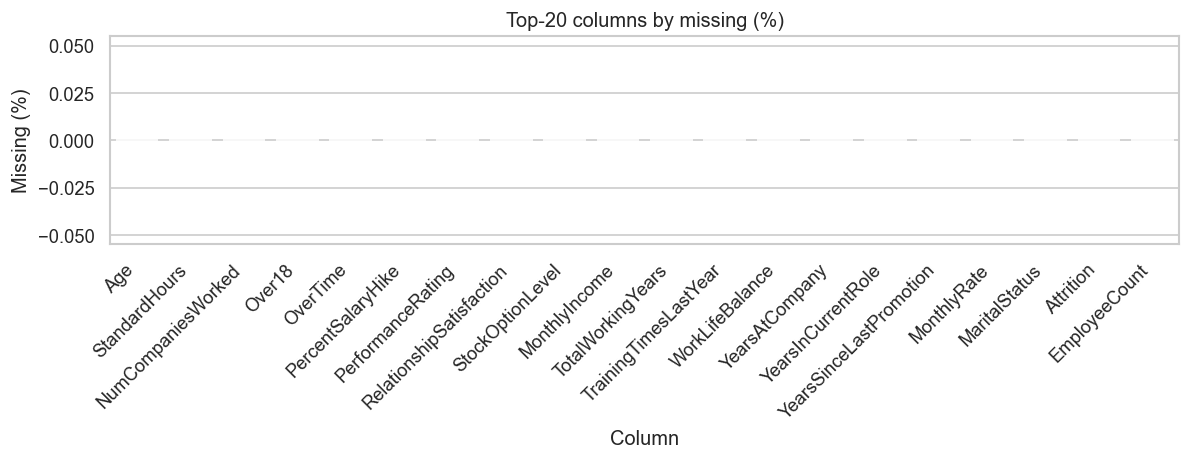

> **What this shows:** Columns with highest **missing percentages**. 
> **Why it matters:** High missingness may degrade model performance; plan **imputation** or **feature removal**.

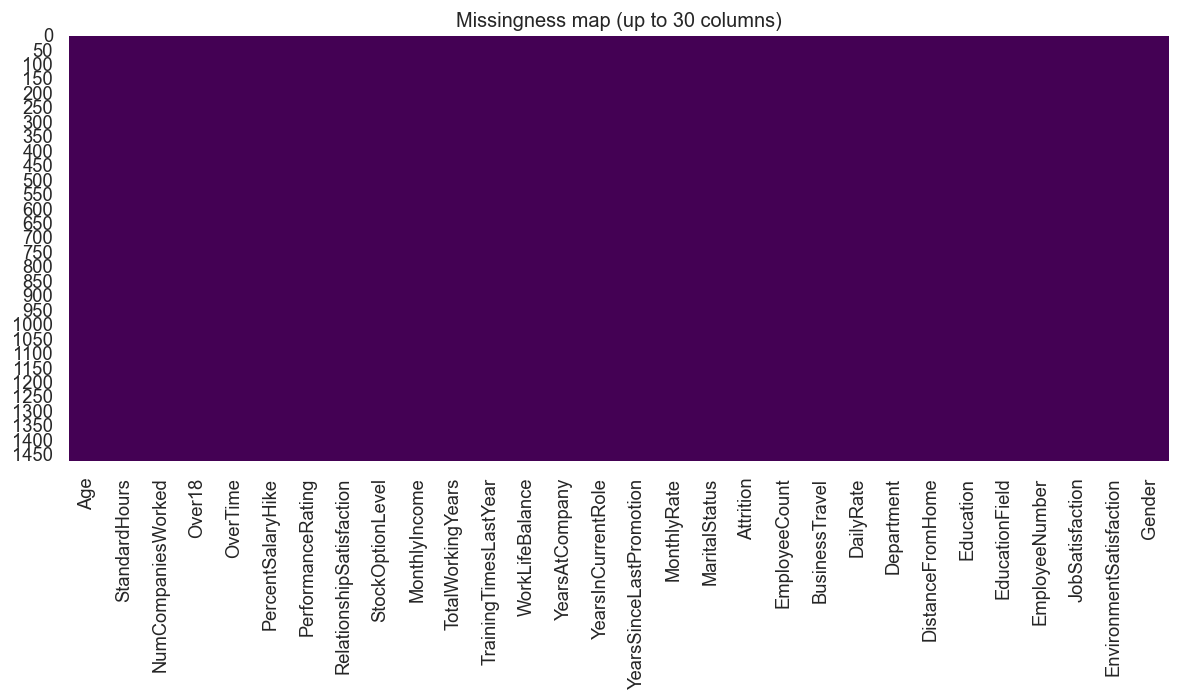

> **How to read:** Vertical bands show rows with many missing fields—potential **systemic issues** or **shared conditions** causing gaps.

Correlation between missingness masks

Age  StandardHours  NumCompaniesWorked  Over18  \
Age                       NaN            NaN                 NaN     NaN   
StandardHours             NaN            NaN                 NaN     NaN   
NumCompaniesWorked        NaN            NaN                 NaN     NaN   
Over18                    NaN            NaN                 NaN     NaN   
OverTime                  NaN            NaN                 NaN     NaN   
PercentSalaryHike         NaN            NaN                 NaN     NaN   
PerformanceRating         NaN            NaN                 NaN     NaN   
RelationshipSatisfaction  NaN            NaN                 NaN     NaN   
StockOptionLevel          NaN            NaN                 NaN     NaN   
MonthlyIncome             NaN            NaN                 NaN     NaN   
TotalWorkingYears         NaN            NaN                 NaN     NaN   
TrainingTimesLastYear     NaN            NaN                 NaN     NaN   
WorkLifeBalance           NaN            NaN                 NaN     NaN   
YearsAtCompany            NaN            NaN                 NaN     NaN   
YearsInCurrentRole        NaN            NaN                 NaN     NaN   
YearsSinceLastPromotion   NaN            NaN                 NaN     NaN   
MonthlyRate               NaN            NaN                 NaN     NaN   
MaritalStatus             NaN            NaN                 NaN     NaN   
Attrition                 NaN            NaN                 NaN     NaN   
EmployeeCount             NaN            NaN                 NaN     NaN   
BusinessTravel            NaN            NaN                 NaN     NaN   
DailyRate                 NaN            NaN                 NaN     NaN   
Department                NaN            NaN                 NaN     NaN   
DistanceFromHome          NaN            NaN                 NaN     NaN   
Education                 NaN            NaN                 NaN     NaN   
EducationField            NaN            NaN                 NaN     NaN   
EmployeeNumber            NaN            NaN                 NaN     NaN   
JobSatisfaction           NaN            NaN                 NaN     NaN   
EnvironmentSatisfaction   NaN            NaN                 NaN     NaN   
Gender                    NaN            NaN                 NaN     NaN   

                          OverTime  PercentSalaryHike  PerformanceRating  \
Age                            NaN                NaN                NaN   
StandardHours                  NaN                NaN                NaN   
NumCompaniesWorked             NaN                NaN                NaN   
Over18                         NaN                NaN                NaN   
OverTime                       NaN                NaN                NaN   
PercentSalaryHike              NaN                NaN                NaN   
PerformanceRating              NaN                NaN                NaN   
RelationshipSatisfaction       NaN                NaN                NaN   
StockOptionLevel               NaN                NaN                NaN   
MonthlyIncome                  NaN                NaN                NaN   
TotalWorkingYears              NaN                NaN                NaN   
TrainingTimesLastYear          NaN                NaN                NaN   
WorkLifeBalance                NaN                NaN                NaN   
YearsAtCompany                 NaN                NaN                NaN   
YearsInCurrentRole             NaN                NaN                NaN   
YearsSinceLastPromotion        NaN                NaN                NaN   
MonthlyRate                    NaN                NaN                NaN   
MaritalStatus                  NaN                NaN                NaN   
Attrition                      NaN                NaN                NaN   
EmployeeCount                  NaN                NaN                NaN   
BusinessTravel                 NaN                NaN                NaN 

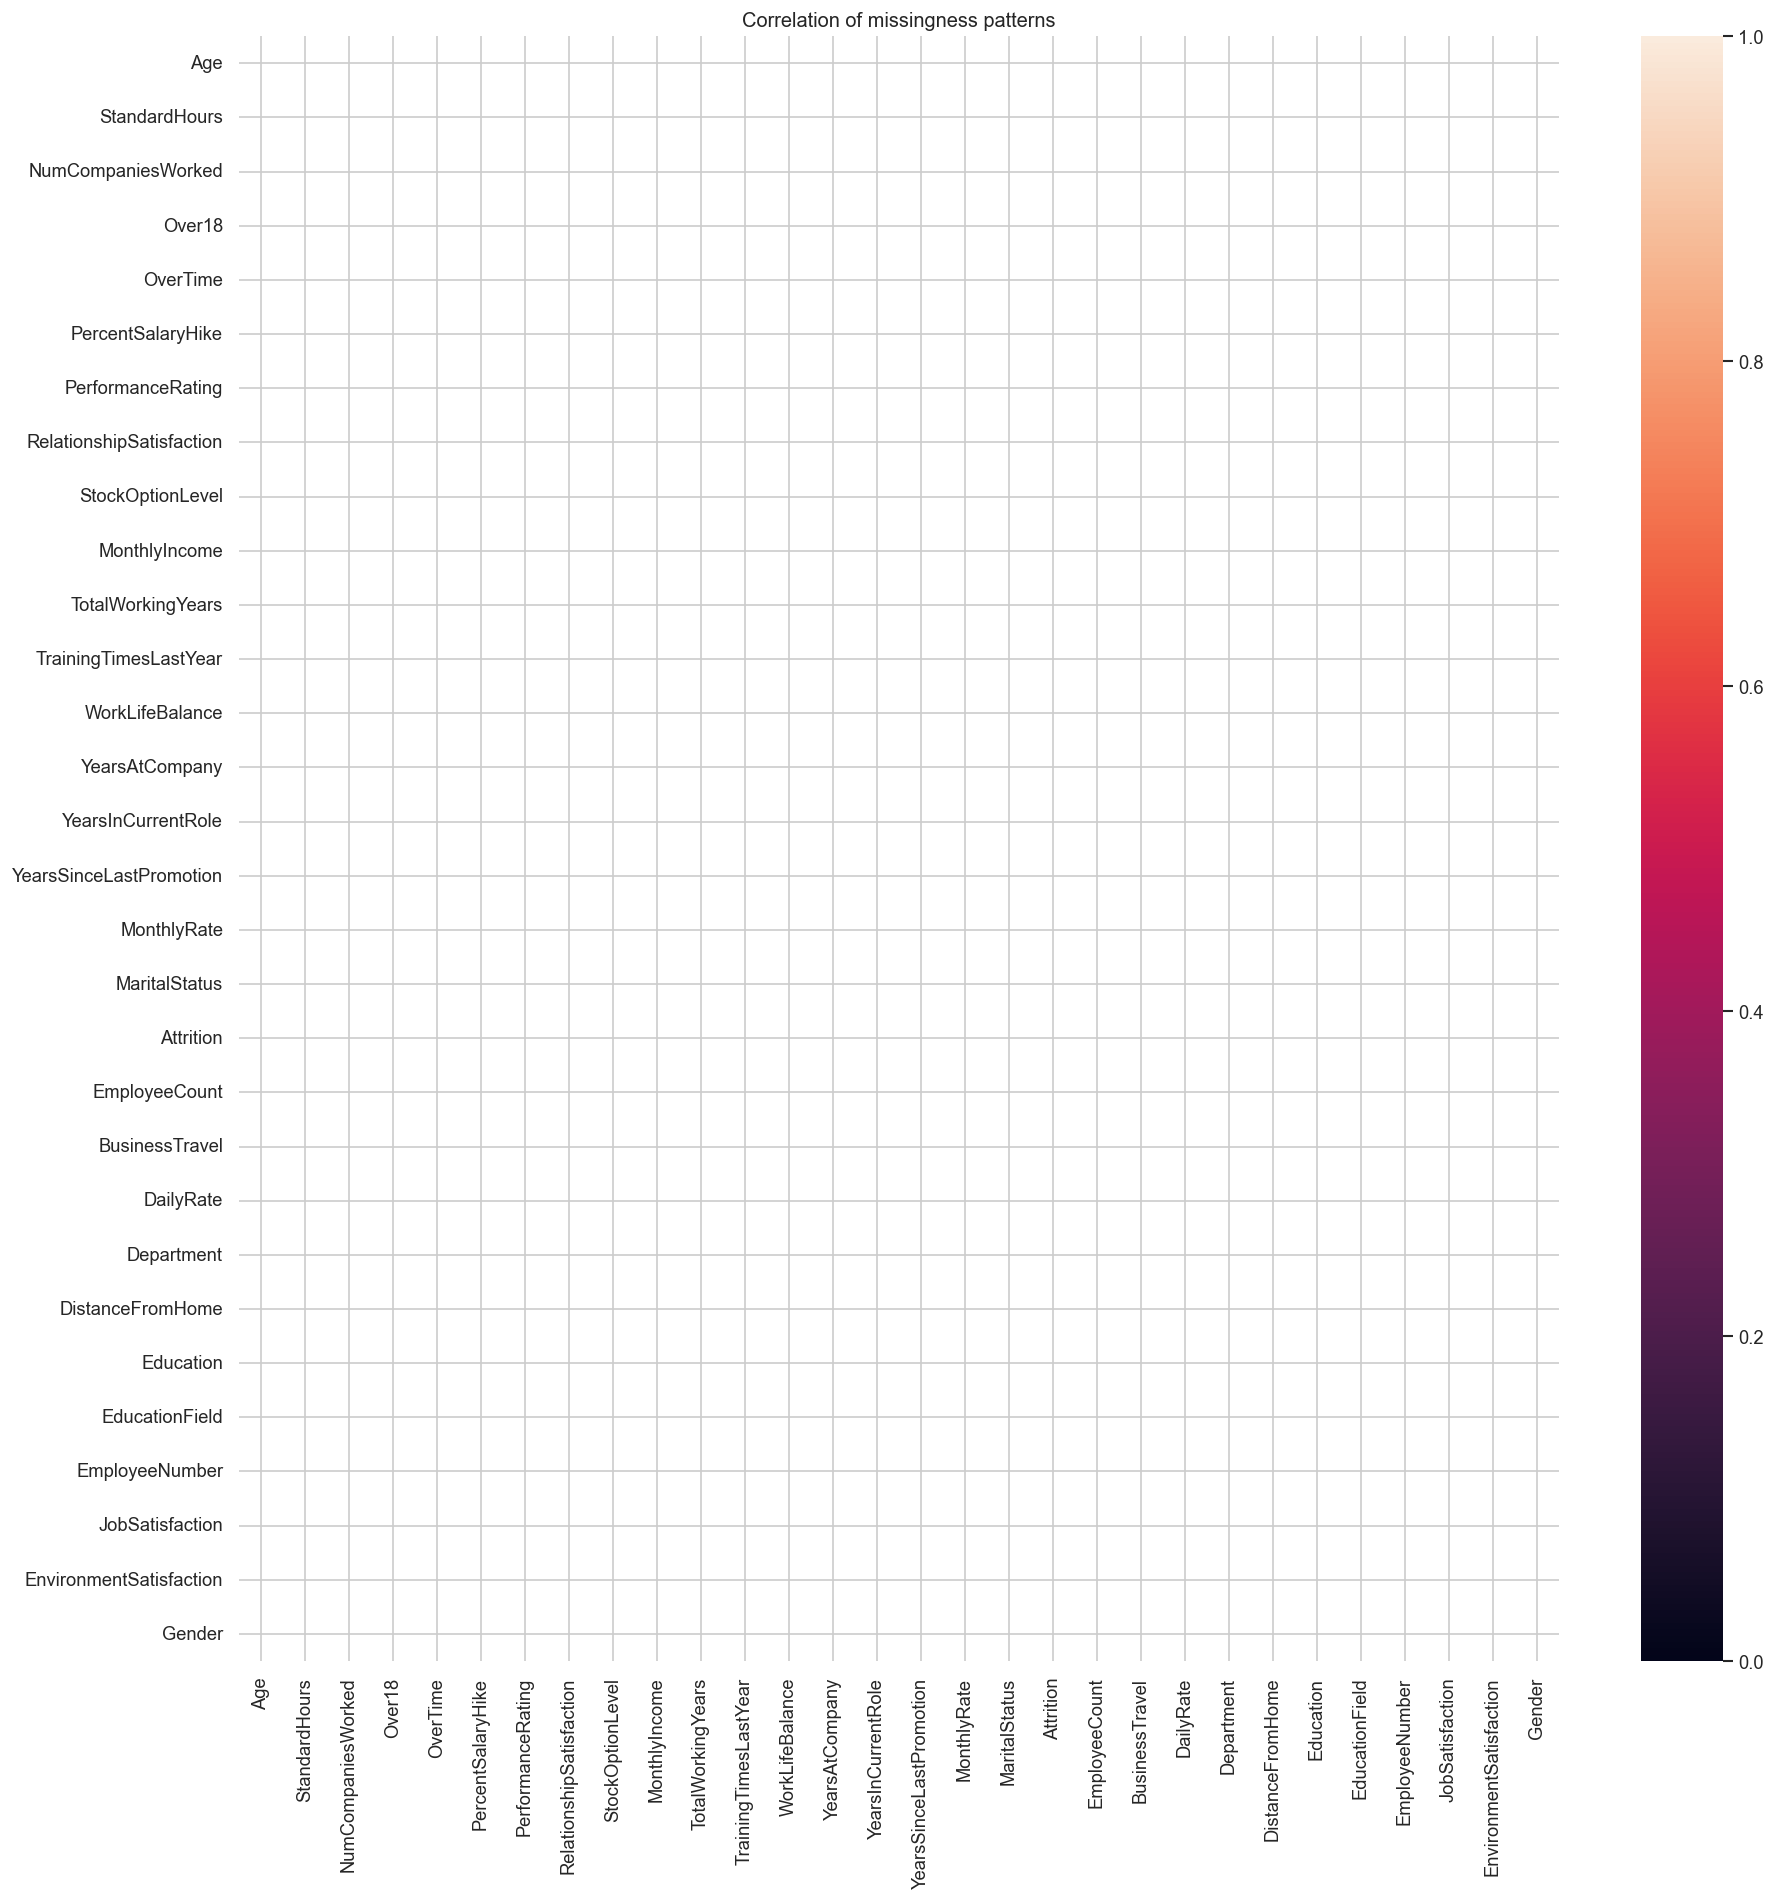

> **Interpretation:** High correlation between missingness suggests **dependent data entry** or **conditional capture** logic; consider **joint imputation** or **feature engineering** to capture 'missingness as information'.

## Bivariate EDA — focus on Attrition

### Target distribution

count    pct
Attrition              
No          1233  83.88
Yes          237  16.12

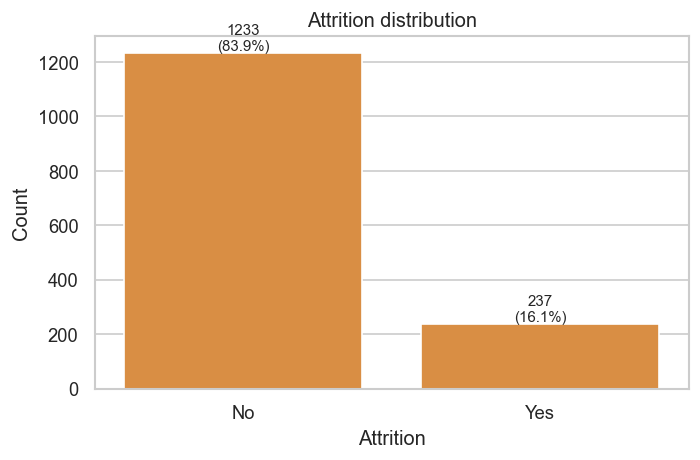

> **Why this matters:** Class **imbalance** affects model training and evaluation. If 'Yes' is rare, use **balanced metrics** (PR‑AUC, recall), **class weights**, or **resampling**.

### Attrition rate per categorical feature

**BusinessTravel** — attrition rate per category

BusinessTravel  attrition_mean  count  attrition_pct
1  Travel_Frequently        0.249097    277          24.91
2      Travel_Rarely        0.149569   1043          14.96
0         Non-Travel        0.080000    150           8.00

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


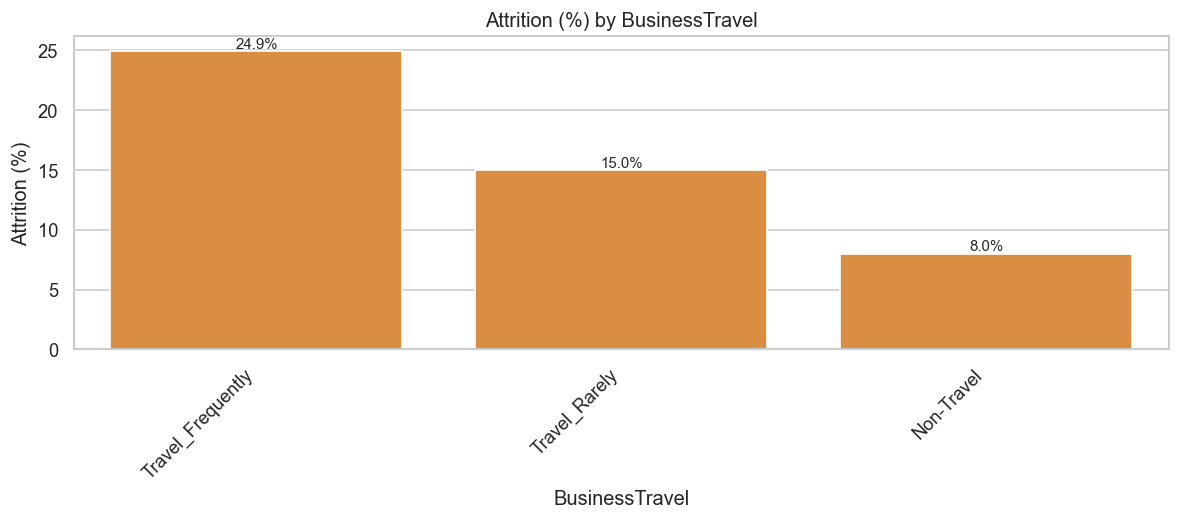

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**Department** — attrition rate per category

Department  attrition_mean  count  attrition_pct
2                   Sales        0.206278    446          20.63
0         Human Resources        0.190476     63          19.05
1  Research & Development        0.138398    961          13.84

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


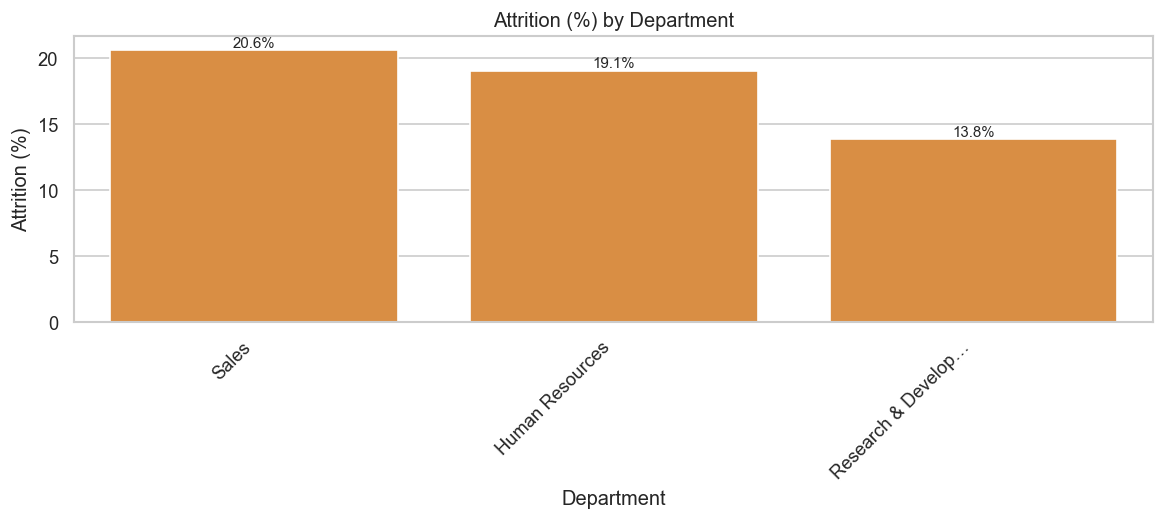

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**Education** — attrition rate per category

Education  attrition_mean  count  attrition_pct
0          1        0.182353    170          18.24
2          3        0.173077    572          17.31
1          2        0.156028    282          15.60
3          4        0.145729    398          14.57
4          5        0.104167     48          10.42

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


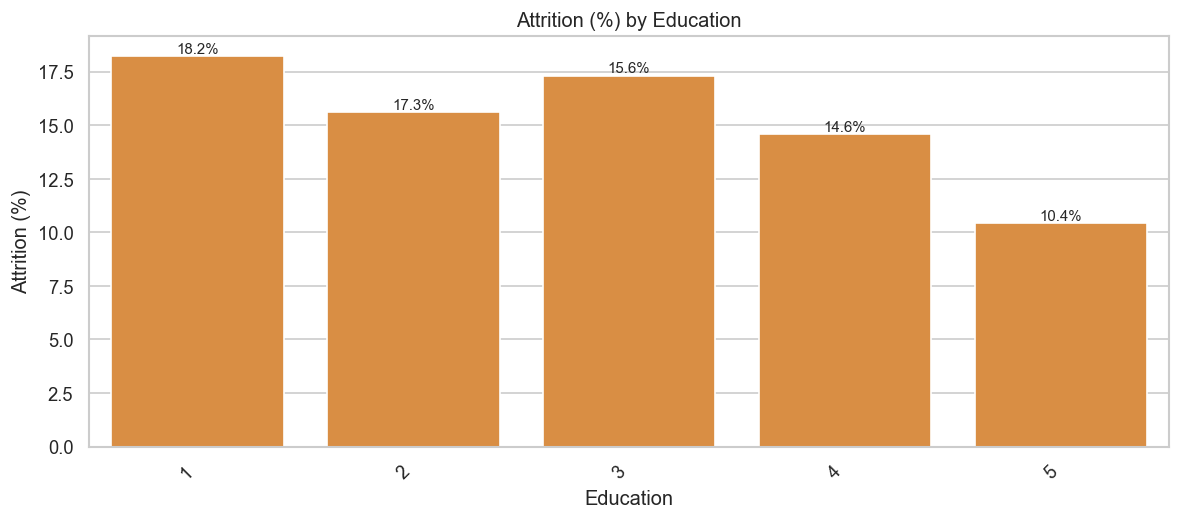

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**EducationField** — attrition rate per category

EducationField  attrition_mean  count  attrition_pct
0   Human Resources        0.259259     27          25.93
5  Technical Degree        0.242424    132          24.24
2         Marketing        0.220126    159          22.01
1     Life Sciences        0.146865    606          14.69
3           Medical        0.135776    464          13.58
4             Other        0.134146     82          13.41

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


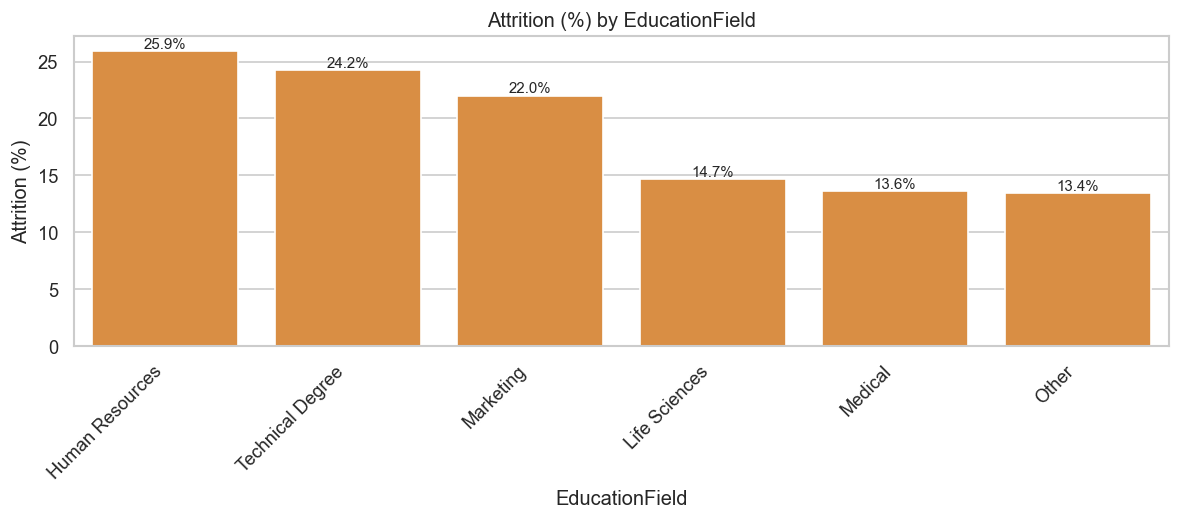

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**EmployeeCount** — attrition rate per category

EmployeeCount  attrition_mean  count  attrition_pct
0              1        0.161224   1470          16.12

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


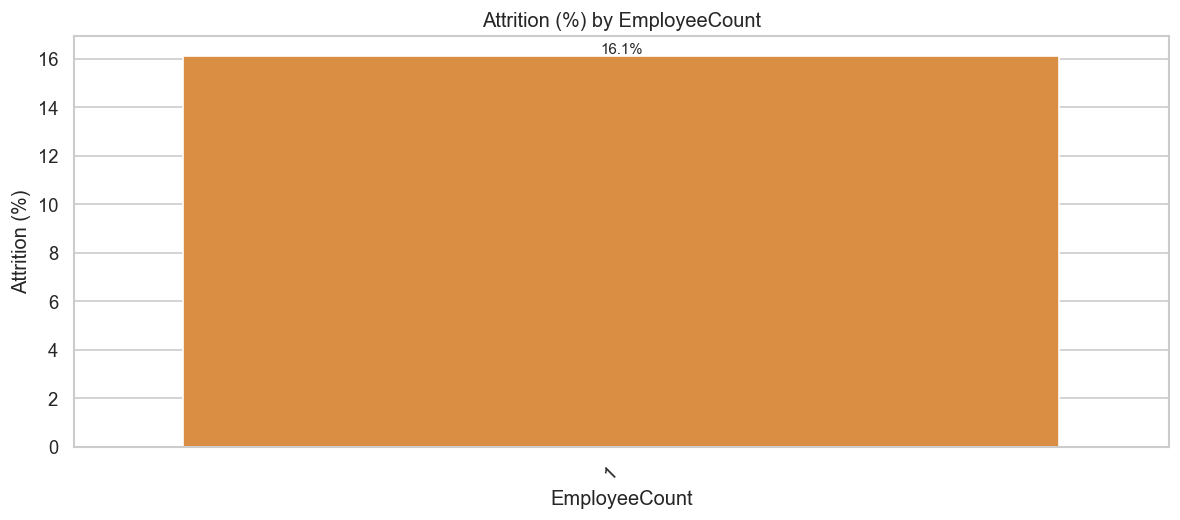

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**EnvironmentSatisfaction** — attrition rate per category

EnvironmentSatisfaction  attrition_mean  count  attrition_pct
0                        1        0.253521    284          25.35
1                        2        0.149826    287          14.98
2                        3        0.136865    453          13.69
3                        4        0.134529    446          13.45

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


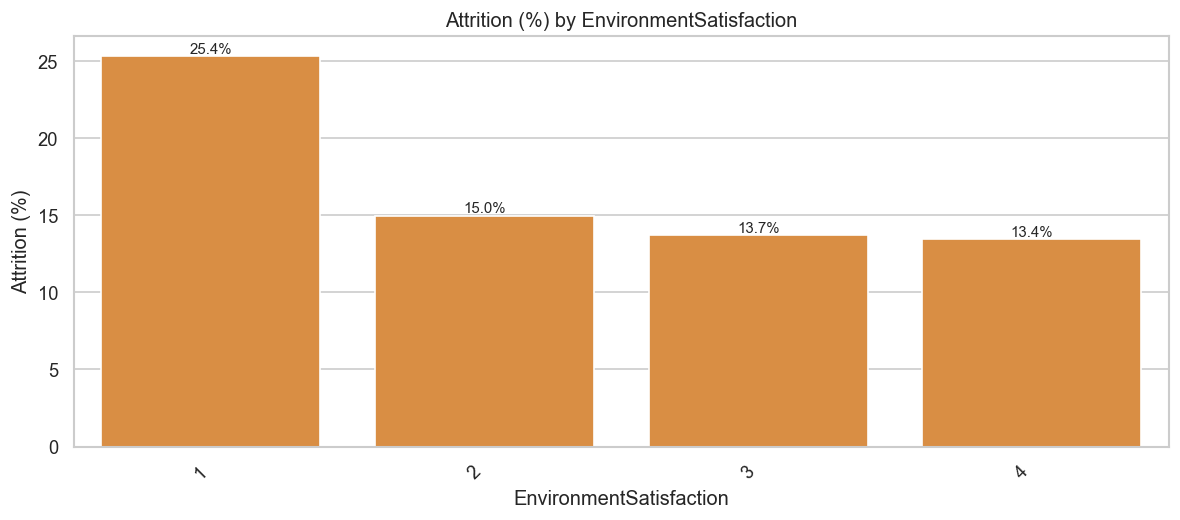

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**Gender** — attrition rate per category

Gender  attrition_mean  count  attrition_pct
1    Male        0.170068    882          17.01
0  Female        0.147959    588          14.80

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


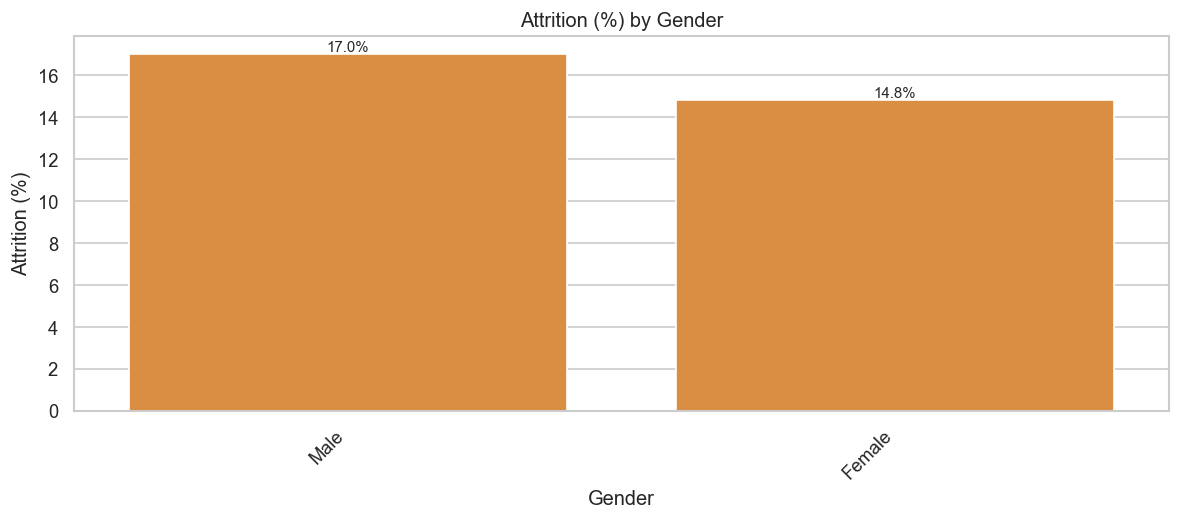

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**JobInvolvement** — attrition rate per category

JobInvolvement  attrition_mean  count  attrition_pct
0               1        0.337349     83          33.73
1               2        0.189333    375          18.93
2               3        0.144009    868          14.40
3               4        0.090278    144           9.03

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


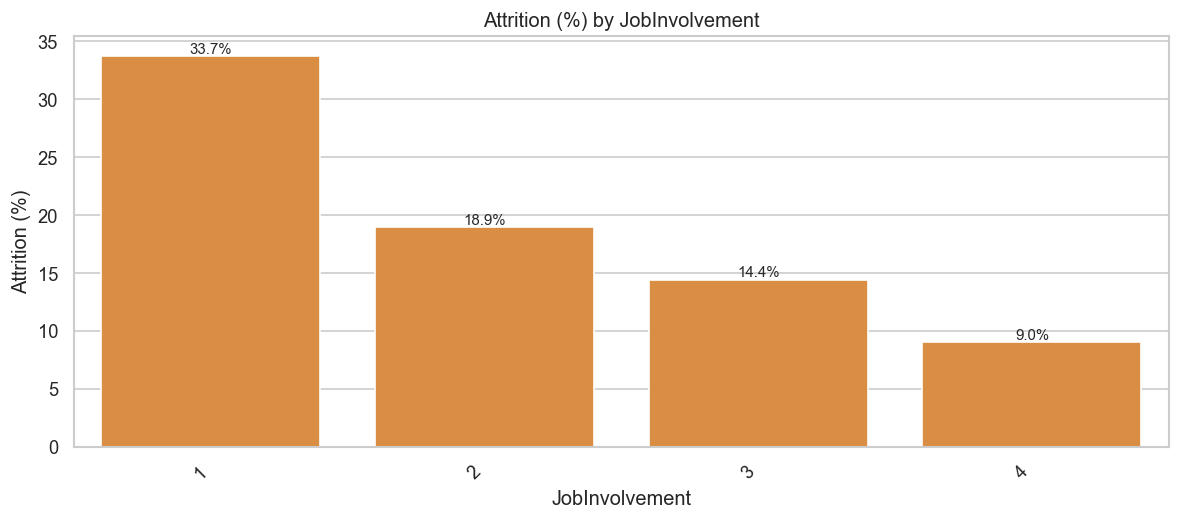

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**JobLevel** — attrition rate per category

JobLevel  attrition_mean  count  attrition_pct
0         1        0.263352    543          26.34
2         3        0.146789    218          14.68
1         2        0.097378    534           9.74
4         5        0.072464     69           7.25
3         4        0.047170    106           4.72

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


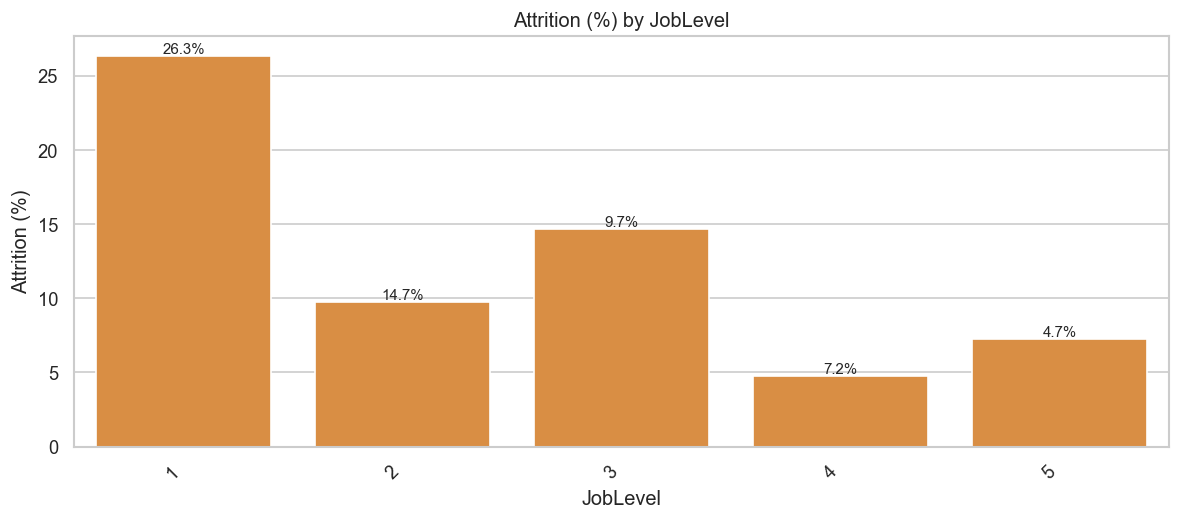

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**JobRole** — attrition rate per category

JobRole  attrition_mean  count  attrition_pct
8       Sales Representative        0.397590     83          39.76
2      Laboratory Technician        0.239382    259          23.94
1            Human Resources        0.230769     52          23.08
7            Sales Executive        0.174847    326          17.48
6         Research Scientist        0.160959    292          16.10
4     Manufacturing Director        0.068966    145           6.90
0  Healthcare Representative        0.068702    131           6.87
3                    Manager        0.049020    102           4.90
5          Research Director        0.025000     80           2.50

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


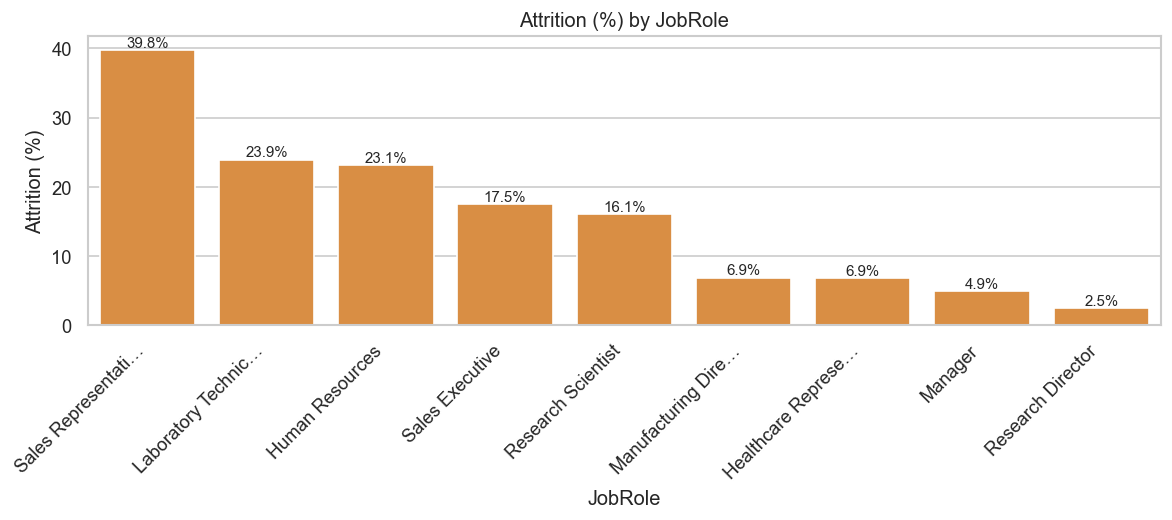

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**JobSatisfaction** — attrition rate per category

JobSatisfaction  attrition_mean  count  attrition_pct
0                1        0.228374    289          22.84
2                3        0.165158    442          16.52
1                2        0.164286    280          16.43
3                4        0.113290    459          11.33

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


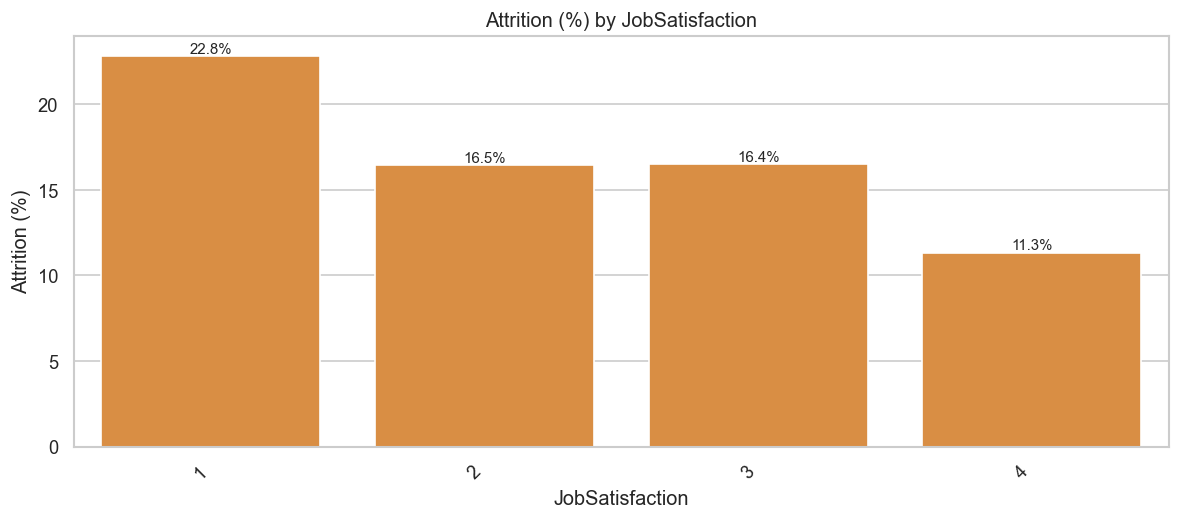

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**MaritalStatus** — attrition rate per category

MaritalStatus  attrition_mean  count  attrition_pct
2        Single        0.255319    470          25.53
1       Married        0.124814    673          12.48
0      Divorced        0.100917    327          10.09

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


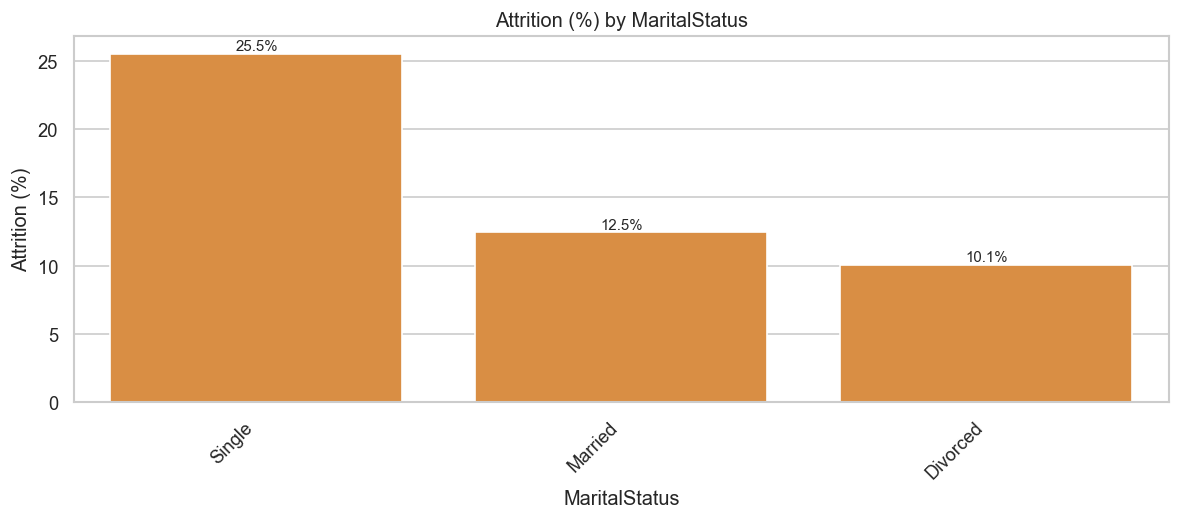

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**Over18** — attrition rate per category

Over18  attrition_mean  count  attrition_pct
0      Y        0.161224   1470          16.12

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


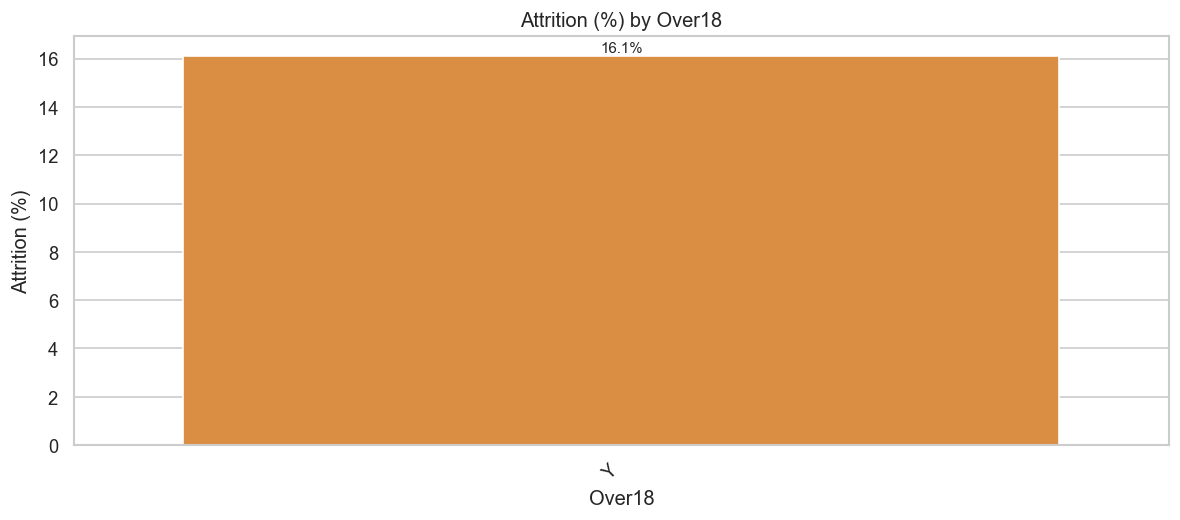

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**OverTime** — attrition rate per category

OverTime  attrition_mean  count  attrition_pct
1      Yes        0.305288    416          30.53
0       No        0.104364   1054          10.44

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


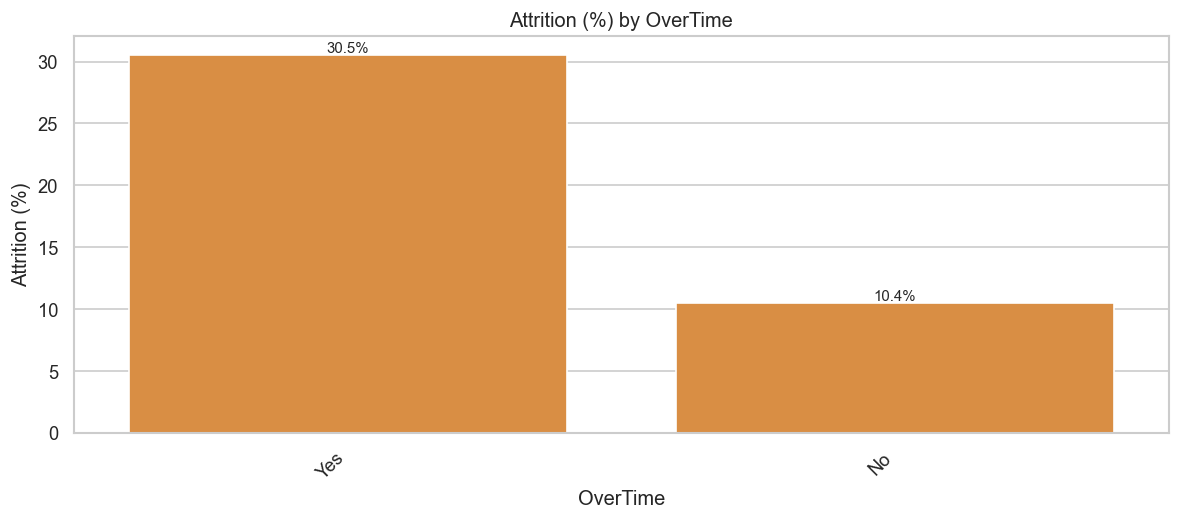

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**PerformanceRating** — attrition rate per category

PerformanceRating  attrition_mean  count  attrition_pct
1                  4        0.163717    226          16.37
0                  3        0.160772   1244          16.08

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


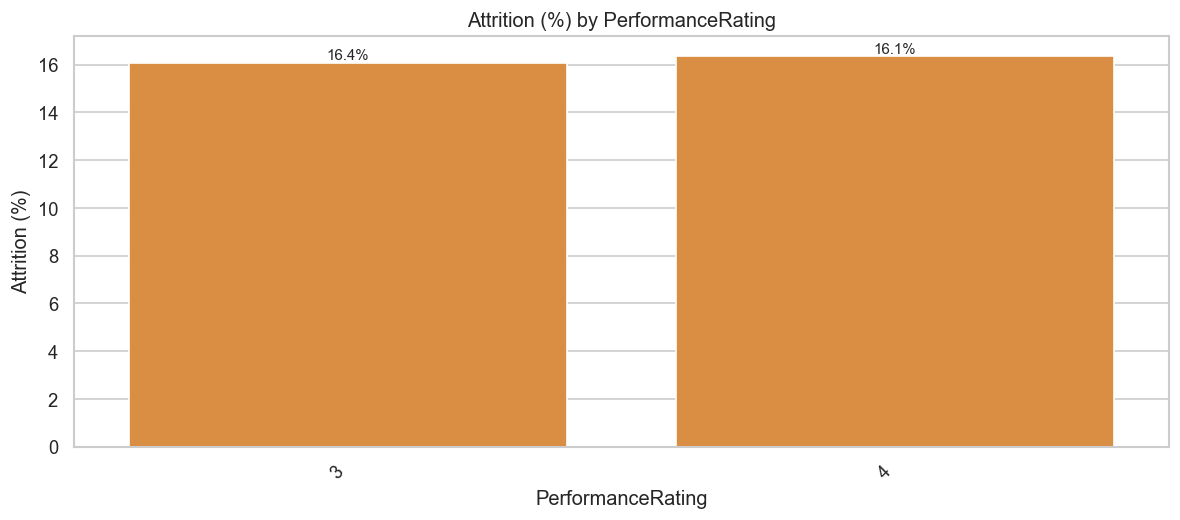

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**RelationshipSatisfaction** — attrition rate per category

RelationshipSatisfaction  attrition_mean  count  attrition_pct
0                         1        0.206522    276          20.65
2                         3        0.154684    459          15.47
1                         2        0.148515    303          14.85
3                         4        0.148148    432          14.81

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


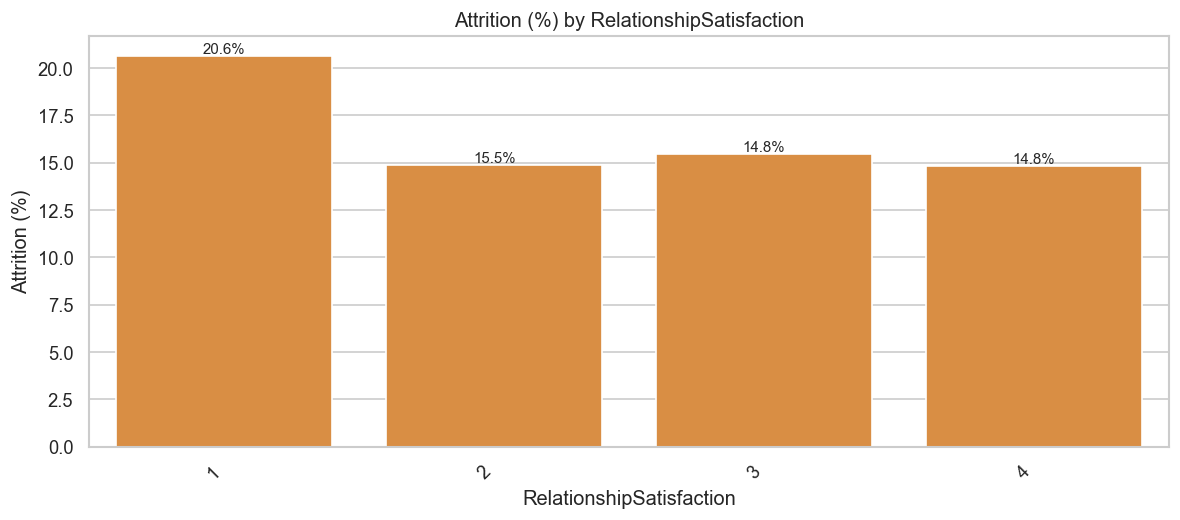

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**StandardHours** — attrition rate per category

StandardHours  attrition_mean  count  attrition_pct
0             80        0.161224   1470          16.12

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


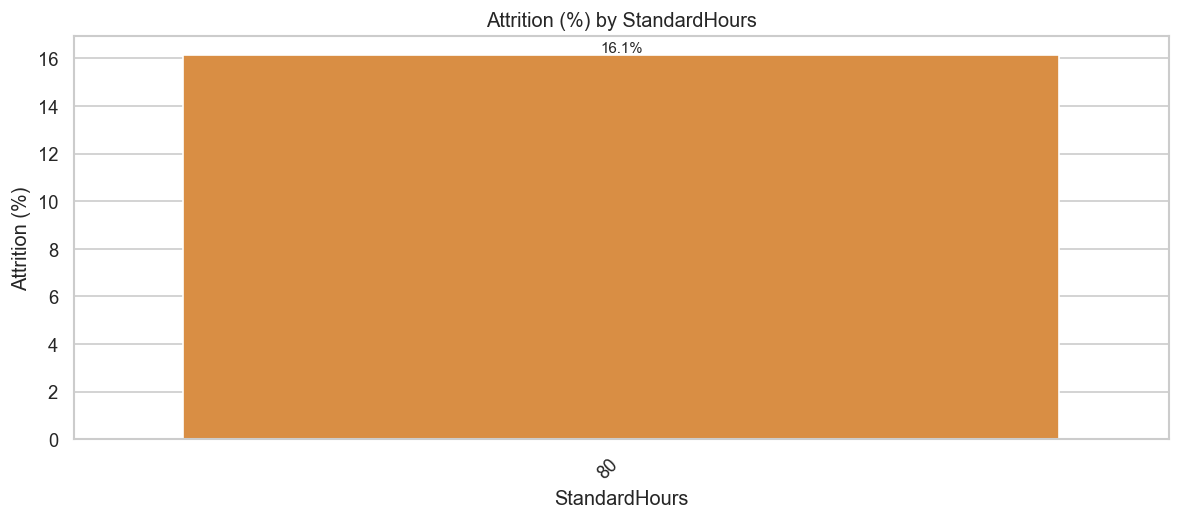

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**StockOptionLevel** — attrition rate per category

StockOptionLevel  attrition_mean  count  attrition_pct
0                 0        0.244057    631          24.41
3                 3        0.176471     85          17.65
1                 1        0.093960    596           9.40
2                 2        0.075949    158           7.59

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


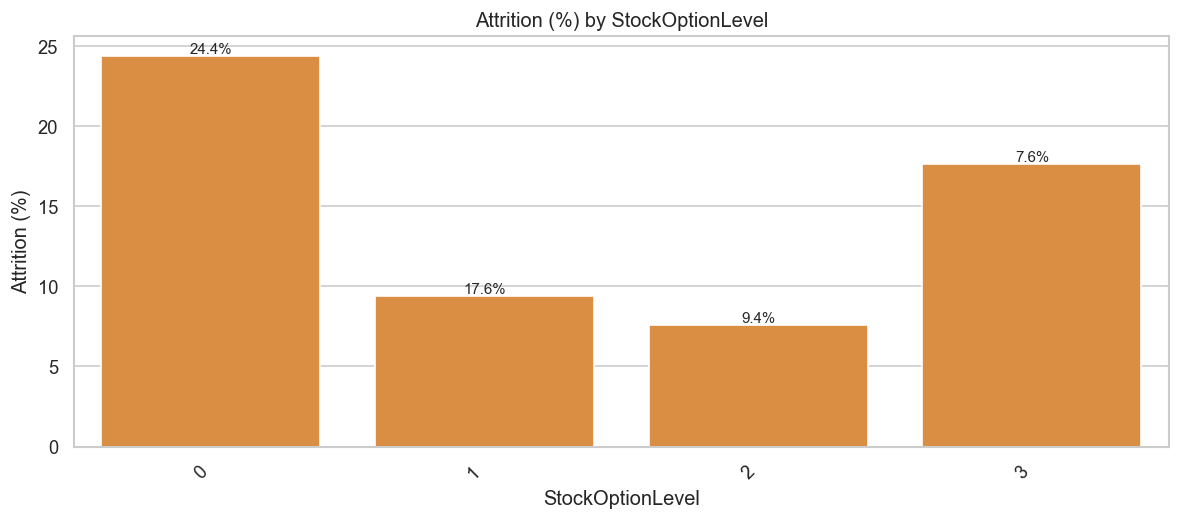

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**TrainingTimesLastYear** — attrition rate per category

TrainingTimesLastYear  attrition_mean  count  attrition_pct
0                      0        0.277778     54          27.78
4                      4        0.211382    123          21.14
2                      2        0.179159    547          17.92
3                      3        0.140530    491          14.05
1                      1        0.126761     71          12.68
5                      5        0.117647    119          11.76
6                      6        0.092308     65           9.23

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


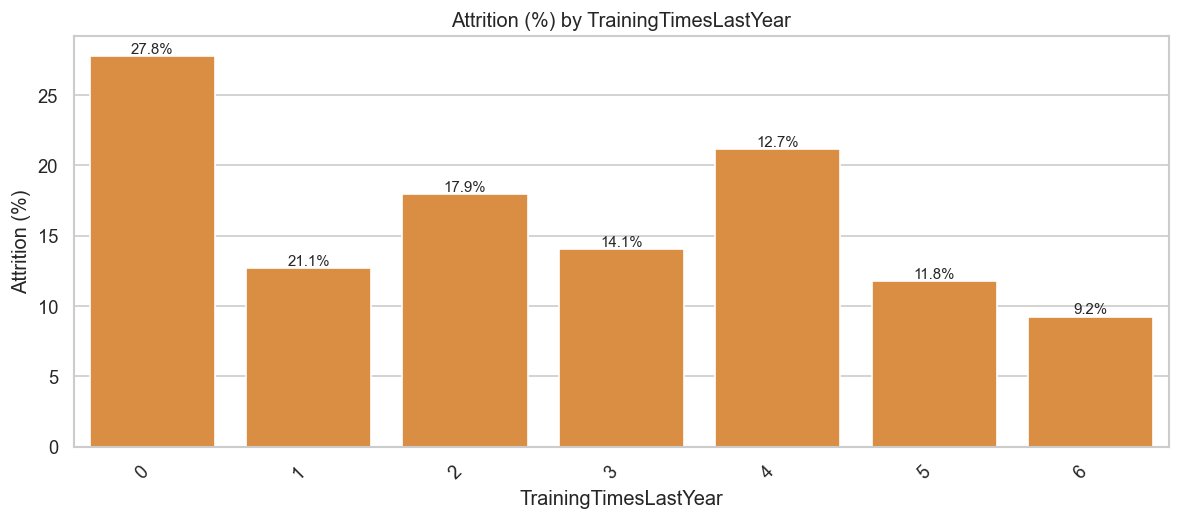

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

**WorkLifeBalance** — attrition rate per category

WorkLifeBalance  attrition_mean  count  attrition_pct
0                1        0.312500     80          31.25
3                4        0.176471    153          17.65
1                2        0.168605    344          16.86
2                3        0.142217    893          14.22

> **How to read:** `attrition_pct` is the **observed rate** within each category. 
> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:333: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')


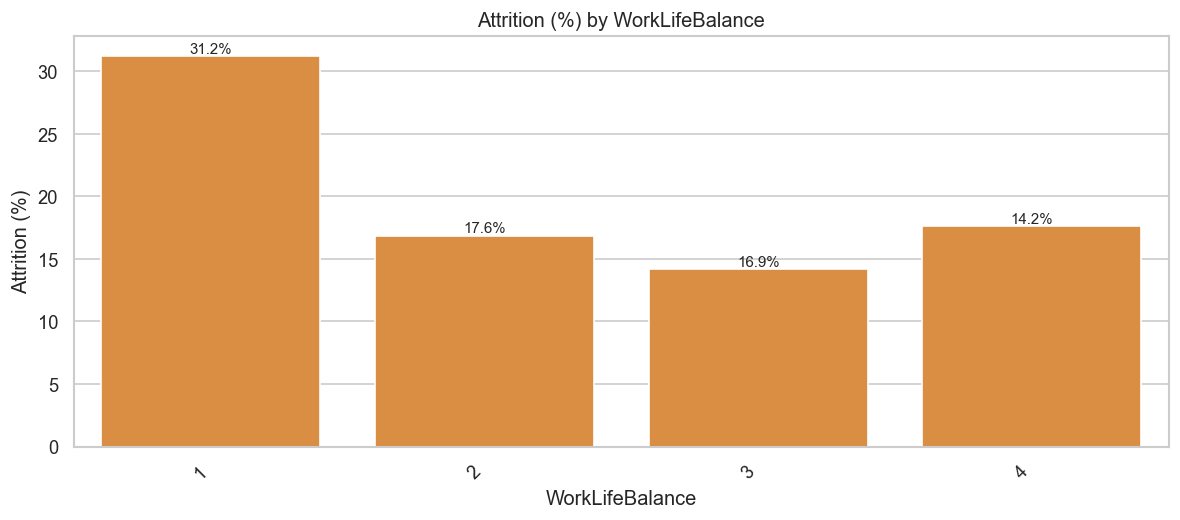

> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.

### Numeric distributions by Attrition

**Age** — summary by target class

count   mean   std   min   25%   50%   75%   max
_Attrition_bin                                                   
0.0             1233.0  37.56  8.89  18.0  31.0  36.0  43.0  60.0
1.0              237.0  33.61  9.69  18.0  28.0  32.0  39.0  58.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

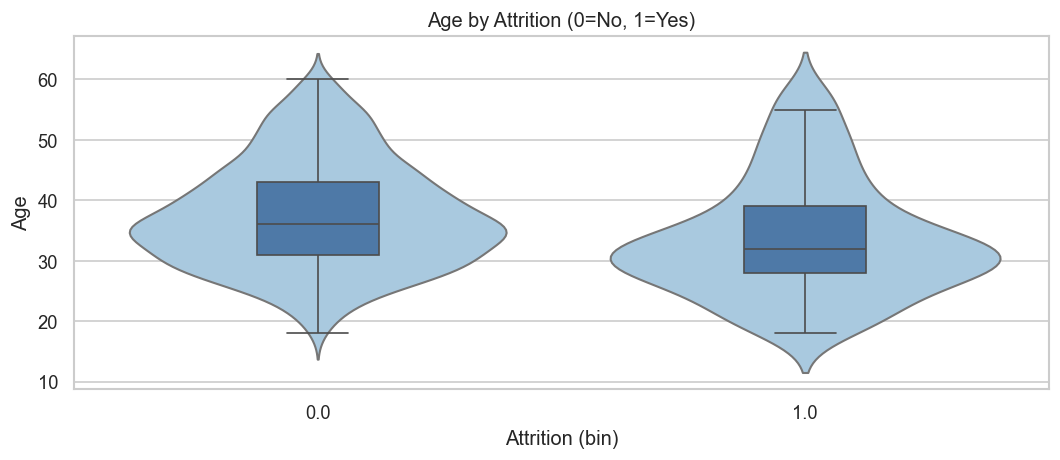

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**DailyRate** — summary by target class

count    mean     std    min    25%    50%     75%     max
_Attrition_bin                                                             
0.0             1233.0  812.50  403.21  102.0  477.0  817.0  1176.0  1499.0
1.0              237.0  750.36  401.90  103.0  408.0  699.0  1092.0  1496.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

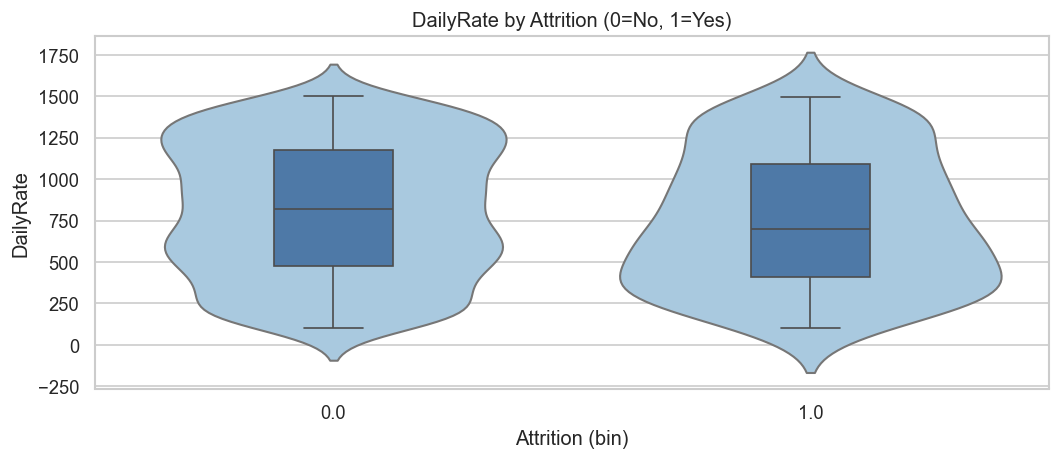

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**DistanceFromHome** — summary by target class

count   mean   std  min  25%  50%   75%   max
_Attrition_bin                                                
0.0             1233.0   8.92  8.01  1.0  2.0  7.0  13.0  29.0
1.0              237.0  10.63  8.45  1.0  3.0  9.0  17.0  29.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

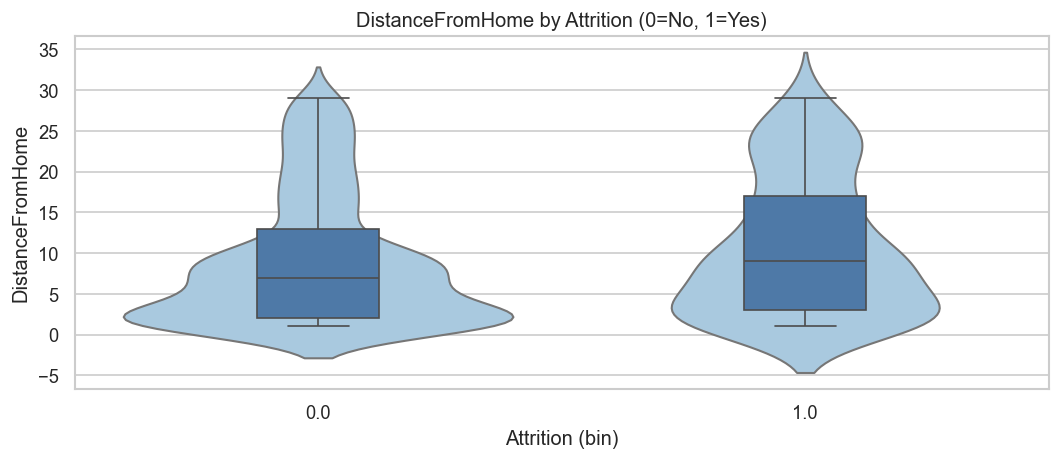

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**Education** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.93  1.03  1.0  2.0  3.0  4.0  5.0
1.0              237.0  2.84  1.01  1.0  2.0  3.0  4.0  5.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

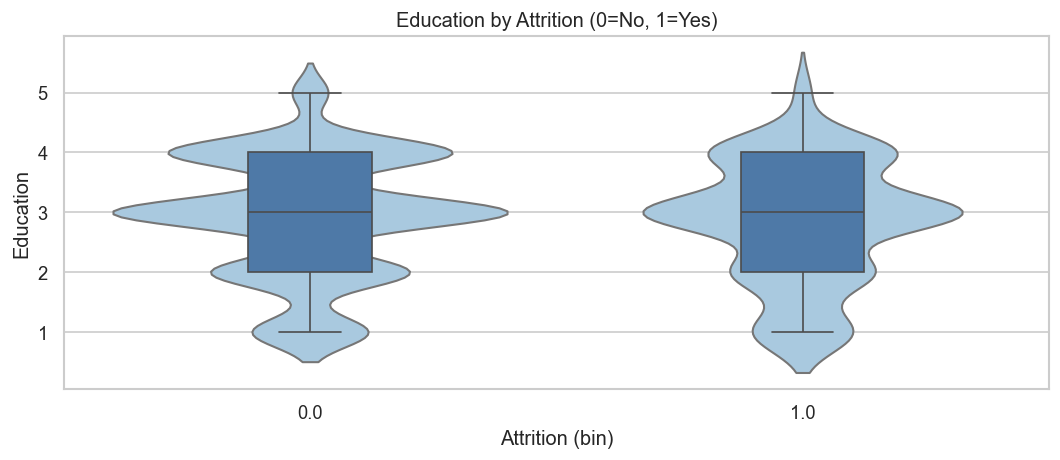

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**EmployeeNumber** — summary by target class

count     mean     std  min    25%     50%     75%     max
_Attrition_bin                                                             
0.0             1233.0  1027.66  606.22  2.0  483.0  1022.0  1574.0  2068.0
1.0              237.0  1010.35  580.75  1.0  514.0  1017.0  1486.0  2055.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

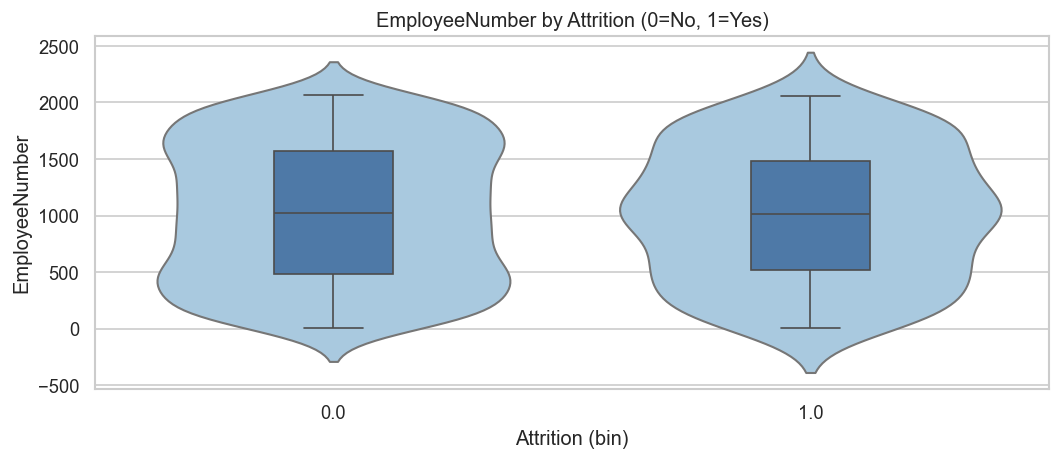

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**EnvironmentSatisfaction** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.77  1.07  1.0  2.0  3.0  4.0  4.0
1.0              237.0  2.46  1.17  1.0  1.0  3.0  4.0  4.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

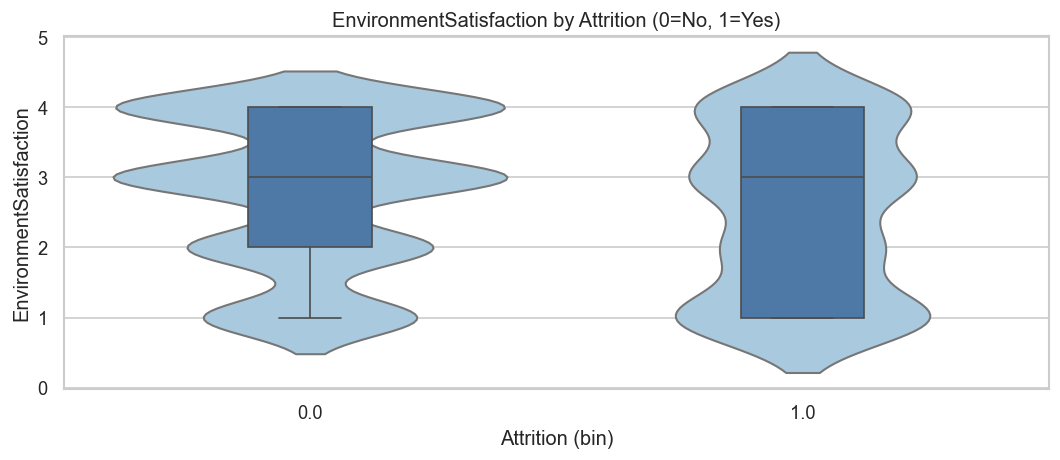

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**HourlyRate** — summary by target class

count   mean    std   min   25%   50%   75%    max
_Attrition_bin                                                     
0.0             1233.0  65.95  20.38  30.0  48.0  66.0  83.0  100.0
1.0              237.0  65.57  20.10  31.0  50.0  66.0  84.0  100.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

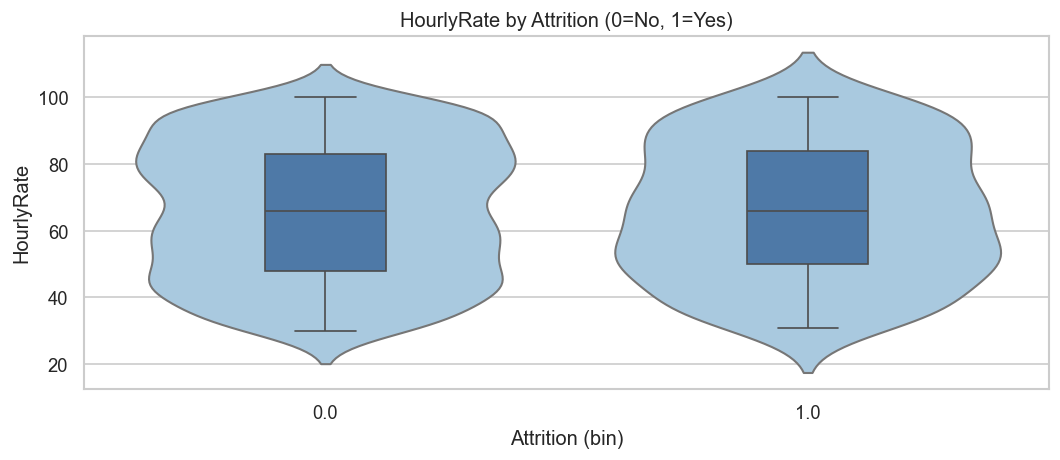

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**JobInvolvement** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.77  0.69  1.0  2.0  3.0  3.0  4.0
1.0              237.0  2.52  0.77  1.0  2.0  3.0  3.0  4.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

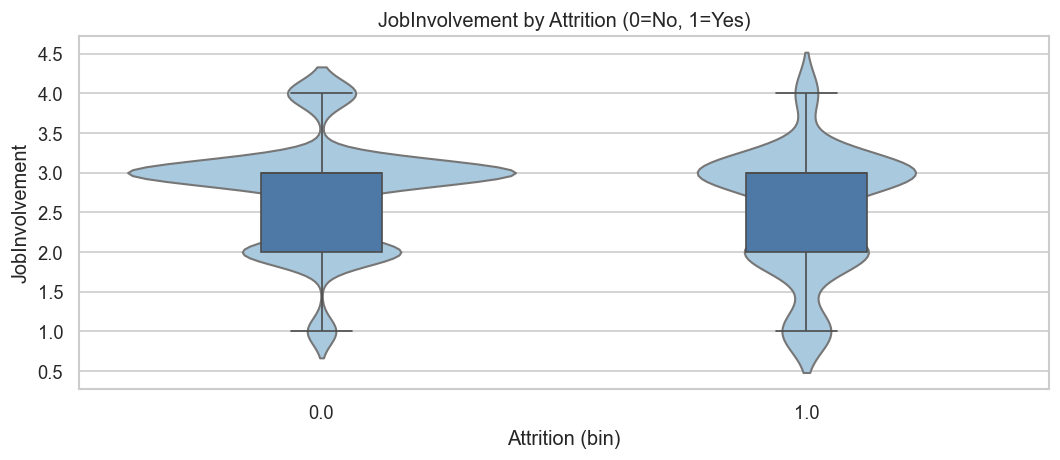

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**JobLevel** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.15  1.12  1.0  1.0  2.0  3.0  5.0
1.0              237.0  1.64  0.94  1.0  1.0  1.0  2.0  5.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

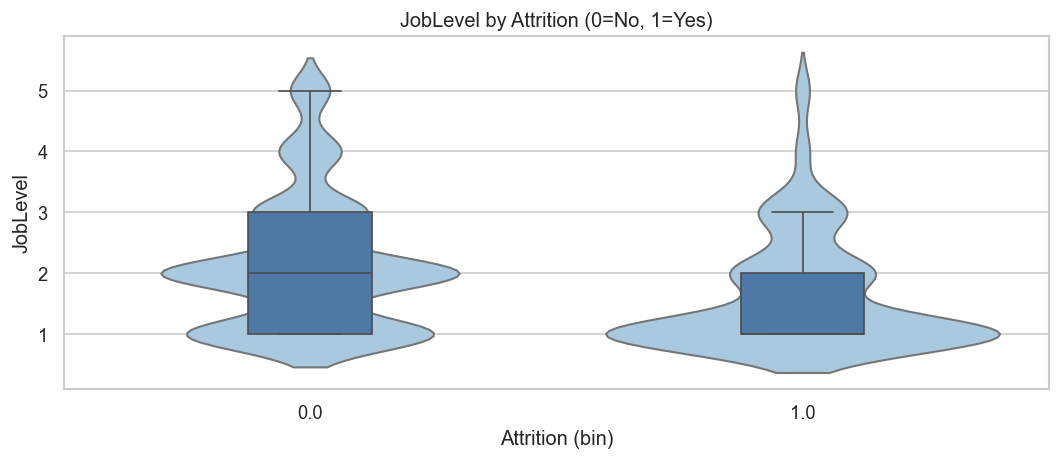

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**JobSatisfaction** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.78  1.09  1.0  2.0  3.0  4.0  4.0
1.0              237.0  2.47  1.12  1.0  1.0  3.0  3.0  4.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

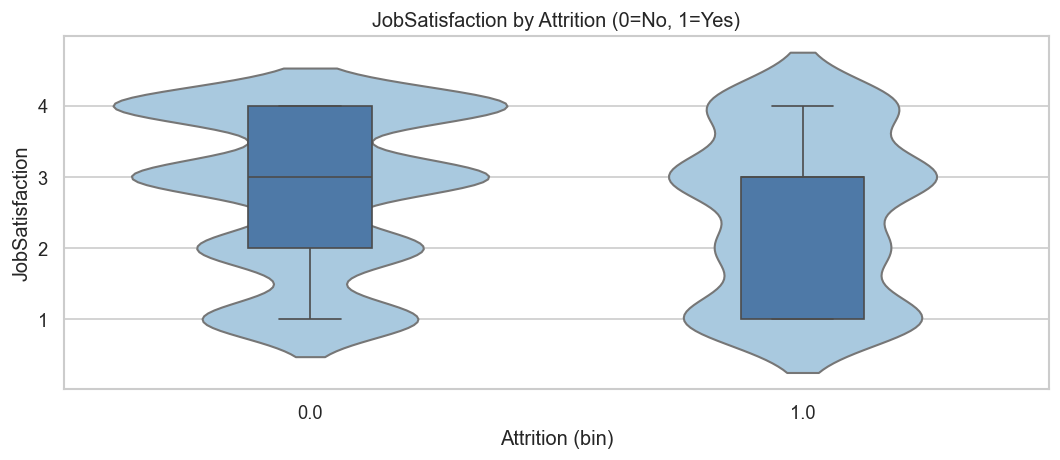

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**MonthlyIncome** — summary by target class

count     mean      std     min     25%     50%     75%  \
_Attrition_bin                                                             
0.0             1233.0  6832.74  4818.21  1051.0  3211.0  5204.0  8834.0   
1.0              237.0  4787.09  3640.21  1009.0  2373.0  3202.0  5916.0   

                    max  
_Attrition_bin           
0.0             19999.0  
1.0             19859.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

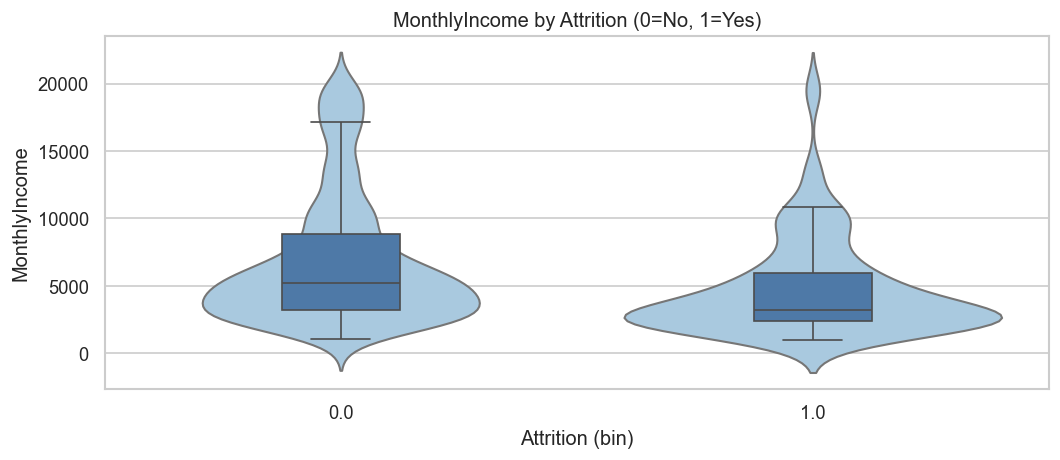

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**MonthlyRate** — summary by target class

count      mean      std     min     25%      50%      75%  \
_Attrition_bin                                                                
0.0             1233.0  14265.78  7102.26  2094.0  7973.0  14120.0  20364.0   
1.0              237.0  14559.31  7208.15  2326.0  8870.0  14618.0  21081.0   

                    max  
_Attrition_bin           
0.0             26997.0  
1.0             26999.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

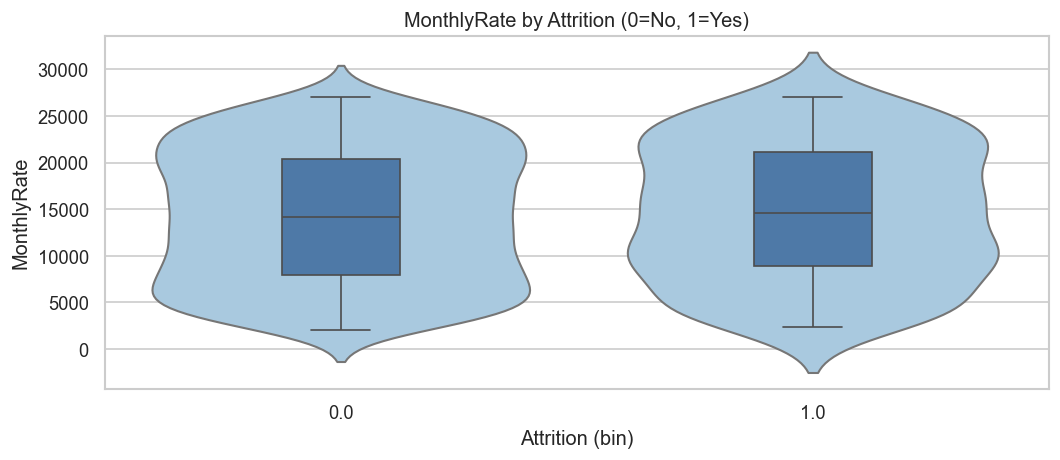

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**NumCompaniesWorked** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.65  2.46  0.0  1.0  2.0  4.0  9.0
1.0              237.0  2.94  2.68  0.0  1.0  1.0  5.0  9.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

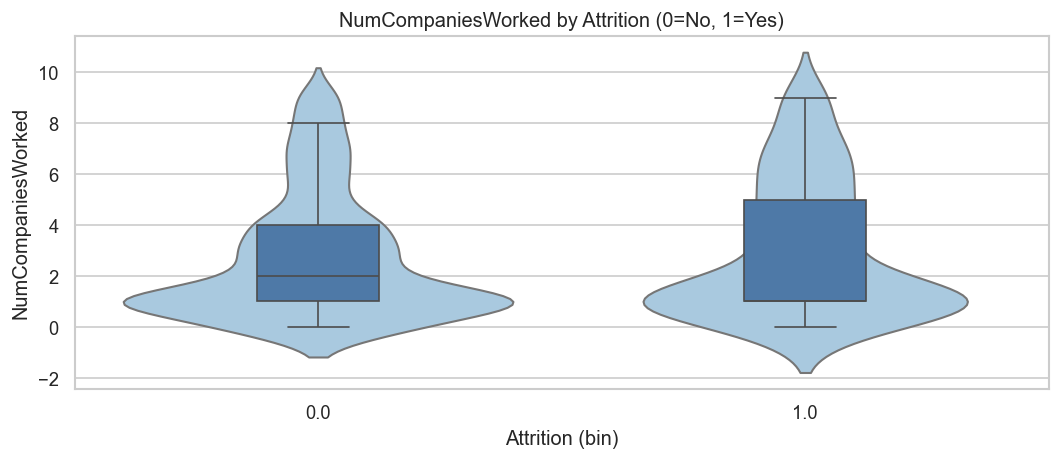

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**PercentSalaryHike** — summary by target class

count   mean   std   min   25%   50%   75%   max
_Attrition_bin                                                   
0.0             1233.0  15.23  3.64  11.0  12.0  14.0  18.0  25.0
1.0              237.0  15.10  3.77  11.0  12.0  14.0  17.0  25.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

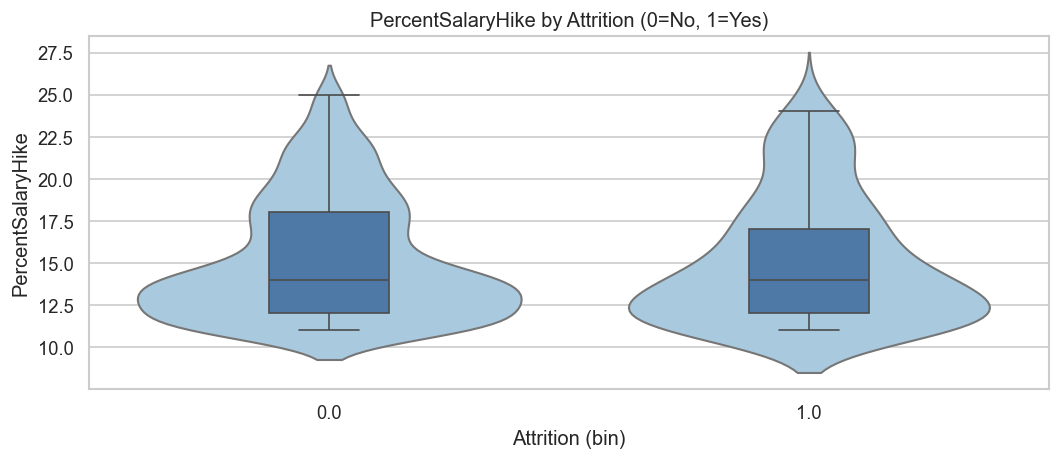

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**PerformanceRating** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  3.15  0.36  3.0  3.0  3.0  3.0  4.0
1.0              237.0  3.16  0.36  3.0  3.0  3.0  3.0  4.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

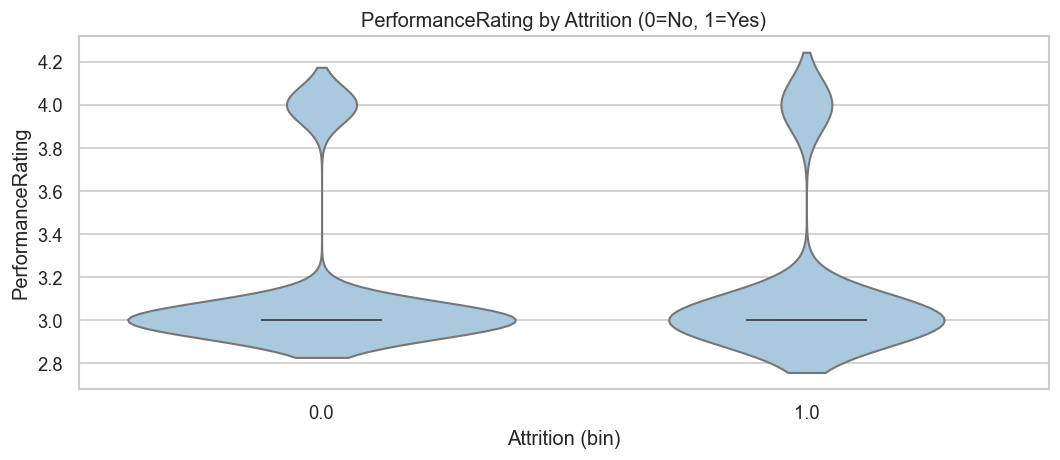

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**RelationshipSatisfaction** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.73  1.07  1.0  2.0  3.0  4.0  4.0
1.0              237.0  2.60  1.13  1.0  2.0  3.0  4.0  4.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

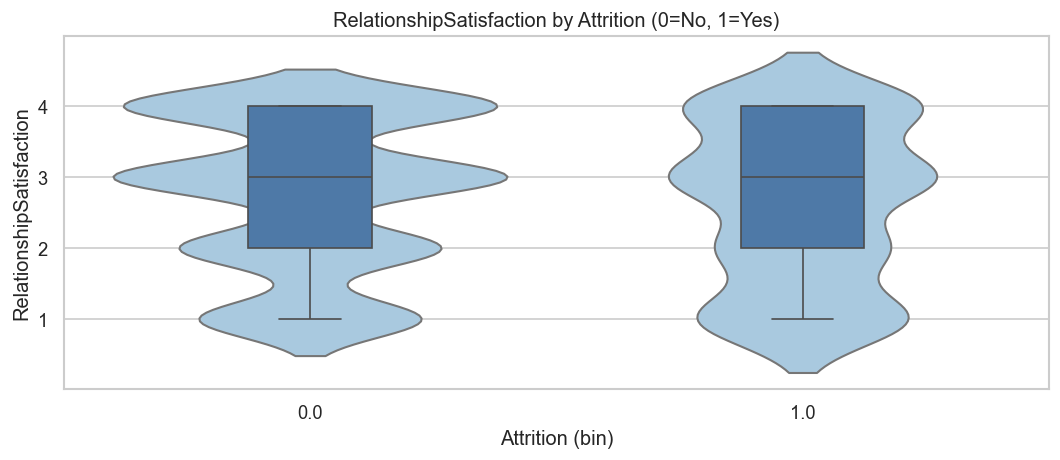

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**StockOptionLevel** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  0.85  0.84  0.0  0.0  1.0  1.0  3.0
1.0              237.0  0.53  0.86  0.0  0.0  0.0  1.0  3.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

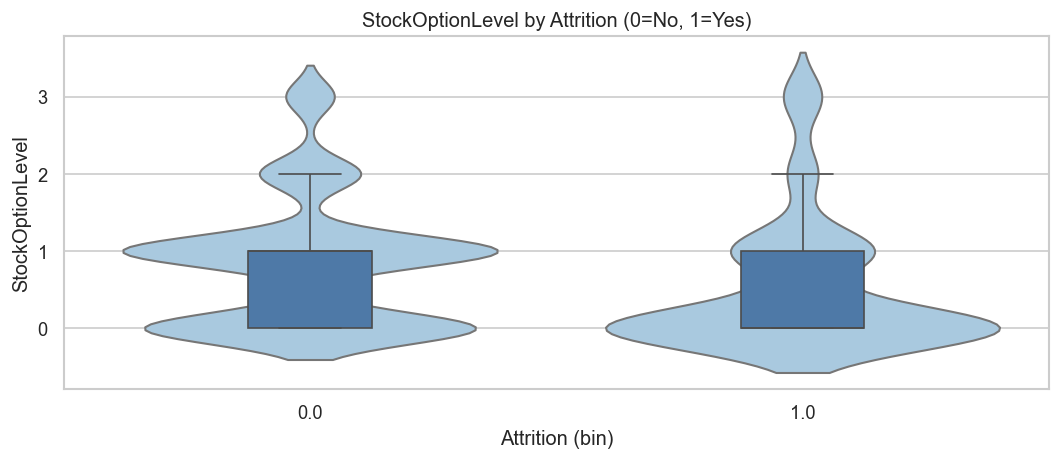

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**TotalWorkingYears** — summary by target class

count   mean   std  min  25%   50%   75%   max
_Attrition_bin                                                 
0.0             1233.0  11.86  7.76  0.0  6.0  10.0  16.0  38.0
1.0              237.0   8.24  7.17  0.0  3.0   7.0  10.0  40.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

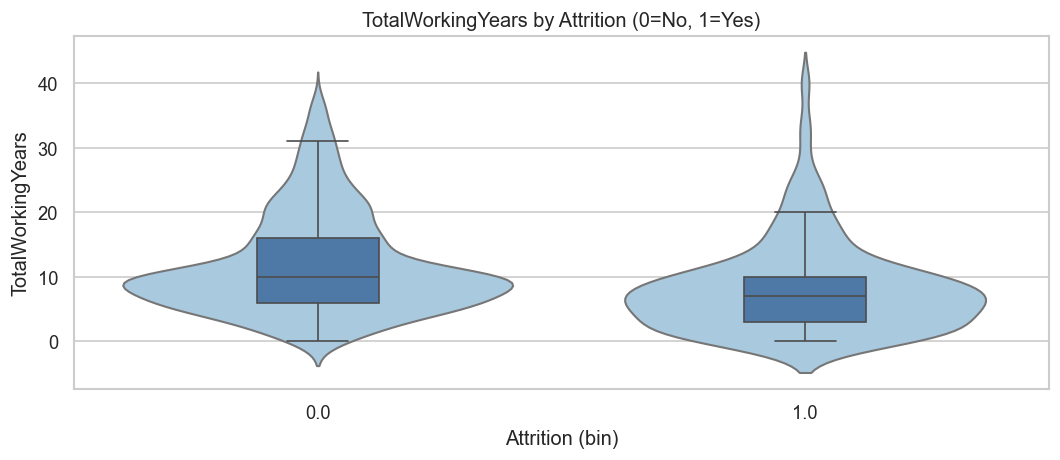

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**TrainingTimesLastYear** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.83  1.29  0.0  2.0  3.0  3.0  6.0
1.0              237.0  2.62  1.25  0.0  2.0  2.0  3.0  6.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

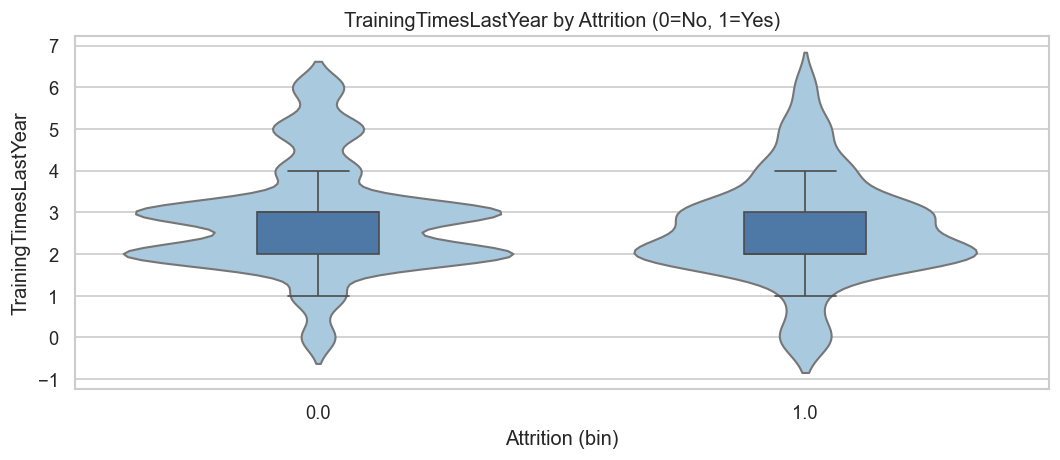

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**WorkLifeBalance** — summary by target class

count  mean   std  min  25%  50%  75%  max
_Attrition_bin                                             
0.0             1233.0  2.78  0.68  1.0  2.0  3.0  3.0  4.0
1.0              237.0  2.66  0.82  1.0  2.0  3.0  3.0  4.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

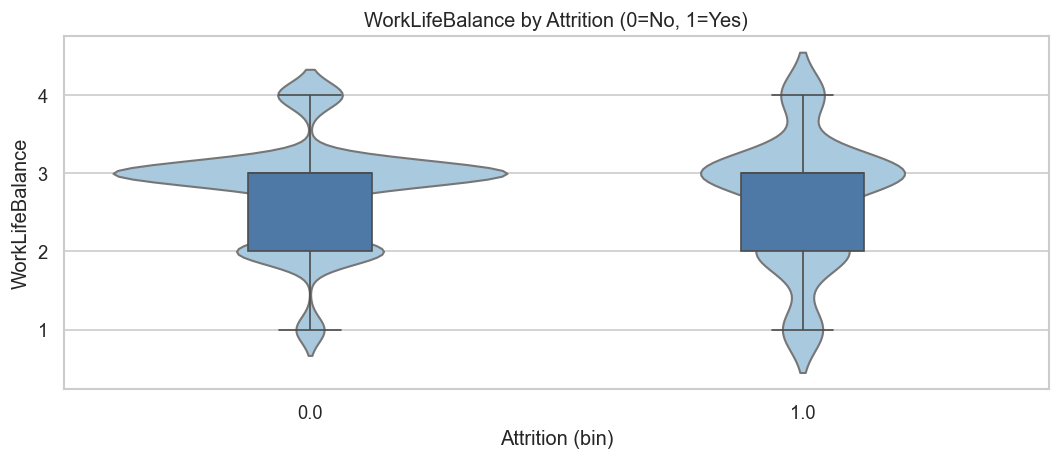

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**YearsAtCompany** — summary by target class

count  mean   std  min  25%  50%   75%   max
_Attrition_bin                                               
0.0             1233.0  7.37  6.10  0.0  3.0  6.0  10.0  37.0
1.0              237.0  5.13  5.95  0.0  1.0  3.0   7.0  40.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

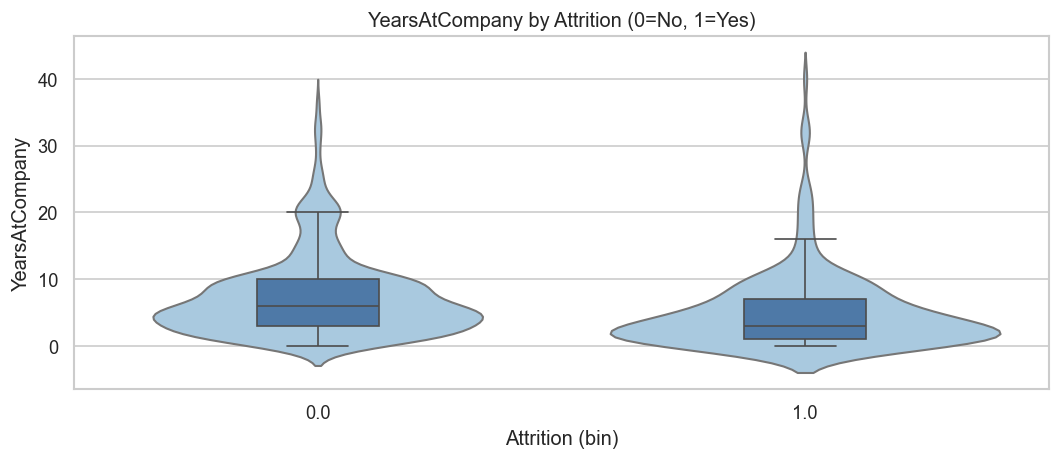

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**YearsInCurrentRole** — summary by target class

count  mean   std  min  25%  50%  75%   max
_Attrition_bin                                              
0.0             1233.0  4.48  3.65  0.0  2.0  3.0  7.0  18.0
1.0              237.0  2.90  3.17  0.0  0.0  2.0  4.0  15.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

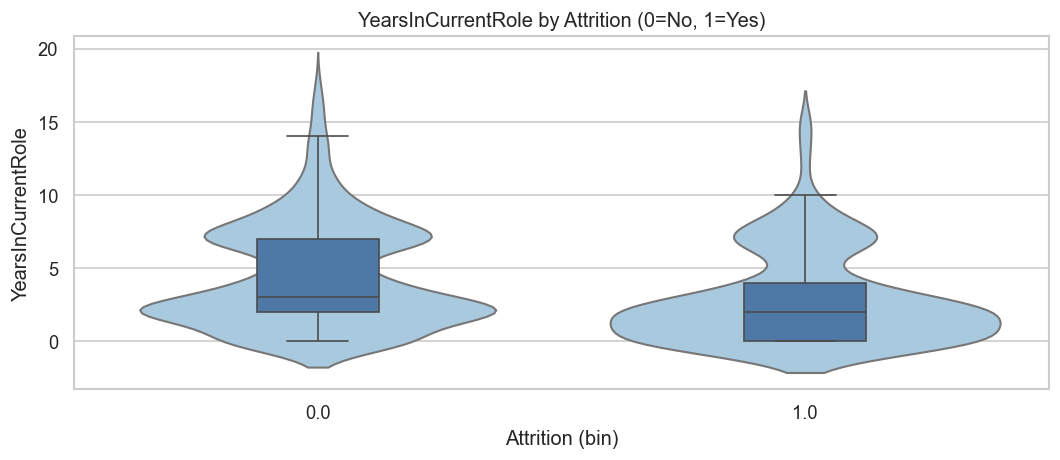

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**YearsSinceLastPromotion** — summary by target class

count  mean   std  min  25%  50%  75%   max
_Attrition_bin                                              
0.0             1233.0  2.23  3.23  0.0  0.0  1.0  3.0  15.0
1.0              237.0  1.95  3.15  0.0  0.0  1.0  2.0  15.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

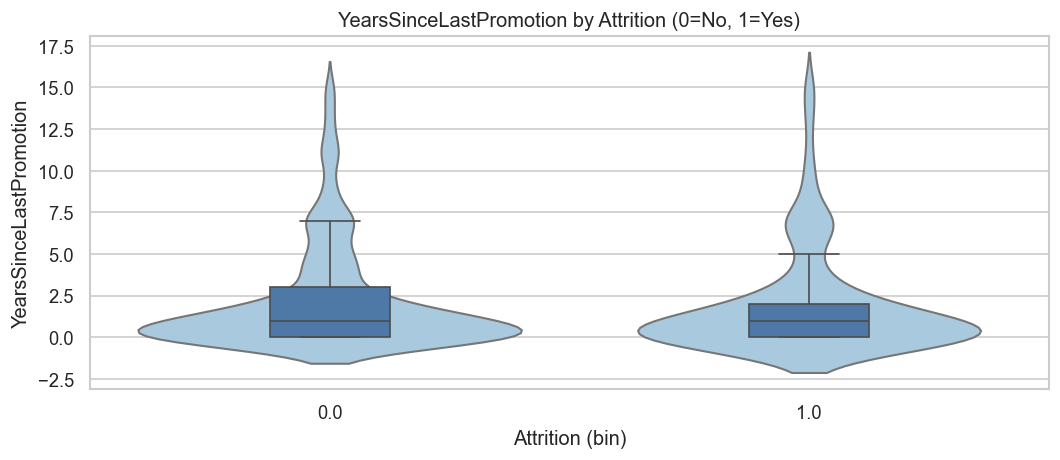

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

**YearsWithCurrManager** — summary by target class

count  mean   std  min  25%  50%  75%   max
_Attrition_bin                                              
0.0             1233.0  4.37  3.59  0.0  2.0  3.0  7.0  17.0
1.0              237.0  2.85  3.14  0.0  0.0  2.0  5.0  14.0

> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.

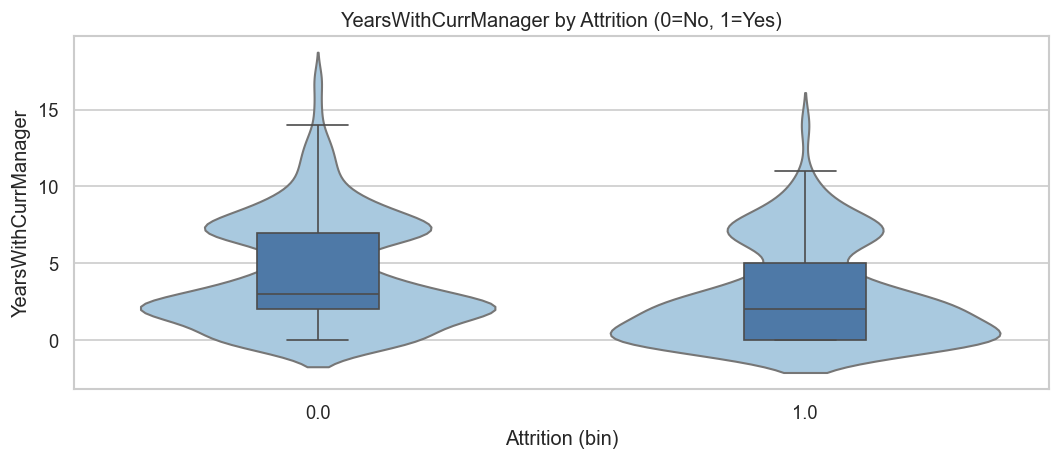

> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.

## Multivariate EDA

### Pearson correlation matrix (numeric)

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000      0.011            -0.002      0.208   
DailyRate                 0.011      1.000            -0.005     -0.017   
DistanceFromHome         -0.002     -0.005             1.000      0.021   
Education                 0.208     -0.017             0.021      1.000   
EmployeeCount               NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010     -0.051             0.033      0.042   
EnvironmentSatisfaction   0.010      0.018            -0.016     -0.027   
HourlyRate                0.024      0.023             0.031      0.017   
JobInvolvement            0.030      0.046             0.009      0.042   
JobLevel                  0.510      0.003             0.005      0.102   
JobSatisfaction          -0.005      0.031            -0.004     -0.011   
MonthlyIncome             0.498      0.008            -0.017      0.095   
MonthlyRate               0.028     -0.032             0.027     -0.026   
NumCompaniesWorked        0.300      0.038            -0.029      0.126   
PercentSalaryHike         0.004      0.023             0.040     -0.011   
PerformanceRating         0.002      0.000             0.027     -0.025   
RelationshipSatisfaction  0.054      0.008             0.007     -0.009   
StandardHours               NaN        NaN               NaN        NaN   
StockOptionLevel          0.038      0.042             0.045      0.018   
TotalWorkingYears         0.680      0.015             0.005      0.148   
TrainingTimesLastYear    -0.020      0.002            -0.037     -0.025   
WorkLifeBalance          -0.021     -0.038            -0.027      0.010   
YearsAtCompany            0.311     -0.034             0.010      0.069   
YearsInCurrentRole        0.213      0.010             0.019      0.060   
YearsSinceLastPromotion   0.217     -0.033             0.010      0.054   
YearsWithCurrManager      0.202     -0.026             0.014      0.069   
_Attrition_bin           -0.159     -0.057             0.078     -0.031   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN          -0.010   
DailyRate                           NaN          -0.051   
DistanceFromHome                    NaN           0.033   
Education                           NaN           0.042   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN           1.000   
EnvironmentSatisfaction             NaN           0.018   
HourlyRate                          NaN           0.035   
JobInvolvement                      NaN          -0.007   
JobLevel                            NaN          -0.019   
JobSatisfaction                     NaN          -0.046   
MonthlyIncome                       NaN          -0.015   
MonthlyRate                         NaN           0.013   
NumCompaniesWorked                  NaN          -0.001   
PercentSalaryHike                   NaN          -0.013   
PerformanceRating                   NaN          -0.020   
RelationshipSatisfaction            NaN          -0.070   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN           0.062   
TotalWorkingYears                   NaN          -0.014   
TrainingTimesLastYear               NaN           0.024   
WorkLifeBalance                     NaN           0.010   
YearsAtCompany                      NaN          -0.011   
YearsInCurrentRole                  NaN          -0.008   
YearsSinceLastPromotion             NaN          -0.009   
YearsWithCurrManager                NaN          -0.009   
_Attrition_bin                      NaN          -0.011   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                         0.010       0.024           0.030   
DailyRate                                   0.018       0.023           0.046   
DistanceFromHome               

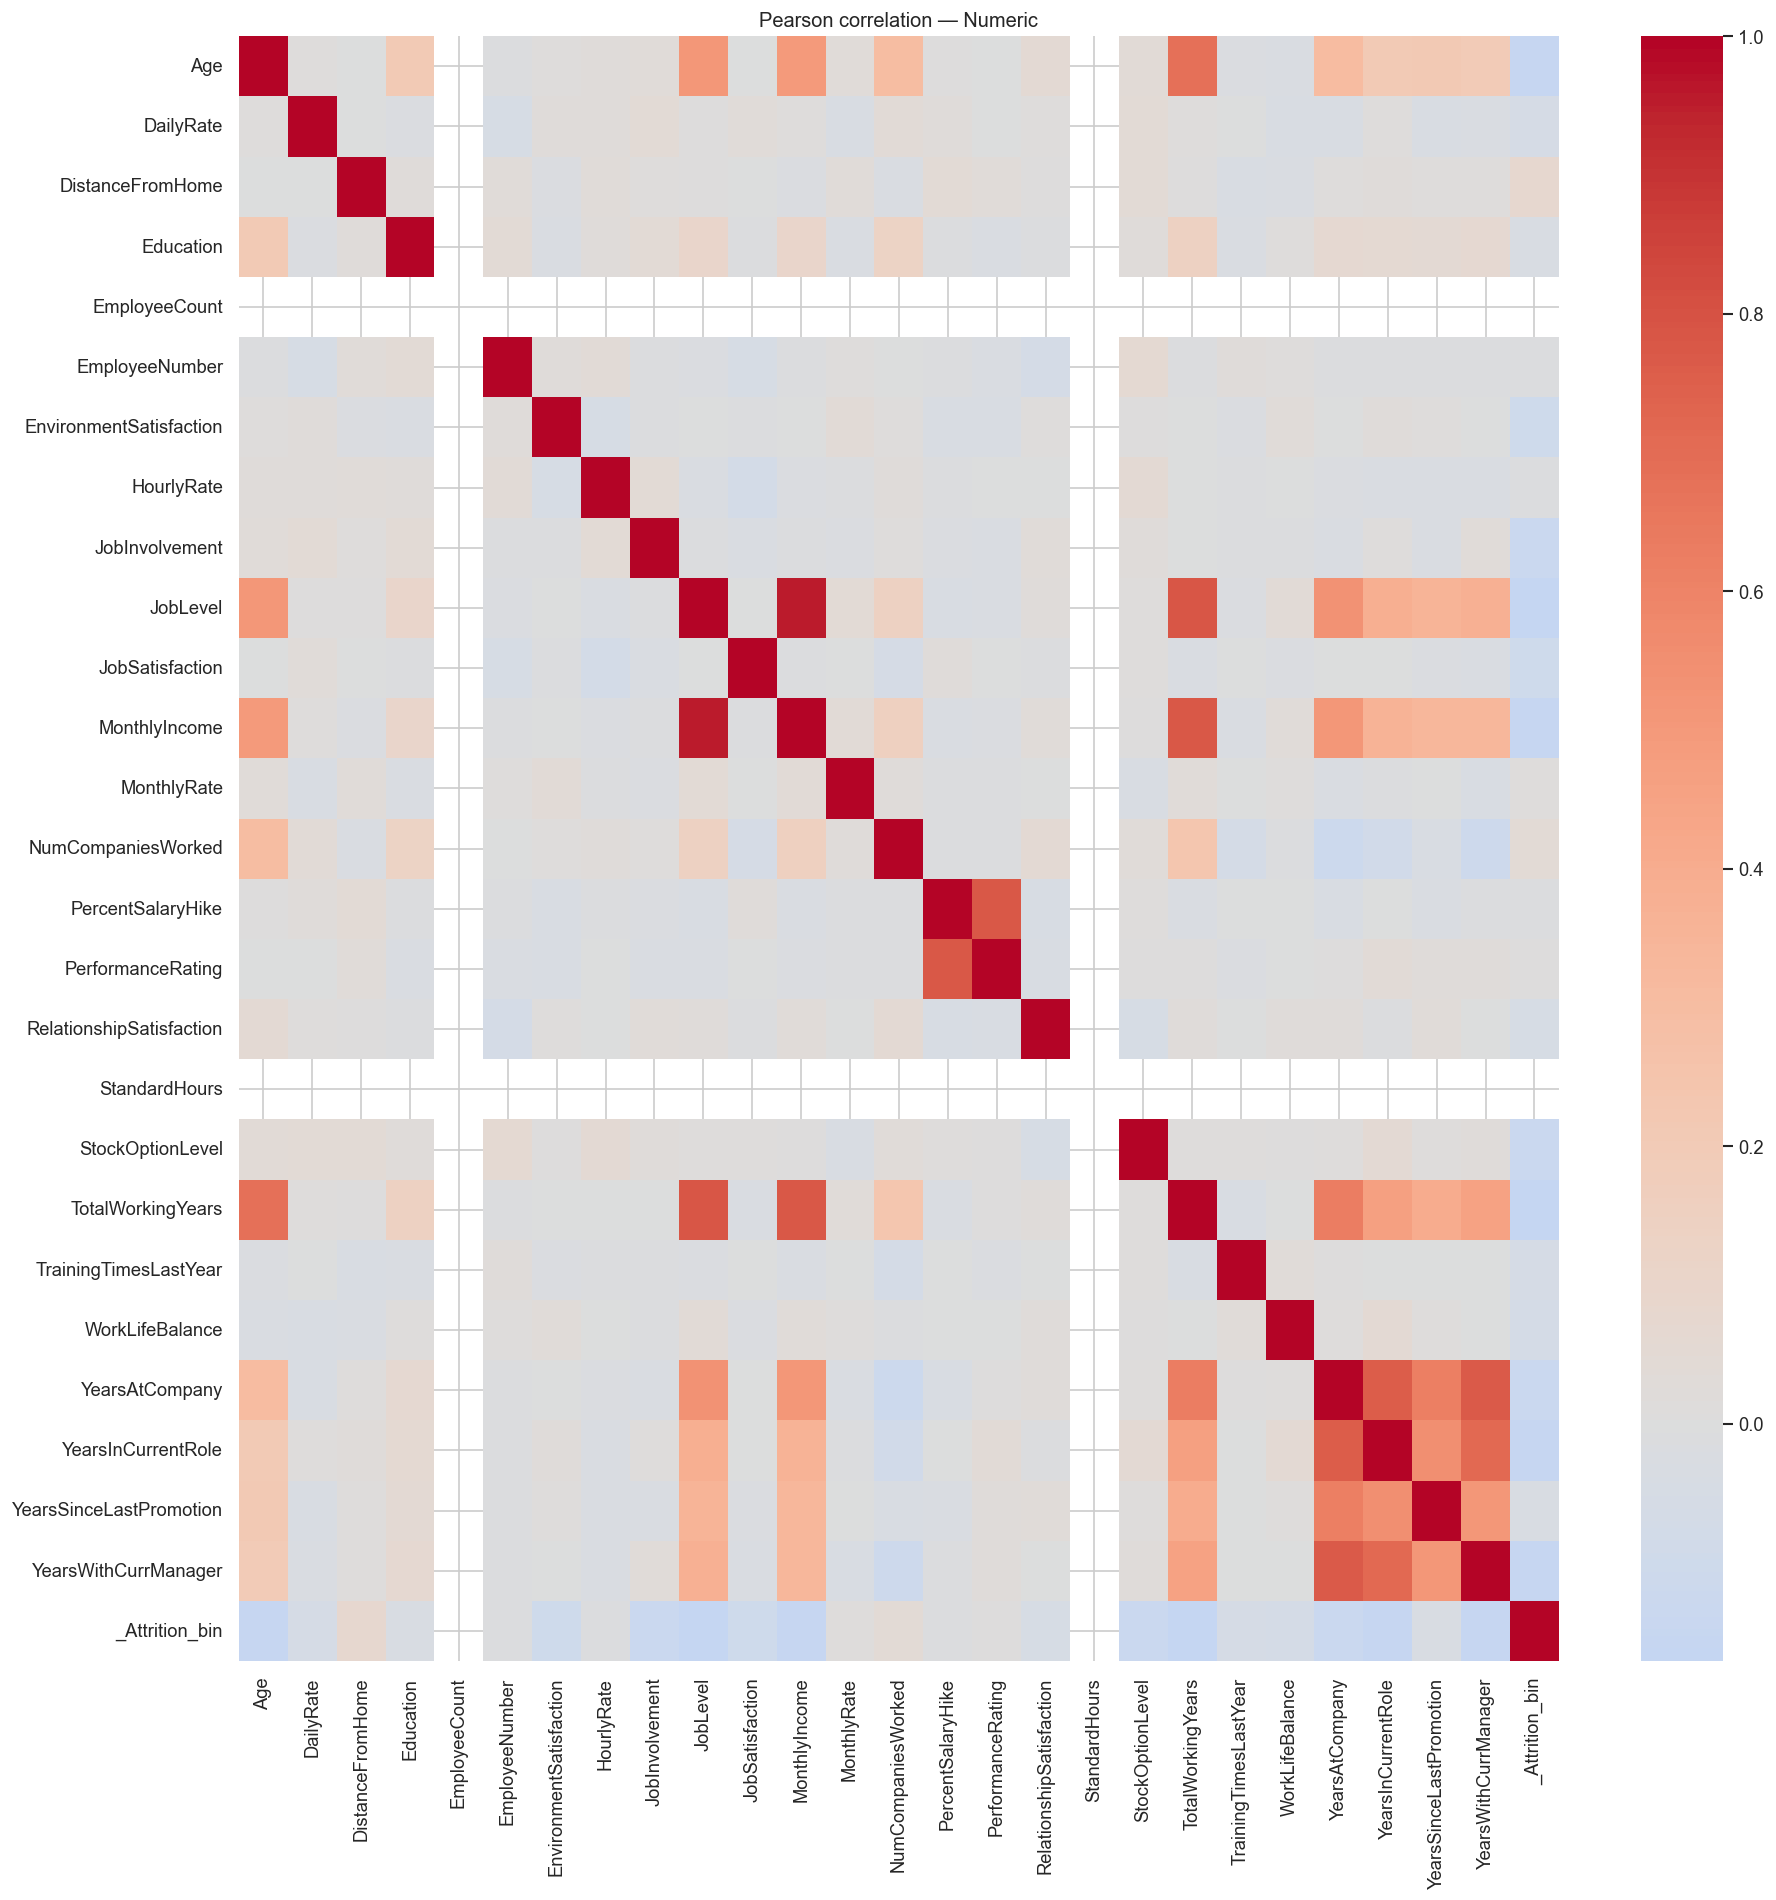

> **Pearson correlation:** Measures **linear** association (−1 to +1). High |corr| suggests stronger linear relationship; near 0 means weak/none. Sensitive to **outliers**.

### Spearman correlation matrix (numeric)

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000      0.007            -0.019      0.205   
DailyRate                 0.007      1.000            -0.003     -0.014   
DistanceFromHome         -0.019     -0.003             1.000      0.016   
Education                 0.205     -0.014             0.016      1.000   
EmployeeCount               NaN        NaN               NaN        NaN   
EmployeeNumber           -0.002     -0.052             0.039      0.043   
EnvironmentSatisfaction   0.010      0.019            -0.010     -0.028   
HourlyRate                0.029      0.024             0.020      0.014   
JobInvolvement            0.034      0.042             0.034      0.037   
JobLevel                  0.490      0.004             0.022      0.107   
JobSatisfaction          -0.005      0.028            -0.013     -0.005   
MonthlyIncome             0.472      0.016             0.003      0.120   
MonthlyRate               0.017     -0.032             0.040     -0.021   
NumCompaniesWorked        0.353      0.037            -0.010      0.135   
PercentSalaryHike         0.008      0.025             0.030      0.004   
PerformanceRating         0.000      0.001             0.011     -0.025   
RelationshipSatisfaction  0.046      0.010             0.006     -0.013   
StandardHours               NaN        NaN               NaN        NaN   
StockOptionLevel          0.057      0.039             0.030      0.014   
TotalWorkingYears         0.657      0.021            -0.003      0.162   
TrainingTimesLastYear     0.000     -0.011            -0.025     -0.024   
WorkLifeBalance          -0.004     -0.040            -0.020      0.017   
YearsAtCompany            0.252     -0.010             0.011      0.064   
YearsInCurrentRole        0.198      0.007             0.014      0.055   
YearsSinceLastPromotion   0.174     -0.038            -0.005      0.032   
YearsWithCurrManager      0.195     -0.005             0.004      0.051   
_Attrition_bin           -0.171     -0.057             0.079     -0.030   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN          -0.002   
DailyRate                           NaN          -0.052   
DistanceFromHome                    NaN           0.039   
Education                           NaN           0.043   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN           1.000   
EnvironmentSatisfaction             NaN           0.022   
HourlyRate                          NaN           0.035   
JobInvolvement                      NaN          -0.002   
JobLevel                            NaN          -0.011   
JobSatisfaction                     NaN          -0.047   
MonthlyIncome                       NaN           0.002   
MonthlyRate                         NaN           0.012   
NumCompaniesWorked                  NaN           0.007   
PercentSalaryHike                   NaN          -0.008   
PerformanceRating                   NaN          -0.021   
RelationshipSatisfaction            NaN          -0.073   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN           0.059   
TotalWorkingYears                   NaN          -0.004   
TrainingTimesLastYear               NaN           0.027   
WorkLifeBalance                     NaN           0.010   
YearsAtCompany                      NaN           0.013   
YearsInCurrentRole                  NaN          -0.001   
YearsSinceLastPromotion             NaN           0.008   
YearsWithCurrManager                NaN          -0.005   
_Attrition_bin                      NaN          -0.010   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                         0.010       0.029           0.034   
DailyRate                                   0.019       0.024           0.042   
DistanceFromHome               

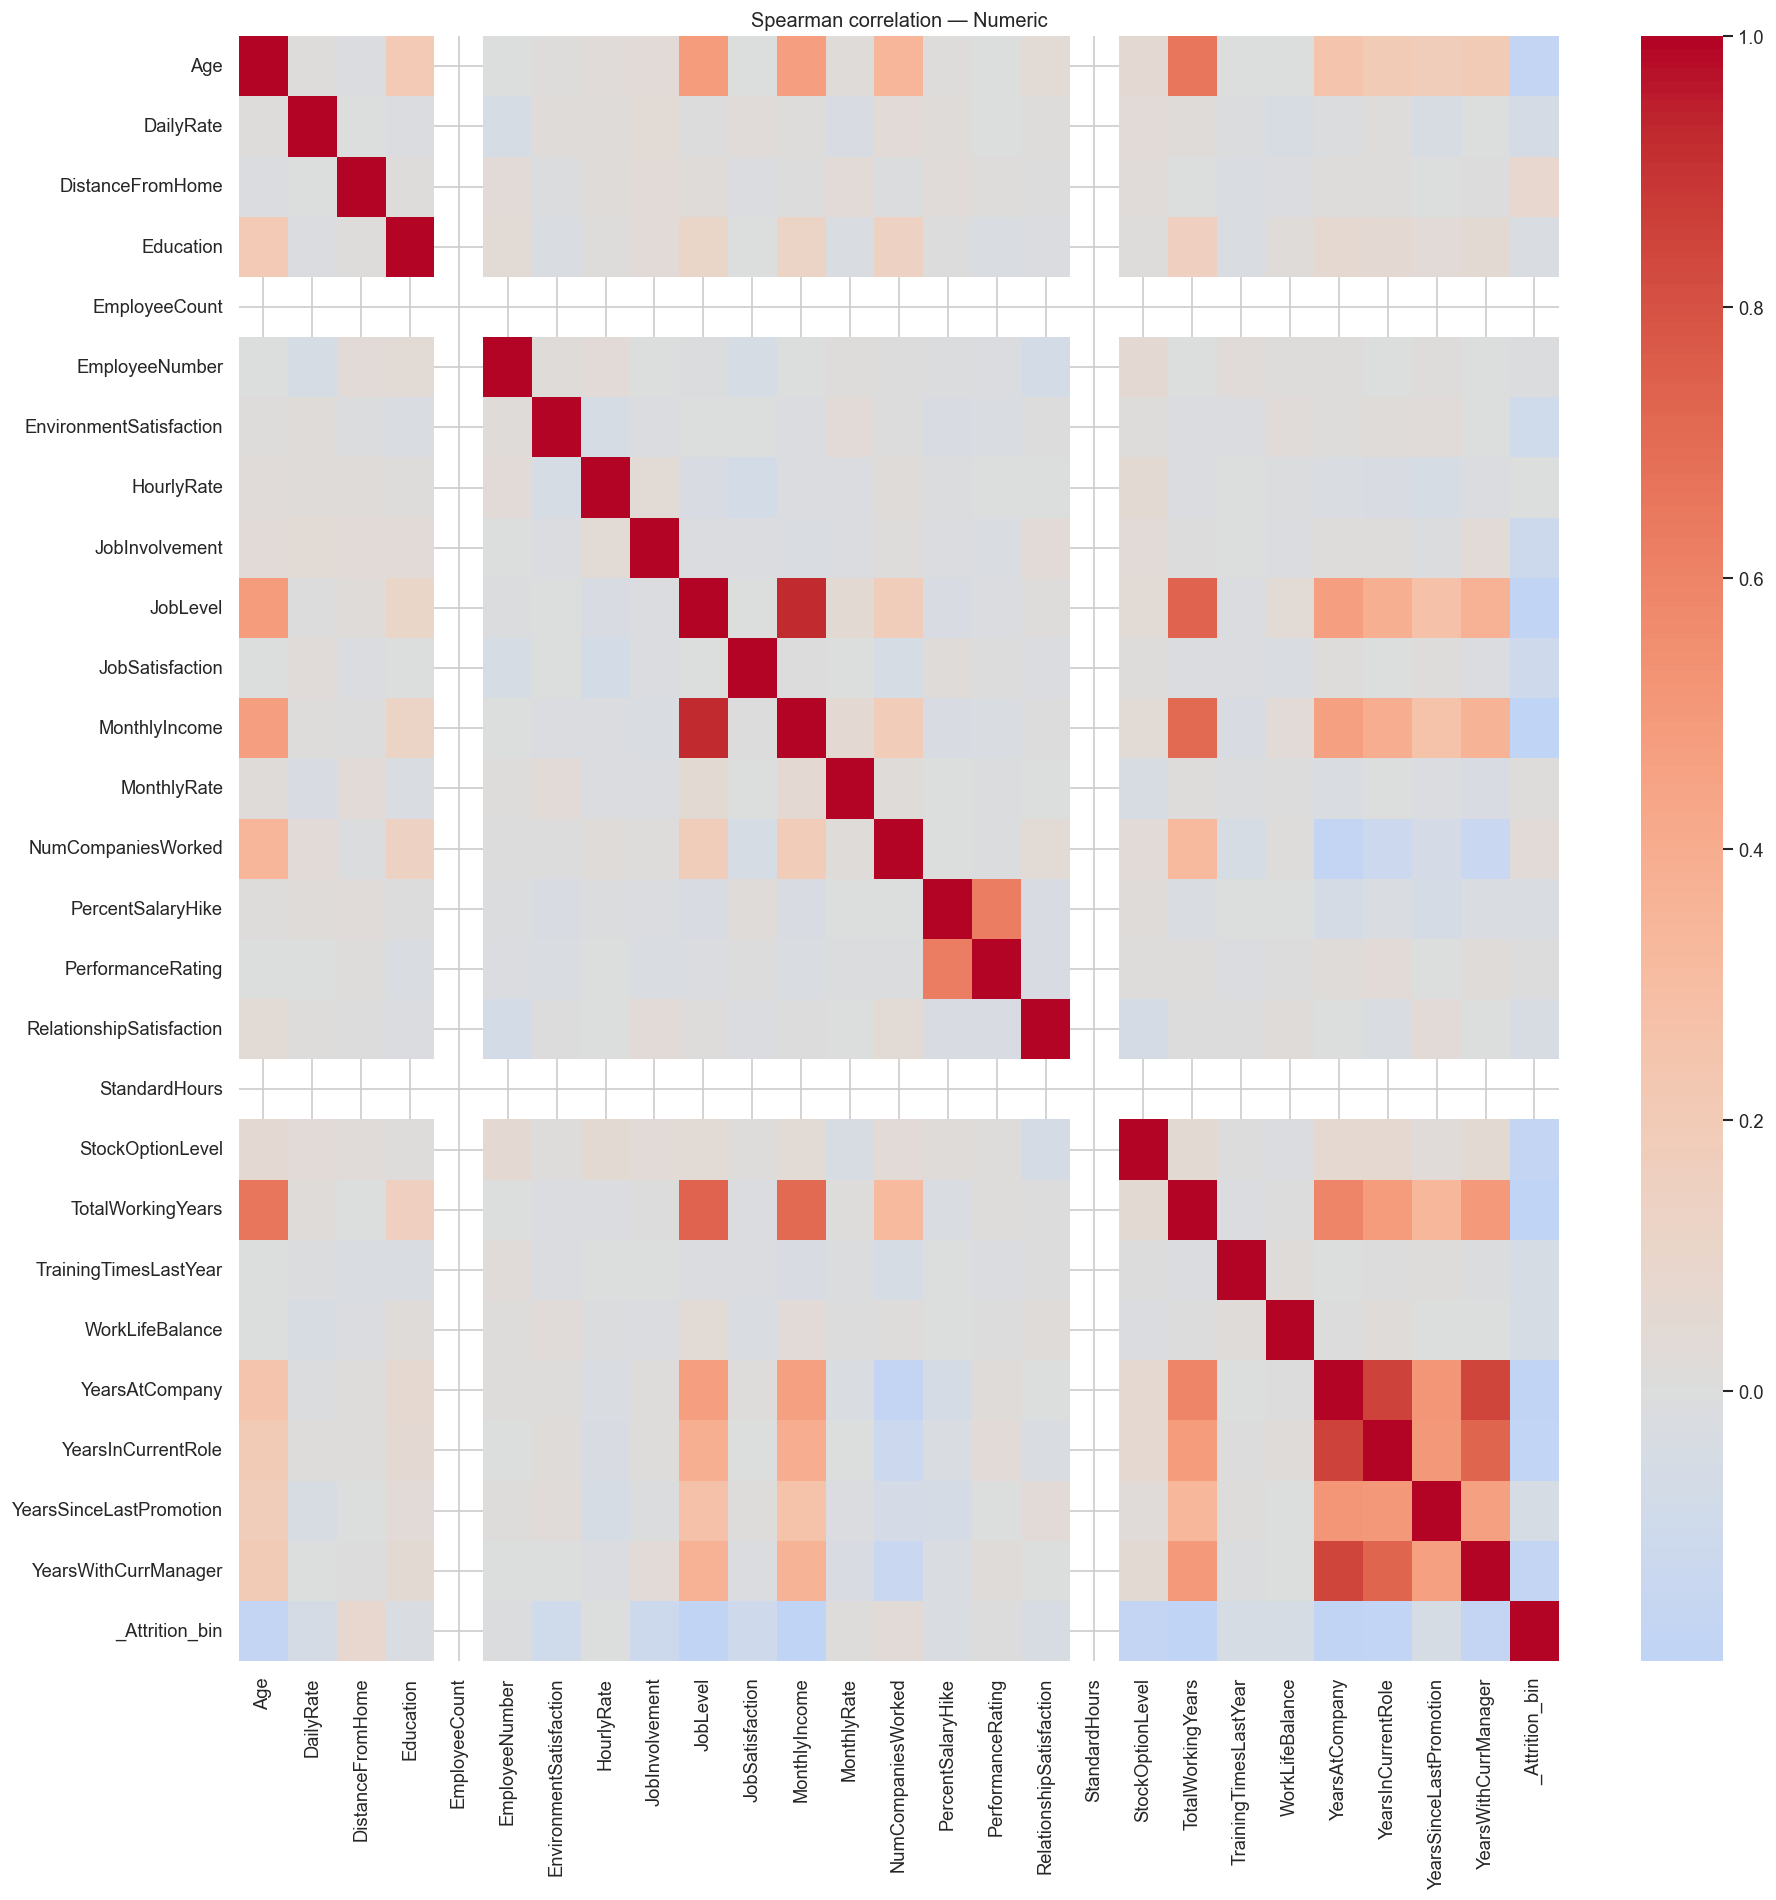

> **Spearman correlation:** Rank‑based; captures **monotonic** (not necessarily linear) relationships. More robust to outliers and non‑normality. Use it to confirm patterns when Pearson is low but **ordered trends** exist.

### VIF — multicollinearity diagnostics

feature    vif
8                   JobLevel  11.21
10             MonthlyIncome  10.80
17         TotalWorkingYears   4.77
20            YearsAtCompany   4.59
23      YearsWithCurrManager   2.77
21        YearsInCurrentRole   2.72
13         PercentSalaryHike   2.52
14         PerformanceRating   2.51
0                        Age   2.04
22   YearsSinceLastPromotion   1.67
12        NumCompaniesWorked   1.26
3                  Education   1.06
16          StockOptionLevel   1.02
1                  DailyRate   1.02
15  RelationshipSatisfaction   1.02
4             EmployeeNumber   1.02
6                 HourlyRate   1.02
2           DistanceFromHome   1.02
9            JobSatisfaction   1.02
7             JobInvolvement   1.02
19           WorkLifeBalance   1.01
11               MonthlyRate   1.01
5    EnvironmentSatisfaction   1.01
18     TrainingTimesLastYear   1.01

> **How to interpret VIF:** Quantifies **multicollinearity** among predictors. 
> • **VIF ≈ 1–5**: usually acceptable; **5–10**: monitor; **>10**: problematic redundancy.
> **Action:** Consider **dropping/combining** collinear features or using **regularization** (L1/L2).

### Pairplot — top numeric features by |Pearson| to target

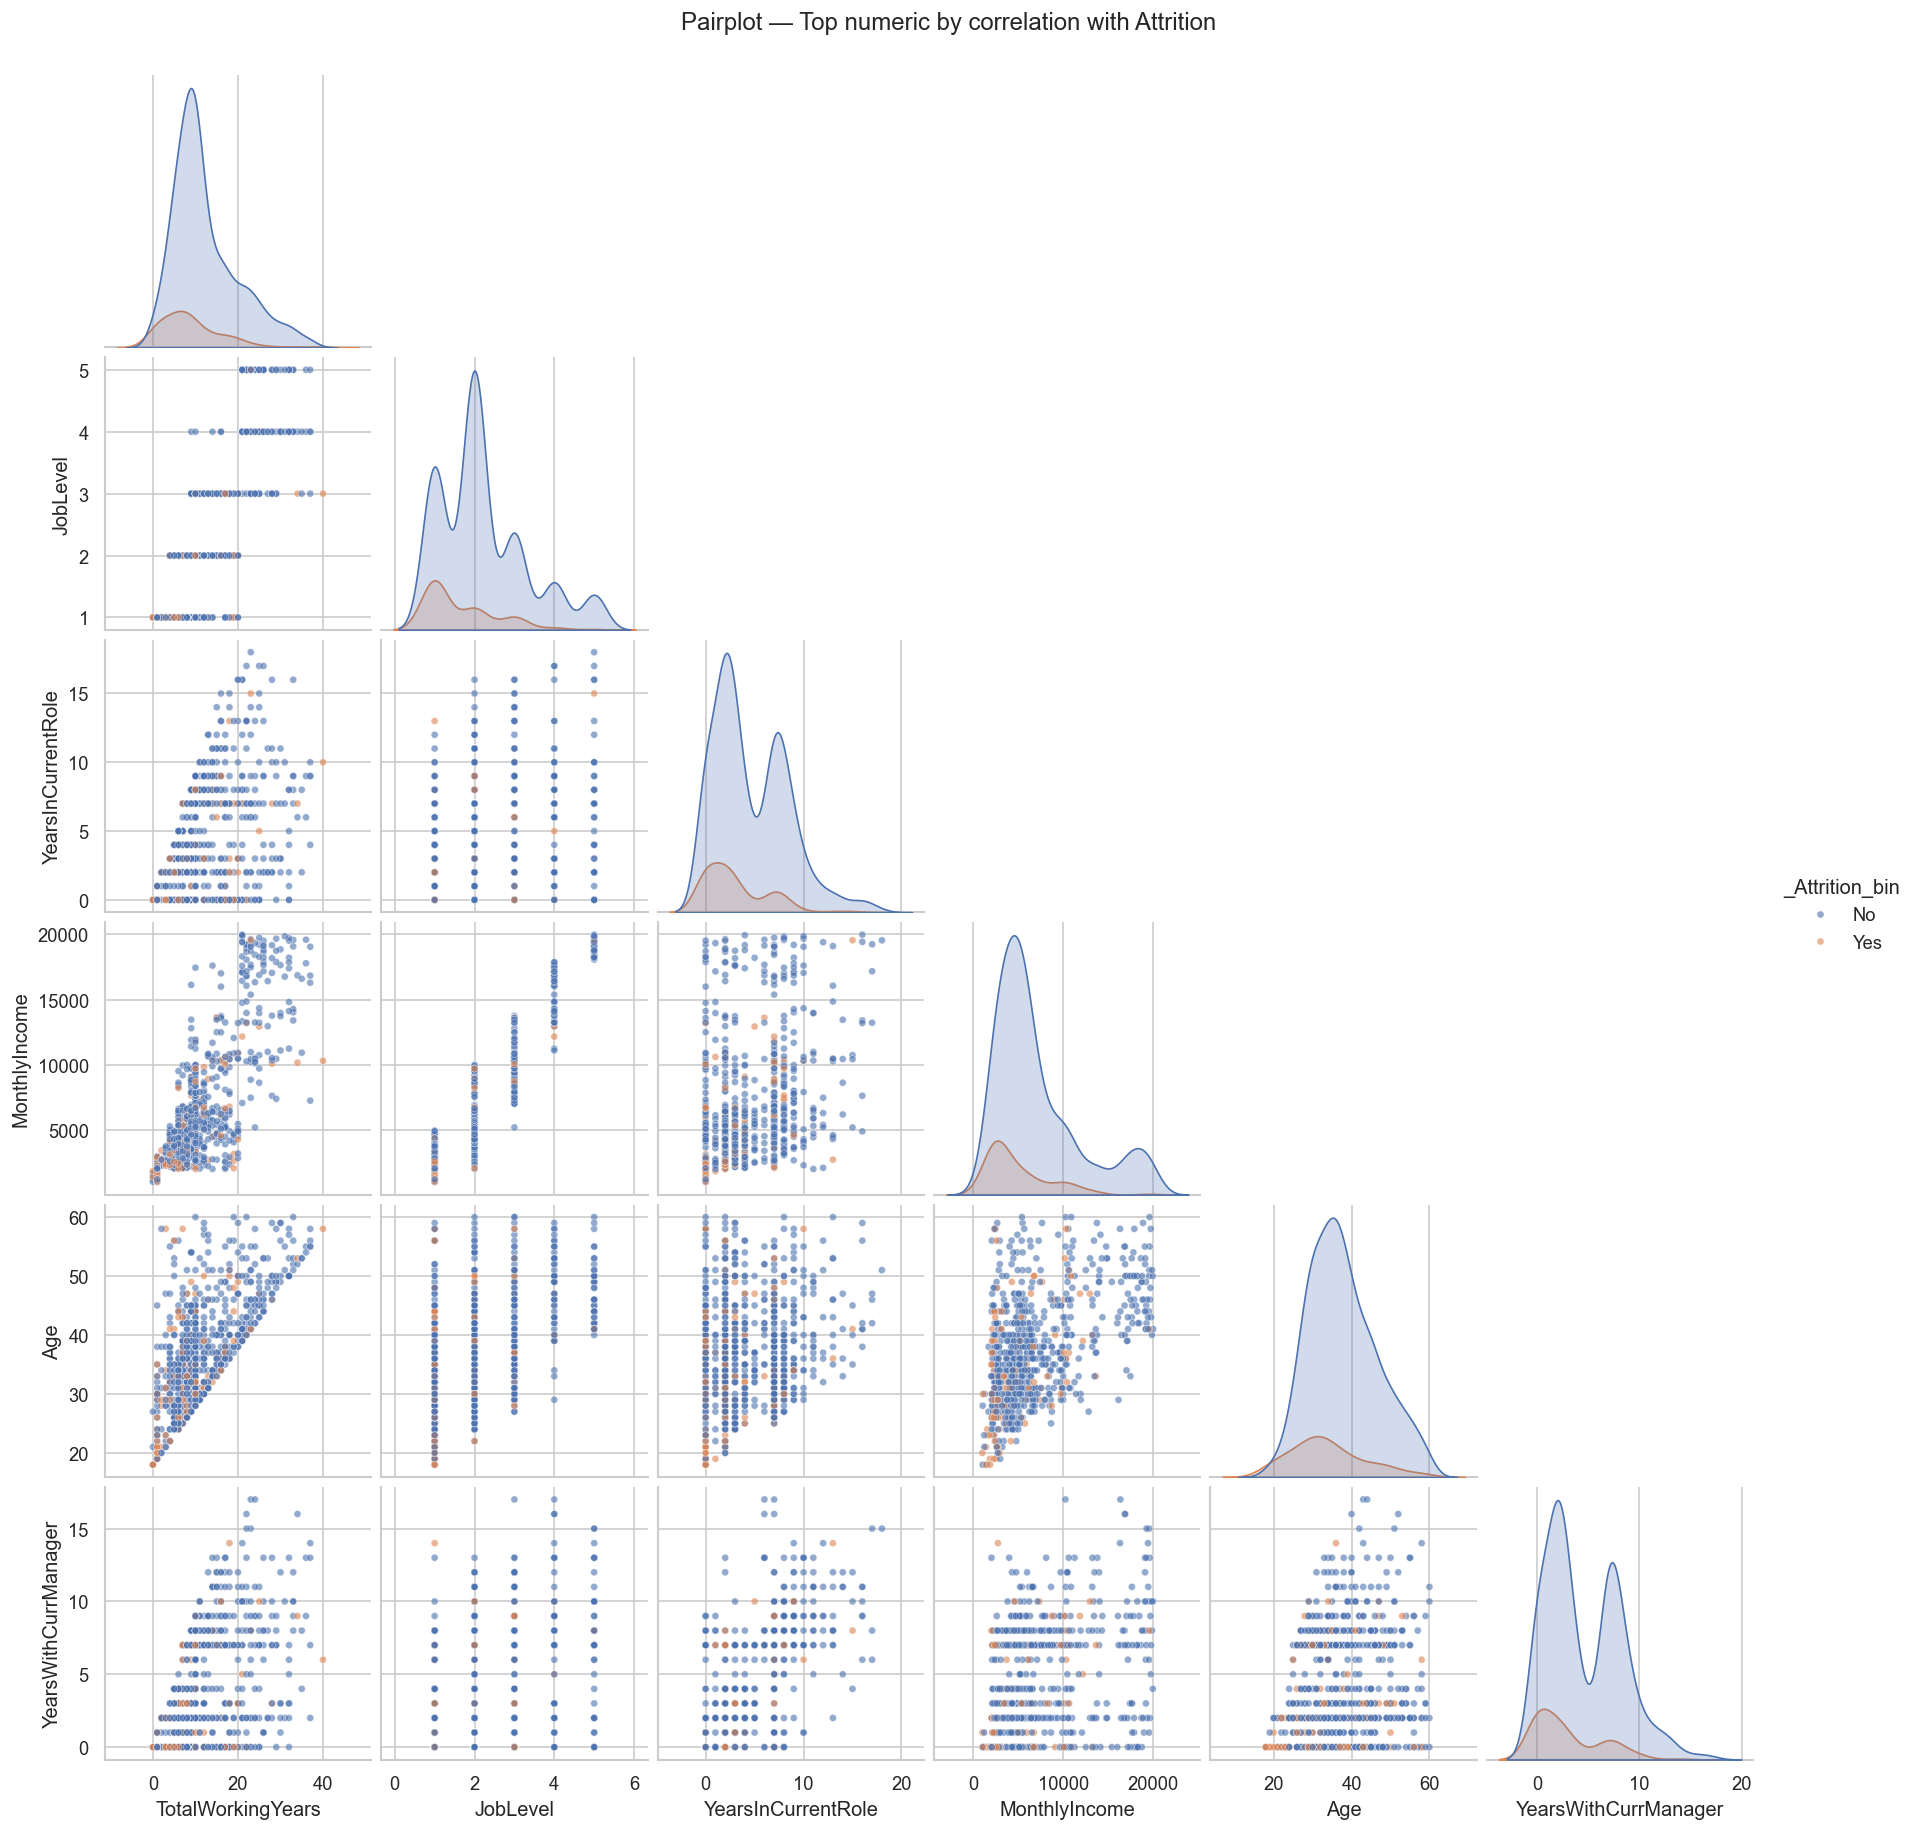

> **How to read:** Diagonals show **univariate densities**; off‑diagonals show **pairwise relationships**. Look for **separable clouds** by hue (Yes/No) and **nonlinear shapes** that correlations may miss.

### Cramér’s V — categorical-to-categorical association map

EmployeeCount  Over18  StandardHours  Gender  \
EmployeeCount                       1.0     0.0            0.0   0.000   
Over18                              0.0     1.0            0.0   0.000   
StandardHours                       0.0     0.0            1.0   0.000   
Gender                              0.0     0.0            0.0   1.000   
OverTime                            0.0     0.0            0.0   0.033   
PerformanceRating                   0.0     0.0            0.0   0.000   
BusinessTravel                      0.0     0.0            0.0   0.026   
Department                          0.0     0.0            0.0   0.018   
MaritalStatus                       0.0     0.0            0.0   0.023   
EnvironmentSatisfaction             0.0     0.0            0.0   0.000   
JobInvolvement                      0.0     0.0            0.0   0.000   
JobSatisfaction                     0.0     0.0            0.0   0.000   
RelationshipSatisfaction            0.0     0.0            0.0   0.000   
StockOptionLevel                    0.0     0.0            0.0   0.000   
WorkLifeBalance                     0.0     0.0            0.0   0.000   

                          OverTime  PerformanceRating  BusinessTravel  \
EmployeeCount                0.000              0.000           0.000   
Over18                       0.000              0.000           0.000   
StandardHours                0.000              0.000           0.000   
Gender                       0.033              0.000           0.026   
OverTime                     1.000              0.000           0.017   
PerformanceRating            0.000              1.000           0.000   
BusinessTravel               0.017              0.000           1.000   
Department                   0.000              0.000           0.000   
MaritalStatus                0.000              0.000           0.035   
EnvironmentSatisfaction      0.034              0.000           0.000   
JobInvolvement               0.000              0.000           0.013   
JobSatisfaction              0.012              0.015           0.000   
RelationshipSatisfaction     0.015              0.000           0.000   
StockOptionLevel             0.000              0.000           0.000   
WorkLifeBalance              0.000              0.000           0.000   

                          Department  MaritalStatus  EnvironmentSatisfaction  \
EmployeeCount                  0.000          0.000                    0.000   
Over18                         0.000          0.000                    0.000   
StandardHours                  0.000          0.000                    0.000   
Gender                         0.018          0.023                    0.000   
OverTime                       0.000          0.000                    0.034   
PerformanceRating              0.000          0.000                    0.000   
BusinessTravel                 0.000          0.035                    0.000   
Department                     1.000          0.030                    0.015   
MaritalStatus                  0.030          1.000                    0.016   
EnvironmentSatisfaction        0.015          0.016                    1.000   
JobInvolvement                 0.000          0.019                    0.034   
JobSatisfaction                0.024          0.000                    0.000   
RelationshipSatisfaction       0.016          0.020                    0.000   
StockOptionLevel               0.000          0.475                    0.000   
WorkLifeBalance                0.038          0.000                    0.000   

                          JobInvolvement  JobSatisfaction  \
EmployeeCount                      0.000            0.000   
Over18                             0.000            0.000   
StandardHours                      0.000            0.000   
Gender                             0.000            0.000   
OverTime                           0.000            0.012   
PerformanceRating        

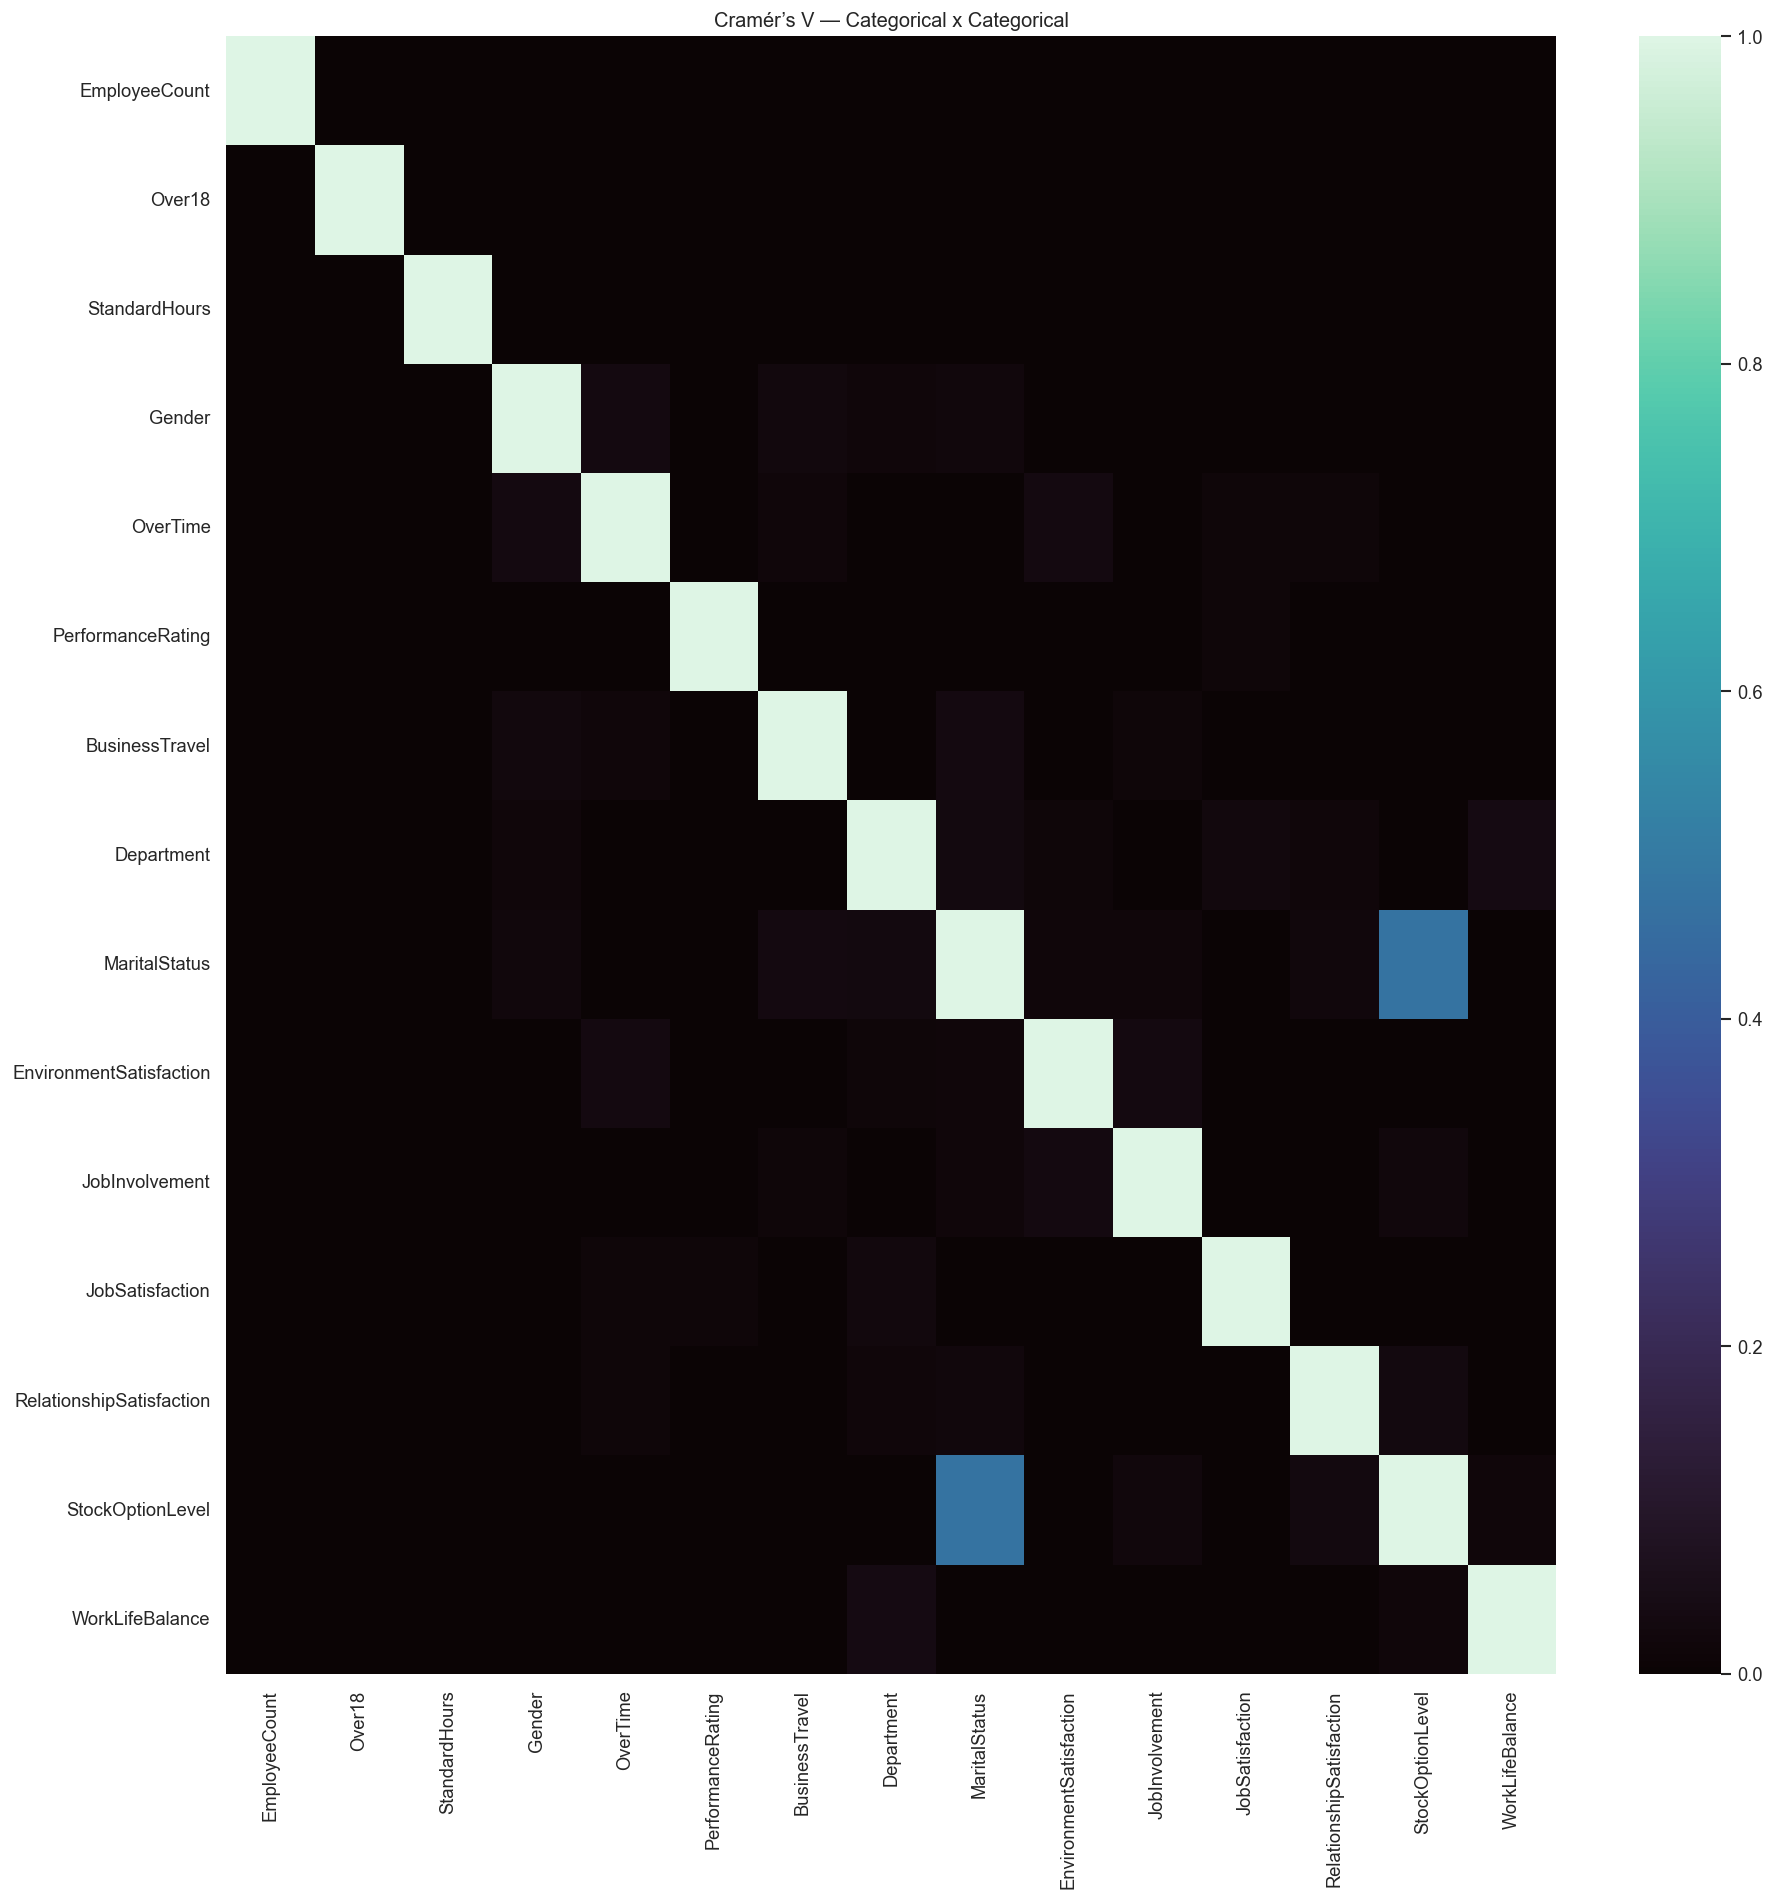

> **Cramér’s V (0–1):** Strength of association between **two categoricals** (0=no association, 1=perfect). 
> **Use it for:** Detect **redundant categories** (high V) that can cause leakage or overfitting. Not directional; doesn’t imply causality.

### 2D attrition hotspots (best two categoricals vs target)

**Hotspot grid:** OverTime × MaritalStatus — Attrition (%)

MaritalStatus  Divorced  Married  Single
OverTime                                
No                  6.1      8.4    16.2
Yes                19.2     23.1    49.6

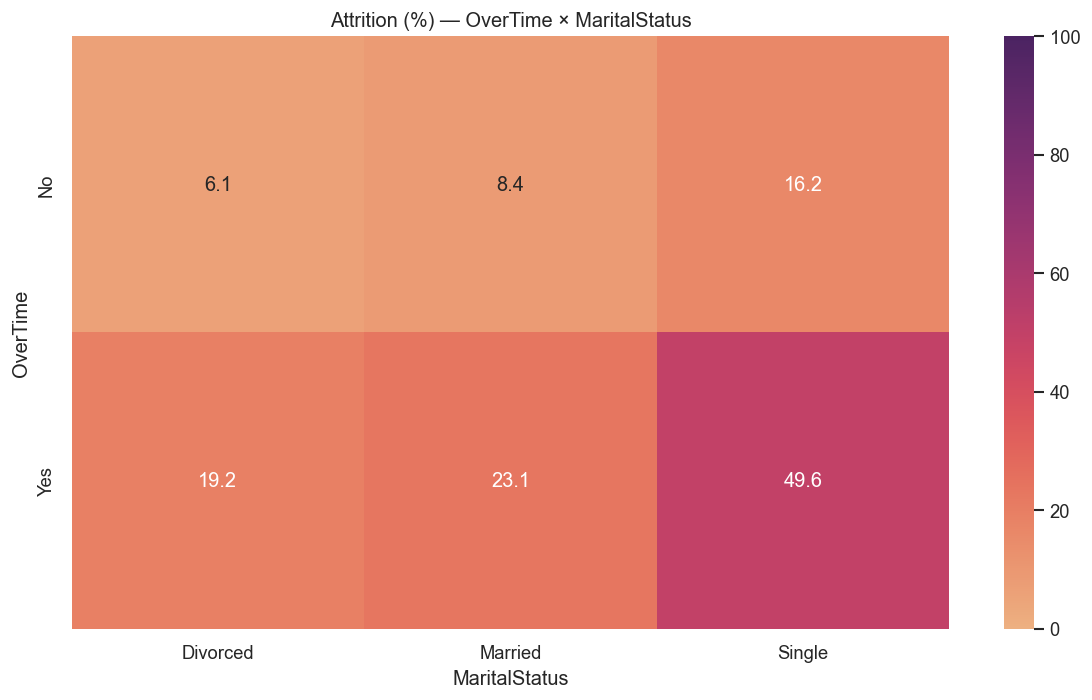

> **How to read:** Cells show **attrition rates** at the **intersection of two categories**. 
> **What to seek:** **Risky combinations** (hotspots) where risk multiplies. Watch **small sample cells**; consider minimum support thresholds.

## Mutual Information & Decile profiles

Mutual Information with target (higher = more nonlinear signal)

feature  mutual_information
1                 Attrition              0.4417
16            MonthlyIncome              0.0334
13                  JobRole              0.0302
19                 OverTime              0.0277
24        TotalWorkingYears              0.0258
12                 JobLevel              0.0250
30     YearsWithCurrManager              0.0244
27           YearsAtCompany              0.0213
23         StockOptionLevel              0.0210
28       YearsInCurrentRole              0.0175
0                       Age              0.0173
15            MaritalStatus              0.0150
18       NumCompaniesWorked              0.0088
11           JobInvolvement              0.0087
5          DistanceFromHome              0.0084
2            BusinessTravel              0.0081
8   EnvironmentSatisfaction              0.0070
14          JobSatisfaction              0.0059
7            EducationField              0.0051
25    TrainingTimesLastYear              0.0050

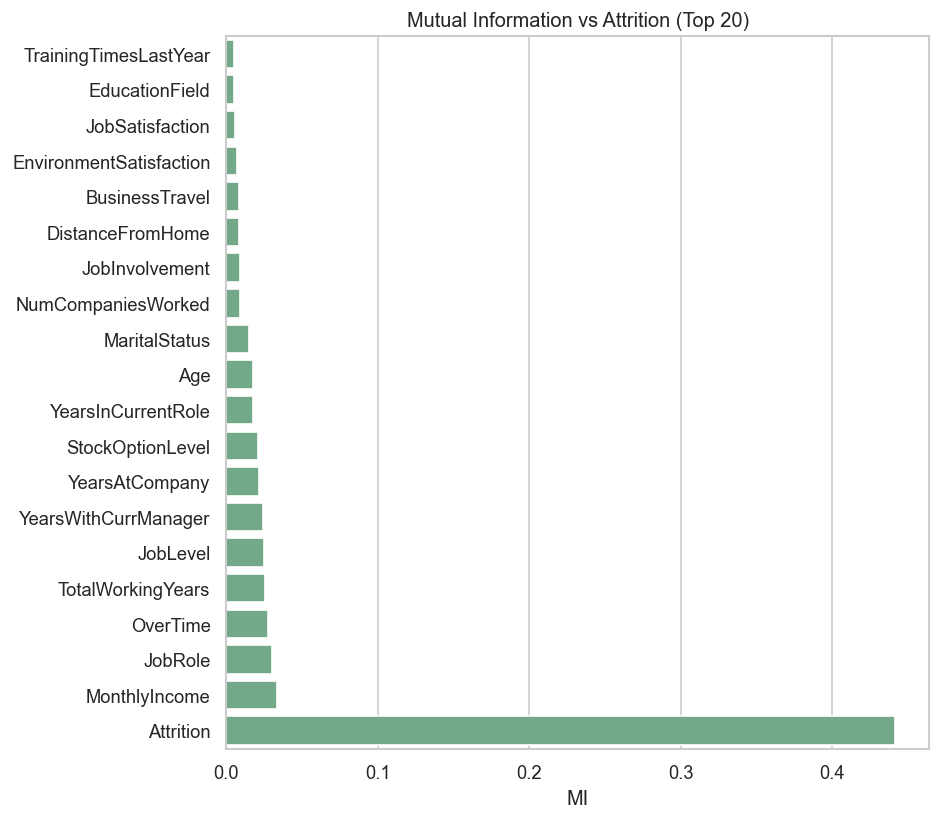

> **Mutual Information (MI):** Measures **general dependency** (captures **nonlinear** and **non‑monotonic** relations). 0 = independent; higher = stronger link. 
> **Use it for:** Surfacing **signals that correlations miss**; prioritizing features before modeling. Note MI is non‑directional and depends on discretization/estimation.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:582: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()


Attrition by deciles — **TotalWorkingYears**

bin  attrition_pct
0  (-0.001, 3.0]          38.18
1     (3.0, 5.0]          18.54
2     (5.0, 6.7]          17.60
3     (6.7, 8.0]          18.48
4    (8.0, 10.0]          11.74
5   (10.0, 13.0]          12.50
6   (13.0, 17.0]          10.64
7   (17.0, 23.0]           8.97
8   (23.0, 40.0]           8.46

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:600: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


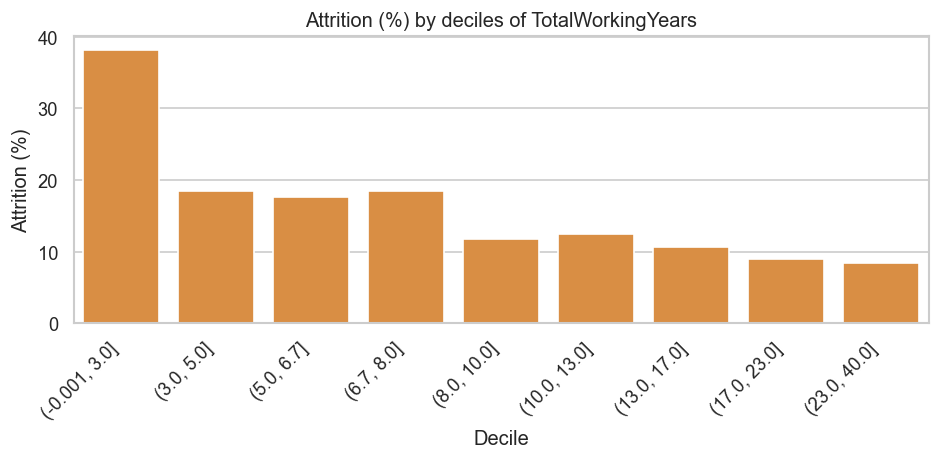

> **How to read:** Bars show **attrition rates across ordered bins**. 
> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:582: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()


Attrition by deciles — **MonthlyIncome**

bin  attrition_pct
0  (1008.999, 2317.6]          31.29
1    (2317.6, 2695.8]          31.29
2    (2695.8, 3316.9]          18.37
3    (3316.9, 4228.8]          15.65
4    (4228.8, 4919.0]          12.24
5    (4919.0, 5743.4]           8.84
6    (5743.4, 6886.0]          11.56
7    (6886.0, 9860.0]          13.61
8   (9860.0, 13775.6]          14.97
9  (13775.6, 19999.0]           3.40

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:600: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


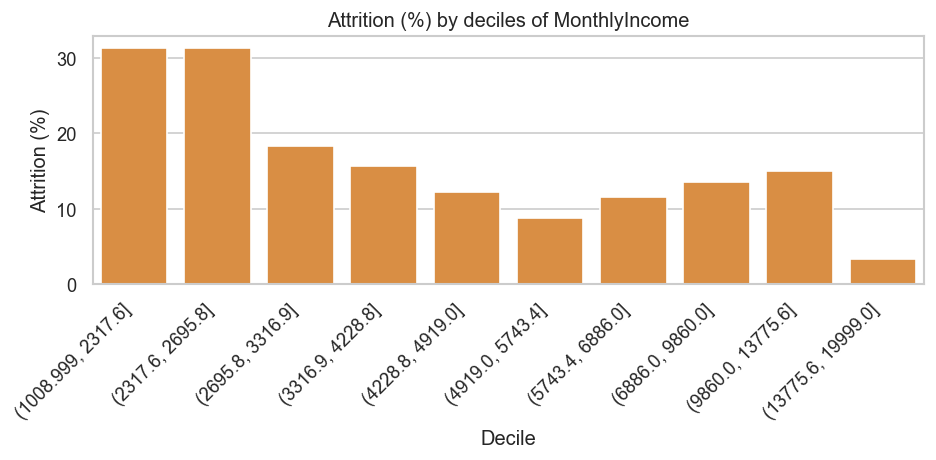

> **How to read:** Bars show **attrition rates across ordered bins**. 
> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:582: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()


Attrition by deciles — **YearsAtCompany**

bin  attrition_pct
0  (-0.001, 1.0]          34.88
1     (1.0, 2.0]          21.26
2     (2.0, 3.0]          15.62
3     (3.0, 5.0]          13.07
4     (5.0, 7.0]          12.05
5     (7.0, 9.0]          10.49
6    (9.0, 10.0]          15.00
7   (10.0, 15.0]           6.48
8   (15.0, 40.0]           9.42

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:600: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


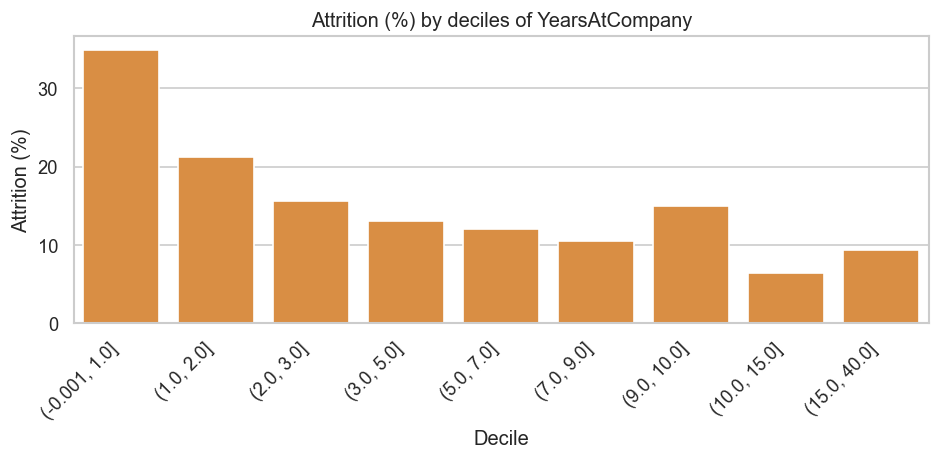

> **How to read:** Bars show **attrition rates across ordered bins**. 
> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:582: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()


Attrition by deciles — **JobLevel**

bin  attrition_pct
0  (0.999, 2.0]          18.11
1    (2.0, 3.0]          14.68
2    (3.0, 4.0]           4.72
3    (4.0, 5.0]           7.25

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:600: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


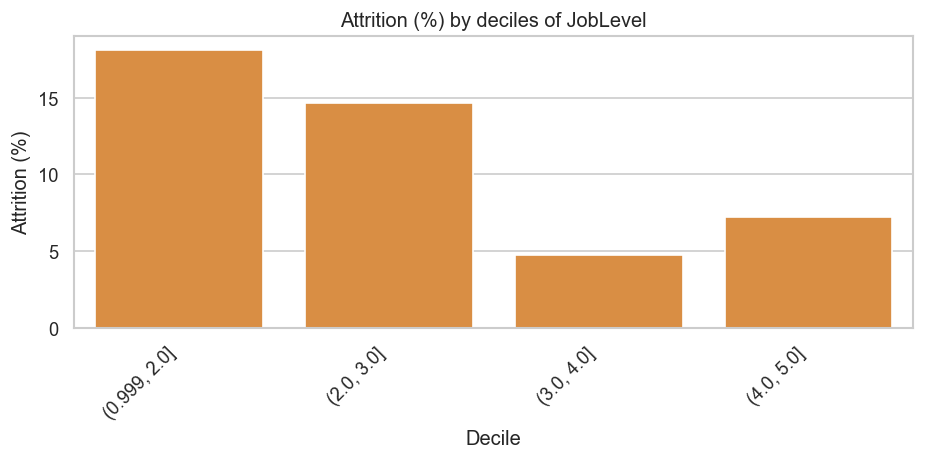

> **How to read:** Bars show **attrition rates across ordered bins**. 
> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:582: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()


Attrition by deciles — **YearsInCurrentRole**

bin  attrition_pct
0  (-0.001, 1.0]          27.91
1     (1.0, 2.0]          18.28
2     (2.0, 3.0]          11.85
3     (3.0, 4.0]          14.42
4     (4.0, 7.0]          11.53
5     (7.0, 9.0]           8.33
6    (9.0, 18.0]           6.54

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:600: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


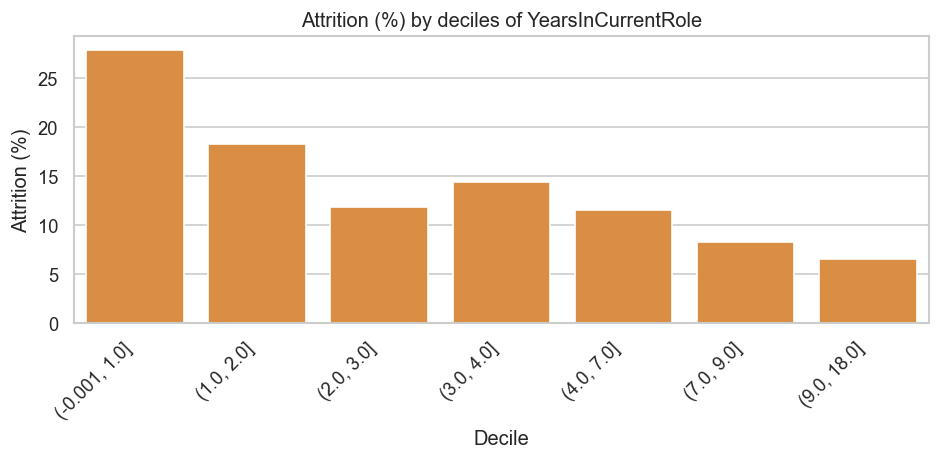

> **How to read:** Bars show **attrition rates across ordered bins**. 
> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:582: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()


Attrition by deciles — **YearsWithCurrManager**

bin  attrition_pct
0  (-0.001, 1.0]          28.32
1     (1.0, 2.0]          14.53
2     (2.0, 3.0]          13.38
3     (3.0, 4.0]          11.22
4     (4.0, 7.0]          14.13
5     (7.0, 9.0]           9.36
6    (9.0, 17.0]           6.00

C:\Users\mathe\AppData\Local\Temp\ipykernel_26912\493019552.py:600: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


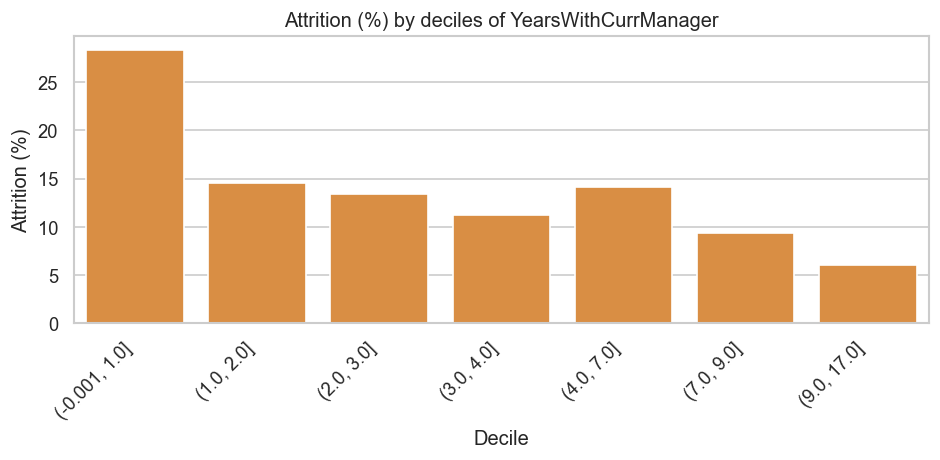

> **How to read:** Bars show **attrition rates across ordered bins**. 
> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.

> ✅ **Completed**: EDA displayed with inline interpretations and **all artifacts saved** under `data/clean/eda/…`.

In [11]:
# ============================================
# FULL EDA — DISPLAY + SAVE + INLINE COMMENTS
# ============================================
# Requirements: df and PROJECT_ROOT already defined in the notebook.

import os
import re
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display, Markdown

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120
SEED = 42
np.random.seed(SEED)

# ---------- ALWAYS SAVE ----------
SAVE_FIGS = True
SAVE_TABLES = True

# ---------- Output structure ----------
base_dir = PROJECT_ROOT / 'data' / 'clean' / 'eda'
uni_fig_dir = base_dir / 'univariate' / 'figures'
uni_tab_dir = base_dir / 'univariate' / 'tables'
biv_fig_dir = base_dir / 'bivariate' / 'figures'
biv_tab_dir = base_dir / 'bivariate' / 'tables'
mul_fig_dir = base_dir / 'multivariate' / 'figures'
mul_tab_dir = base_dir / 'multivariate' / 'tables'

for d in [uni_fig_dir, uni_tab_dir, biv_fig_dir, biv_tab_dir, mul_fig_dir, mul_tab_dir]:
    d.mkdir(parents=True, exist_ok=True)

# ---------- Utilities ----------
def safe_filename(name: str) -> str:
    name = re.sub(r'[\\/*?:"<>|]+', "_", str(name))
    return name[:150]

def h2(text: str): display(Markdown(f"## {text}"))
def h3(text: str): display(Markdown(f"### {text}"))
def h4(text: str): display(Markdown(f"#### {text}"))
def interpret(md: str): display(Markdown(md))  # inline interpretation/comments

def save_table(df: pd.DataFrame, filename: str, directory) -> None:
    if SAVE_TABLES:
        path = directory / filename
        path.parent.mkdir(parents=True, exist_ok=True)
        df.to_csv(path, index=True)

def show_and_save_fig(fig, filename: str, directory) -> None:
    plt.tight_layout()
    plt.show()
    if SAVE_FIGS:
        path = directory / filename
        path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(path)
    plt.close(fig)

def annotate_bars(ax, total_count: int, fmt_pct='{:.1f}%'):
    for p in ax.patches:
        h = p.get_height()
        if h <= 0:
            continue
        pct = 100.0 * h / max(total_count, 1)
        ax.annotate(f'{int(h)}\n({fmt_pct.format(pct)})',
                    (p.get_x() + p.get_width()/2., h),
                    ha='center', va='bottom', fontsize=9)

def is_categorical(series: pd.Series, thr_unique: int = 10) -> bool:
    return (series.dtype == 'object') or (series.nunique(dropna=True) < thr_unique)

def make_series_plot_ready(s: pd.Series) -> pd.Series:
    return s.astype('object').where(~s.isna(), '(NaN)')

def chi2_from_crosstab(ct: pd.DataFrame):
    observed = ct.values.astype(float)
    row_sums = observed.sum(axis=1, keepdims=True)
    col_sums = observed.sum(axis=0, keepdims=True)
    total = observed.sum()
    expected = row_sums @ col_sums / max(total, 1)
    mask = expected > 0
    chi2 = ((observed - expected)**2 / np.where(mask, expected, 1)).sum()
    return chi2, total

def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2, n = chi2_from_crosstab(ct)
    if n == 0:
        return np.nan
    phi2 = chi2 / n
    r, k = ct.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/max(n-1,1))
    rcorr = r - ((r-1)**2)/max(n-1,1)
    kcorr = k - ((k-1)**2)/max(n-1,1)
    denom = max((kcorr-1), (rcorr-1), 1e-9)
    return np.sqrt(phi2corr / denom)

# ---------- Checks ----------
if 'df' not in globals() or df is None:
    raise ValueError("DataFrame 'df' not found. Run the load cell first.")

# ---------- Parameters ----------
TOP_N_CATEGORIES = 20
CATEG_COLOR = sns.color_palette('viridis')[0]
NUM_HIST_COLOR = '#4BA3C3'
ATTRITION_BAR_COLOR = '#F28E2B'
target = 'Attrition'

# =====================================================
# 1) SUMMARIES (shape, info, dtypes, missing, describe)
# =====================================================
h2("Initial Summaries")

print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
buf = io.StringIO()
df.info(buf=buf)
info_text = buf.getvalue()
print(info_text)
if SAVE_TABLES:
    with open(uni_tab_dir / 'dataframe_info.txt', 'w', encoding='utf-8') as f:
        f.write(info_text)
interpret("> **What this means:** Quick overview of dataset size and column types helps spot obvious issues (e.g., unexpected object dtype for numeric data) and plan cleaning steps. `info()` also reveals memory use and missingness at a glance.")

# Dtypes
h3("Dtypes")
dtypes_df = df.dtypes.rename('dtype').to_frame()
display(dtypes_df)
save_table(dtypes_df, 'dtypes.csv', uni_tab_dir)
interpret("> **How to use:** Identify **numeric vs. categorical** features to choose appropriate plots and models. Flags for constants (only one unique value) or IDs (e.g., `EmployeeNumber`) help decide drops.")

# Missing
h3("Missing by column")
missing = df.isna().sum().rename('missing_count').to_frame()
missing['missing_pct'] = (missing['missing_count']/len(df)*100).round(2)
missing_sorted = missing.sort_values('missing_pct', ascending=False)
display(missing_sorted)
save_table(missing_sorted, 'missing_by_column.csv', uni_tab_dir)
interpret("> **What to look for:** High missing % suggests imputation or feature removal. Consider whether missingness is **MCAR/MAR/MNAR**; correlated missingness across columns may indicate **systematic data issues** or **shared business logic** driving gaps.")

# Describe include all
h3("Descriptive statistics (include='all')")
try:
    desc_all = df.describe(include='all', datetime_is_numeric=True).T
except TypeError:
    desc_all = df.describe(include='all').T
display(desc_all)
save_table(desc_all, 'summary_statistics.csv', uni_tab_dir)
interpret("> **Reading this:** For numerics, check **mean/median** (skew), **std** (spread), and **min/max** (range/outliers). For categoricals, `unique` gives cardinality—**very high cardinality** may require grouping or target encoding.")

# =================================
# 2) UNIVARIATE (tables + graphics)
# =================================
h2("Univariate EDA")

for col in df.columns:
    try:
        s = df[col]
        h4(f"Column: **{col}**")
        if is_categorical(s):
            s_plot = make_series_plot_ready(s)
            vc_full = s_plot.value_counts(dropna=False)
            total = int(vc_full.sum())
            if vc_full.shape[0] > TOP_N_CATEGORIES:
                vc = vc_full.head(TOP_N_CATEGORIES).copy()
                other = total - int(vc.sum())
                if other > 0:
                    vc.loc['__OUTROS__'] = other
            else:
                vc = vc_full

            df_vc = (vc.rename('count').to_frame()
                       .assign(pct=lambda d: (d['count']/total*100).round(2)))
            display(df_vc)
            save_table(df_vc, f'value_counts_{safe_filename(col)}.csv', uni_tab_dir)
            interpret("> **What this table shows:** **Counts and percentages** per category. \n"
                      "> **Insights to seek:** Dominant categories (imbalance), **rare levels** (may be merged), and unexpected values (e.g., `(NaN)`).")

            fig, ax = plt.subplots(figsize=(10, 4.5))
            sns.countplot(x=s_plot, order=df_vc.index.tolist(), color=CATEG_COLOR, ax=ax)
            ax.set_title(f'Value counts — {col}')
            ax.set_xlabel(col); ax.set_ylabel('Count')
            ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')
                                for t in ax.get_xticklabels()],
                               rotation=45, ha='right')
            annotate_bars(ax, total_count=total)
            show_and_save_fig(fig, f'{safe_filename(col)}_count.png', uni_fig_dir)
            interpret("> **How to read this plot:** Category height = **frequency**. \n"
                      "> **What it can reveal:** **Imbalanced levels** (potential bias), **data entry inconsistencies**, and **candidates for regrouping** to stabilize downstream modeling.")
        else:
            desc = s.describe().to_frame(name='value')
            display(desc)
            save_table(desc, f'describe_{safe_filename(col)}.csv', uni_tab_dir)
            interpret("> **What this table shows:** Central tendency and spread for a **single variable**. \n"
                      "> **Insights to seek:** **Skewness** (mean vs median), **wide ranges/outliers** (min/max), and **low variance** (uninformative features).")

            nun = s.nunique(dropna=True)
            bins = 30 if nun > 30 else max(10, nun)
            kde_ok = s.dropna().size > 1 and s.dropna().nunique() > 1
            fig, ax = plt.subplots(figsize=(8, 4))
            sns.histplot(s, kde=kde_ok, bins=bins, color=NUM_HIST_COLOR, ax=ax)
            ax.set_title(f'Distribution — {col}')
            ax.set_xlabel(col); ax.set_ylabel('Frequency')
            show_and_save_fig(fig, f'{safe_filename(col)}_hist.png', uni_fig_dir)
            interpret("> **How to read this plot:** The **shape** (e.g., right‑skew) hints at **transformations** (log) and **binning**. \n"
                      "> **What it can reveal:** **Multimodality** (subgroups), **outliers**, and typical ranges for QA/business rules.")
    except Exception as e:
        print(f"[WARN] Univariate failed for {col}: {e}")

# ---- Outlier scan (IQR & Z-score) + plots ----
h3("Outlier scan (IQR & Z-score)")
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != '_Attrition_bin']
rows = []
for c in num_cols:
    s = df[c].dropna()
    if s.size < 3: 
        continue
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_iqr = ((df[c] < lo) | (df[c] > hi)).sum()
    z = (s - s.mean()) / (s.std(ddof=0) if s.std(ddof=0)>0 else 1)
    out_z = (np.abs(z) > 3).sum()
    rows.append((c, out_iqr, out_z, s.size))
out_df = pd.DataFrame(rows, columns=['column','outliers_IQR','outliers_Zgt3','n'])
if not out_df.empty:
    out_df['IQR_outlier_rate_%'] = (out_df['outliers_IQR']/out_df['n']*100).round(2)
    out_df['Z_outlier_rate_%'] = (out_df['outliers_Zgt3']/out_df['n']*100).round(2)
    display(out_df.sort_values('IQR_outlier_rate_%', ascending=False))
    save_table(out_df, 'outlier_scan_numeric.csv', uni_tab_dir)
    interpret("> **How to interpret:** \n"
              "> • **IQR method** flags values beyond Q1−1.5×IQR or Q3+1.5×IQR (robust to skew). \n"
              "> • **Z‑score > 3** flags extreme standard deviations (assumes ~normality). \n"
              "> **Use cases:** Investigate data quality vs. legitimate extremes; consider **winsorization**, **capping**, or **robust models**.")

    top6 = out_df.sort_values('IQR_outlier_rate_%', ascending=False).head(6)['column'].tolist()
    if top6:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.boxplot(data=df[top6], orient='h', showfliers=True, ax=ax)
        ax.set_title('Boxplots — Top-6 by IQR outlier rate')
        show_and_save_fig(fig, 'boxplots_top6_outliers.png', uni_fig_dir)
        interpret("> **Reading boxplots:** Fliers beyond whiskers are candidate outliers. Compare **spread** and **median** shifts across variables.")

# ---- Missingness viz (bar + heatmap + missing corr) ----
h3("Missingness visualizations")
top_missing_cols = missing_sorted.head(30).index.tolist()
if len(top_missing_cols) > 0:
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(x=missing_sorted.head(20).index, y=missing_sorted.head(20)['missing_pct'],
                color='#4BA3C3', ax=ax)
    ax.set_title('Top-20 columns by missing (%)'); ax.set_ylabel('Missing (%)')
    ax.set_xlabel('Column')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    show_and_save_fig(fig, 'missing_top20_bar.png', uni_fig_dir)
    interpret("> **What this shows:** Columns with highest **missing percentages**. \n"
              "> **Why it matters:** High missingness may degrade model performance; plan **imputation** or **feature removal**.")

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df[top_missing_cols].isna(), cbar=False, cmap='viridis', ax=ax)
    ax.set_title('Missingness map (up to 30 columns)')
    show_and_save_fig(fig, 'missingness_heatmap.png', uni_fig_dir)
    interpret("> **How to read:** Vertical bands show rows with many missing fields—potential **systemic issues** or **shared conditions** causing gaps.")

    if len(top_missing_cols) >= 2:
        mask = df[top_missing_cols].isna().astype(int)
        miss_corr = mask.corr()
        display(Markdown("Correlation between missingness masks"))
        display(miss_corr.round(3))
        save_table(miss_corr.round(6), 'missingness_correlation.csv', uni_tab_dir)
        fig, ax = plt.subplots(figsize=(min(1.2*len(miss_corr), 16), min(1.2*len(miss_corr), 16)))
        sns.heatmap(miss_corr, cmap='rocket', vmin=0, vmax=1, ax=ax)
        ax.set_title('Correlation of missingness patterns')
        show_and_save_fig(fig, 'missingness_correlation_heatmap.png', uni_fig_dir)
        interpret("> **Interpretation:** High correlation between missingness suggests **dependent data entry** or **conditional capture** logic; consider **joint imputation** or **feature engineering** to capture 'missingness as information'.")

# =====================================================
# 3) BIVARIATE — focus on Attrition (tables + graphics)
# =====================================================
h2("Bivariate EDA — focus on Attrition")
if target not in df.columns:
    display(Markdown("> ⚠️ Column **Attrition** not found. Skipping bivariate section."))
else:
    y_raw = df[target].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

    # Target distribution
    h3("Target distribution")
    tgt_series = make_series_plot_ready(df[target])
    tgt_vc = tgt_series.value_counts(dropna=False)
    total_tgt = int(tgt_vc.sum())
    df_tgt = (tgt_vc.rename('count').to_frame()
                        .assign(pct=lambda d: (d['count']/total_tgt*100).round(2)))
    display(df_tgt)
    save_table(df_tgt, 'target_distribution.csv', biv_tab_dir)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x=tgt_series, order=tgt_vc.index.tolist(), color=ATTRITION_BAR_COLOR, ax=ax)
    ax.set_title('Attrition distribution'); ax.set_xlabel('Attrition'); ax.set_ylabel('Count')
    annotate_bars(ax, total_count=total_tgt)
    show_and_save_fig(fig, 'attrition_distribution.png', biv_fig_dir)
    interpret("> **Why this matters:** Class **imbalance** affects model training and evaluation. If 'Yes' is rare, use **balanced metrics** (PR‑AUC, recall), **class weights**, or **resampling**.")

    # Categorical vs Attrition: rate per category
    h3("Attrition rate per categorical feature")
    cat_cols = [c for c in df.columns if c not in [target, '_Attrition_bin'] and is_categorical(df[c])]
    for col in cat_cols:
        try:
            s_plot = make_series_plot_ready(df[col])
            counts = s_plot.value_counts(dropna=False)
            keep = counts.head(TOP_N_CATEGORIES).index
            s_top = np.where(s_plot.isin(keep), s_plot, '__OUTROS__')
            tmp = pd.DataFrame({col: s_top, '_Attrition_bin': df['_Attrition_bin']})

            grp = tmp.groupby(col, dropna=False)['_Attrition_bin'].agg(['mean','count']).reset_index()
            grp['attrition_pct'] = (grp['mean']*100).round(2)
            grp = grp.sort_values('attrition_pct', ascending=False)
            display(Markdown(f"**{col}** — attrition rate per category"))
            display(grp.rename(columns={'mean':'attrition_mean'}))
            save_table(grp, f'attrition_rate_by_{safe_filename(col)}.csv', biv_tab_dir)
            interpret("> **How to read:** `attrition_pct` is the **observed rate** within each category. \n"
                      "> **Insights:** Large gaps across categories can indicate **risk factors**. Beware **small counts** (unstable rates); consider **binning** or **Bayesian smoothing**.")

            fig, ax = plt.subplots(figsize=(10, 4.5))
            sns.barplot(data=grp, x=col, y='attrition_pct', color=ATTRITION_BAR_COLOR, ax=ax)
            ax.set_title(f'Attrition (%) by {col}')
            ax.set_xlabel(col); ax.set_ylabel('Attrition (%)')
            for p, v in zip(ax.patches, grp['attrition_pct']):
                ax.annotate(f'{v:.1f}%',
                            (p.get_x() + p.get_width()/2, p.get_height()),
                            ha='center', va='bottom', fontsize=9)
            ax.set_xticklabels([str(t.get_text())[:18] + ('…' if len(str(t.get_text()))>18 else '')
                                for t in ax.get_xticklabels()],
                               rotation=45, ha='right')
            show_and_save_fig(fig, f'attrition_rate_by_{safe_filename(col)}.png', biv_fig_dir)
            interpret("> **Use it for:** Prioritize **interventions** on high‑risk categories; define **policy rules** and **feature encodings** reflecting these differences.")
        except Exception as e:
            print(f"[WARN] Categorical vs target failed for {col}: {e}")

    # Numeric vs Attrition: violin + box + stats
    h3("Numeric distributions by Attrition")
    num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != '_Attrition_bin']
    for col in num_cols:
        try:
            if df[col].dropna().nunique() < 2:
                continue
            grp = df.groupby('_Attrition_bin')[col].describe().round(2)
            display(Markdown(f"**{col}** — summary by target class"))
            display(grp)
            save_table(grp, f'{safe_filename(col)}_by_attrition_summary.csv', biv_tab_dir)
            interpret("> **Reading this table:** Compare medians/IQRs between Attrition=0/1 to see **shifts** and **overlap**. Large shifts suggest stronger association.")

            fig, ax = plt.subplots(figsize=(9, 4))
            sns.violinplot(data=df, x='_Attrition_bin', y=col, inner=None, color='#A0CBE8', ax=ax)
            sns.boxplot(data=df, x='_Attrition_bin', y=col, width=0.25, showcaps=True,
                        boxprops={'facecolor':'#4E79A7'}, showfliers=False, ax=ax)
            ax.set_title(f'{col} by Attrition (0=No, 1=Yes)')
            ax.set_xlabel('Attrition (bin)'); ax.set_ylabel(col)
            show_and_save_fig(fig, f'{safe_filename(col)}_by_attrition.png', biv_fig_dir)
            interpret("> **How to read the plot:** **Violin** = distribution shape; **box** = median and IQR. Clear separation implies **predictive signal**; heavy overlap suggests **weak effect**. Consider **non‑parametric tests** (e.g., Mann–Whitney) if you need significance.")
        except Exception as e:
            print(f"[WARN] Numeric vs target failed for {col}: {e}")

# =====================================================
# 4) MULTIVARIATE — correlations, VIF, pairplot, Cramér
# =====================================================
h2("Multivariate EDA")

# Numeric correlations (Pearson & Spearman) + heatmaps
num_for_corr = [c for c in df.select_dtypes(include=[np.number]).columns]
if '_Attrition_bin' not in num_for_corr and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))
    num_for_corr = [c for c in df.select_dtypes(include=[np.number]).columns]

def corr_and_plot(method, name):
    corr = df[num_for_corr].corr(method=method)
    display(Markdown(f"### {name} correlation matrix (numeric)"))
    display(corr.round(3))
    save_table(corr.round(6), f'correlation_{method}.csv', mul_tab_dir)
    fig, ax = plt.subplots(figsize=(min(1.2*len(corr.columns), 16), min(1.2*len(corr.columns), 16)))
    sns.heatmap(corr, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'{name} correlation — Numeric')
    show_and_save_fig(fig, f'correlation_{method}_heatmap.png', mul_fig_dir)
    if '_Attrition_bin' in corr.columns:
        tgt_corr = corr['_Attrition_bin'].drop(index='_Attrition_bin', errors='ignore').abs().sort_values(ascending=False).head(10)
        save_table(tgt_corr.to_frame(name=f'abs_corr_{method}_to_target'),
                   f'top10_abs_corr_{method}_to_target.csv', mul_tab_dir)
    if method == 'pearson':
        interpret("> **Pearson correlation:** Measures **linear** association (−1 to +1). High |corr| suggests stronger linear relationship; near 0 means weak/none. Sensitive to **outliers**.")
    elif method == 'spearman':
        interpret("> **Spearman correlation:** Rank‑based; captures **monotonic** (not necessarily linear) relationships. More robust to outliers and non‑normality. Use it to confirm patterns when Pearson is low but **ordered trends** exist.")

corr_and_plot('pearson', 'Pearson')
corr_and_plot('spearman', 'Spearman')

# VIF (multicollinearity)
h3("VIF — multicollinearity diagnostics")
def compute_vif(df_num_in: pd.DataFrame) -> pd.DataFrame:
    X = df_num_in.drop(columns=['_Attrition_bin'], errors='ignore').copy()
    zero_var = [c for c in X.columns if X[c].nunique(dropna=True) <= 1]
    X = X.drop(columns=zero_var, errors='ignore')
    if X.shape[1] < 2:
        return pd.DataFrame(columns=['feature','vif'])
    X = X.apply(lambda s: s.fillna(s.median()))
    X = (X - X.mean()) / X.std(ddof=0)
    X = X.replace([np.inf, -np.inf], 0)
    features = X.columns.tolist()
    vifs = []
    for col in features:
        y = X[col].values
        X_others = X.drop(columns=[col]).values
        X_aug = np.column_stack([np.ones(X_others.shape[0]), X_others])
        beta, *_ = np.linalg.lstsq(X_aug, y, rcond=None)
        y_hat = X_aug @ beta
        ss_res = np.sum((y - y_hat)**2)
        ss_tot = np.sum((y - y.mean())**2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0
        vif = np.inf if (1 - r2) <= 1e-12 else 1 / (1 - r2)
        vifs.append((col, vif))
    return pd.DataFrame(vifs, columns=['feature','vif']).sort_values('vif', ascending=False)

if len(num_for_corr) >= 2:
    vif_df = compute_vif(df[num_for_corr])
    display(vif_df.round(2))
    save_table(vif_df.round(6), 'vif_numeric.csv', mul_tab_dir)
    interpret("> **How to interpret VIF:** Quantifies **multicollinearity** among predictors. \n"
              "> • **VIF ≈ 1–5**: usually acceptable; **5–10**: monitor; **>10**: problematic redundancy.\n"
              "> **Action:** Consider **dropping/combining** collinear features or using **regularization** (L1/L2).")

# Pairplot — top-k numeric by |Pearson| to target
h3("Pairplot — top numeric features by |Pearson| to target")
if '_Attrition_bin' in num_for_corr:
    pearson_to_tgt = df[num_for_corr].corr(method='pearson')['_Attrition_bin'].drop('_Attrition_bin', errors='ignore').abs().sort_values(ascending=False)
    top_feats = pearson_to_tgt.head(6).index.tolist()
    if top_feats:
        n_sample = min(len(df), 800)
        sample = df[top_feats + ['_Attrition_bin']].dropna().sample(n=n_sample, random_state=SEED) if len(df) > 800 else df[top_feats + ['_Attrition_bin']].dropna()
        sample['_Attrition_bin'] = sample['_Attrition_bin'].map({0:'No', 1:'Yes'})
        g = sns.pairplot(sample, vars=top_feats, hue='_Attrition_bin', corner=True, diag_kind='kde', plot_kws={'alpha':0.6, 's':18})
        g.fig.suptitle('Pairplot — Top numeric by correlation with Attrition', y=1.02)
        plt.show()
        if SAVE_FIGS:
            g.fig.savefig(mul_fig_dir / 'pairplot_top_numeric.png')
        interpret("> **How to read:** Diagonals show **univariate densities**; off‑diagonals show **pairwise relationships**. Look for **separable clouds** by hue (Yes/No) and **nonlinear shapes** that correlations may miss.")

# Categorical association (Cramér’s V) matrix
h3("Cramér’s V — categorical-to-categorical association map")
cat_cols = [c for c in df.columns if (df[c].dtype == 'object' or df[c].nunique(dropna=True) < 10) and c not in ['_Attrition_bin','Attrition']]
TOP_CATS_FOR_MAP = 15
cat_cols = sorted(cat_cols, key=lambda c: df[c].nunique(dropna=True))[:TOP_CATS_FOR_MAP]
if len(cat_cols) >= 2:
    M = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for i, c1 in enumerate(cat_cols):
        for j, c2 in enumerate(cat_cols):
            if j < i:
                M.loc[c1, c2] = M.loc[c2, c1]
                continue
            if c1 == c2:
                M.loc[c1, c2] = 1.0
            else:
                M.loc[c1, c2] = cramers_v(df[c1].astype('object'), df[c2].astype('object'))
    M = M.astype(float)
    display(M.round(3))
    save_table(M.round(6), 'cramers_v_categorical_matrix.csv', mul_tab_dir)
    fig, ax = plt.subplots(figsize=(min(1.2*len(M.columns), 16), min(1.2*len(M.columns), 16)))
    sns.heatmap(M, cmap='mako', vmin=0, vmax=1, annot=False, ax=ax)
    ax.set_title("Cramér’s V — Categorical x Categorical")
    show_and_save_fig(fig, 'cramers_v_categorical_heatmap.png', mul_fig_dir)
    interpret("> **Cramér’s V (0–1):** Strength of association between **two categoricals** (0=no association, 1=perfect). \n"
              "> **Use it for:** Detect **redundant categories** (high V) that can cause leakage or overfitting. Not directional; doesn’t imply causality.")

# 2D hotspot grid (two most informative categoricals vs target)
h3("2D attrition hotspots (best two categoricals vs target)")
def cramers_v_vs_target(col):
    try:
        ct = pd.crosstab(df[col].astype('object'), df['_Attrition_bin'])
        observed = ct.values.astype(float)
        row_sums = observed.sum(axis=1, keepdims=True)
        col_sums = observed.sum(axis=0, keepdims=True)
        n = observed.sum()
        if n == 0: return np.nan
        expected = row_sums @ col_sums / max(n, 1)
        mask = expected > 0
        chi2 = ((observed - expected)**2 / np.where(mask, expected, 1)).sum()
        phi2 = chi2 / n
        r, k = ct.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/max(n-1,1))
        rcorr = r - ((r-1)**2)/max(n-1,1)
        kcorr = k - ((k-1)**2)/max(n-1,1)
        denom = max((kcorr-1), (rcorr-1), 1e-9)
        return np.sqrt(phi2corr / denom)
    except Exception:
        return np.nan

if '_Attrition_bin' in df.columns and len(cat_cols) >= 2:
    scores = []
    for c in cat_cols:
        scores.append((c, cramers_v_vs_target(c)))
    scores = sorted(scores, key=lambda x: (x[1] if x[1]==x[1] else -1), reverse=True)
    if len(scores) >= 2:
        c1, c2 = scores[0][0], scores[1][0]
        tmp = df[[c1, c2, '_Attrition_bin']].copy()
        tmp[c1] = tmp[c1].astype('object'); tmp[c2] = tmp[c2].astype('object')
        top1 = tmp[c1].value_counts().head(8).index
        top2 = tmp[c2].value_counts().head(8).index
        tmp[c1] = np.where(tmp[c1].isin(top1), tmp[c1], '__OUTROS__')
        tmp[c2] = np.where(tmp[c2].isin(top2), tmp[c2], '__OUTROS__')
        pv = tmp.groupby([c1, c2])['_Attrition_bin'].mean().unstack()
        display(Markdown(f"**Hotspot grid:** {c1} × {c2} — Attrition (%)"))
        display((pv*100).round(1))
        save_table((pv*100).round(2), f'attrition_hotspots_{safe_filename(c1)}_x_{safe_filename(c2)}.csv', mul_tab_dir)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(pv*100, annot=True, fmt=".1f", cmap='flare', vmin=0, vmax=100, ax=ax)
        ax.set_xlabel(c2); ax.set_ylabel(c1)
        ax.set_title(f'Attrition (%) — {c1} × {c2}')
        show_and_save_fig(fig, f'attrition_hotspots_{safe_filename(c1)}_x_{safe_filename(c2)}.png', mul_fig_dir)
        interpret("> **How to read:** Cells show **attrition rates** at the **intersection of two categories**. \n"
                  "> **What to seek:** **Risky combinations** (hotspots) where risk multiplies. Watch **small sample cells**; consider minimum support thresholds.")

# =====================================================
# 5) Mutual Information (if scikit-learn available)
# =====================================================
h2("Mutual Information & Decile profiles")

try:
    from sklearn.feature_selection import mutual_info_classif
    SK_OK = True
except Exception:
    SK_OK = False

def prepare_X_y_for_mi(df_in, target_col='_Attrition_bin'):
    X = df_in.drop(columns=[target_col], errors='ignore').copy()
    y = df_in[target_col].copy()
    for idc in ['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours']:
        if idc in X.columns:
            X = X.drop(columns=[idc])
    discrete_mask = []
    X_enc = pd.DataFrame(index=X.index)
    for c in X.columns:
        if (X[c].dtype == 'object') or (X[c].nunique(dropna=True) < 15):
            X_enc[c] = X[c].astype('category').cat.add_categories(['(NaN)']).fillna('(NaN)').cat.codes
            discrete_mask.append(True)
        else:
            X_enc[c] = X[c].astype(float).fillna(X[c].median())
            discrete_mask.append(False)
    return X_enc, y, np.array(discrete_mask, dtype=bool)

if SK_OK and '_Attrition_bin' in df.columns:
    X_enc, y, discrete = prepare_X_y_for_mi(df, '_Attrition_bin')
    mi = mutual_info_classif(X_enc, y, discrete_features=discrete, random_state=42)
    mi_df = pd.DataFrame({'feature': X_enc.columns, 'mutual_information': mi}).sort_values('mutual_information', ascending=False)
    display(Markdown("Mutual Information with target (higher = more nonlinear signal)"))
    display(mi_df.head(20).round(4))
    save_table(mi_df.round(6), 'mutual_information_vs_target.csv', mul_tab_dir)
    top = mi_df.head(20).sort_values('mutual_information')
    fig, ax = plt.subplots(figsize=(8, max(3, 0.35*len(top))))
    sns.barplot(data=top, x='mutual_information', y='feature', color='#6AB187', ax=ax)
    ax.set_title('Mutual Information vs Attrition (Top 20)'); ax.set_xlabel('MI'); ax.set_ylabel('')
    show_and_save_fig(fig, 'mutual_information_top20.png', mul_fig_dir)
    interpret("> **Mutual Information (MI):** Measures **general dependency** (captures **nonlinear** and **non‑monotonic** relations). 0 = independent; higher = stronger link. \n"
              "> **Use it for:** Surfacing **signals that correlations miss**; prioritizing features before modeling. Note MI is non‑directional and depends on discretization/estimation.")
else:
    display(Markdown("> ℹ️ **Mutual Information** not computed (scikit-learn missing or _Attrition_bin absent)."))
    if SAVE_TABLES:
        with open(mul_tab_dir / 'mutual_information_note.txt', 'w', encoding='utf-8') as f:
            f.write("Mutual Information not computed: missing scikit-learn or _Attrition_bin not present.\n")

# =====================================================
# 6) Decile profiles (numeric monotonicity)
# =====================================================
def attrition_by_deciles(col, q=10):
    s = df[col]
    try:
        bins = pd.qcut(s.dropna(), q=q, duplicates='drop')
    except Exception:
        return None, None
    tmp = pd.DataFrame({col: s.dropna(), '_Attrition_bin': df.loc[s.dropna().index, '_Attrition_bin']})
    tmp['bin'] = bins
    grp = tmp.groupby('bin')['_Attrition_bin'].mean().reset_index()
    grp['attrition_pct'] = (grp['_Attrition_bin']*100).round(2)
    return grp, bins

if '_Attrition_bin' in df.columns:
    sp = df[[c for c in df.select_dtypes(include=[np.number]).columns if c != '_Attrition_bin'] + ['_Attrition_bin']].corr(method='spearman')['_Attrition_bin']\
         .drop('_Attrition_bin', errors='ignore').abs().sort_values(ascending=False)
    for col in sp.head(6).index:
        grp, bins = attrition_by_deciles(col, q=10)
        if grp is None:
            continue
        display(Markdown(f"Attrition by deciles — **{col}**"))
        display(grp[['bin', 'attrition_pct']])
        save_table(grp, f'attrition_by_deciles_{safe_filename(col)}.csv', mul_tab_dir)
        fig, ax = plt.subplots(figsize=(8,4))
        sns.barplot(data=grp, x='bin', y='attrition_pct', color='#F28E2B', ax=ax)
        ax.set_title(f'Attrition (%) by deciles of {col}')
        ax.set_xlabel('Decile'); ax.set_ylabel('Attrition (%)')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        show_and_save_fig(fig, f'attrition_by_deciles_{safe_filename(col)}.png', mul_fig_dir)
        interpret("> **How to read:** Bars show **attrition rates across ordered bins**. \n"
                  "> **What to seek:** **Monotonic trends** (e.g., risk rises with tenure/income). Useful for **scorecards**, **policy thresholds**, and **monotonic constraints** in models.")

display(Markdown("> ✅ **Completed**: EDA displayed with inline interpretations and **all artifacts saved** under `data/clean/eda/…`."))
